In [2]:
import umap

In [3]:
umap.__version__

'0.5.3'

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import random
import plotly.io as pio 

%matplotlib inline
init_notebook_mode()



In [4]:
import alphastats

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



# Corrected data development

In [195]:
test = pd.read_csv("../output/aps_data_corrected_plasma_development.tsv",sep = '\t')
cols = test.columns.tolist()
test.rename(columns={'Protein.Group':'Genes','Genes':'Protein.Group'}, inplace=True)
test[cols].to_csv("../output/aps_data_corrected_plasma_development_nameswap.tsv", index = False, sep='\t')

test = pd.read_csv("../output/aps_data_corrected_plasma_validation.tsv",sep = '\t')
cols = test.columns.tolist()
test.rename(columns={'Protein.Group':'Genes','Genes':'Protein.Group'}, inplace=True)
test[cols].to_csv("../output/aps_data_corrected_plasma_validation_nameswap.tsv", index = False, sep='\t')

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
Data has been log2-transformed.
Calculating Students t-test...


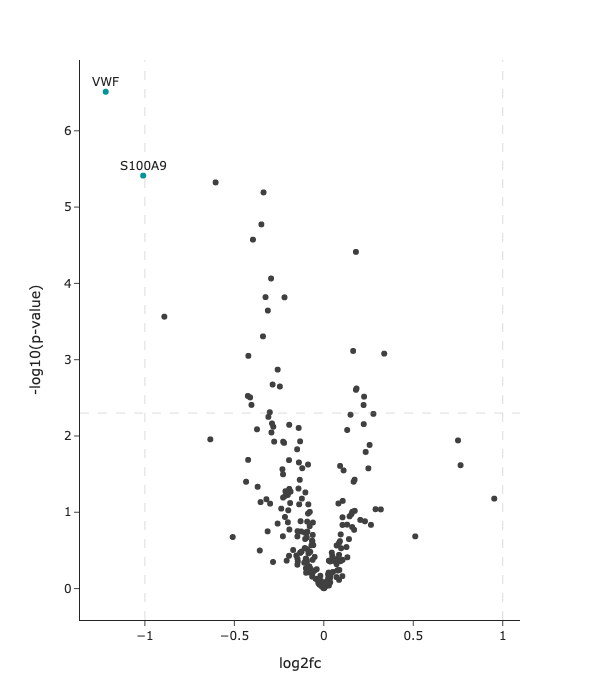

In [196]:
loader = alphastats.DIANNLoader(file = "../output/aps_data_corrected_plasma_development_nameswap.tsv")
dataset = alphastats.DataSet(
    loader = loader, 
    metadata_path="../output/aps_meta_plasma.xlsx", 
    sample_column="sample_id"
)
dataset.preprocess(
    log2_transform=True,
    remove_contaminations=True
)
volcano_plot = dataset.plot_volcano(
    column="group", # column in metadata
    group1="LNB",
    group2="nonLNB",
    labels=True, # add label to significantly enriched proteins
    alpha=0.005 # cutoff for pvalue
)
volcano_plot.show(renderer = "png")

In [197]:
dataset.preprocessing_info

{'Raw data number of Protein Groups': 232,
 'Matrix: Number of ProteinIDs/ProteinGroups': 232,
 'Matrix: Number of samples': 94,
 'Intensity used for analysis': '[sample]_Intensity',
 'Log2-transformed': True,
 'Normalization': None,
 'Imputation': None,
 'Contaminations have been removed': True,
 'Contamination columns': ['contamination_library', 'contamination_library'],
 'Number of removed ProteinGroups due to contaminaton': 0,
 'Data completeness cut-off': 0}

Calculating Students t-test...


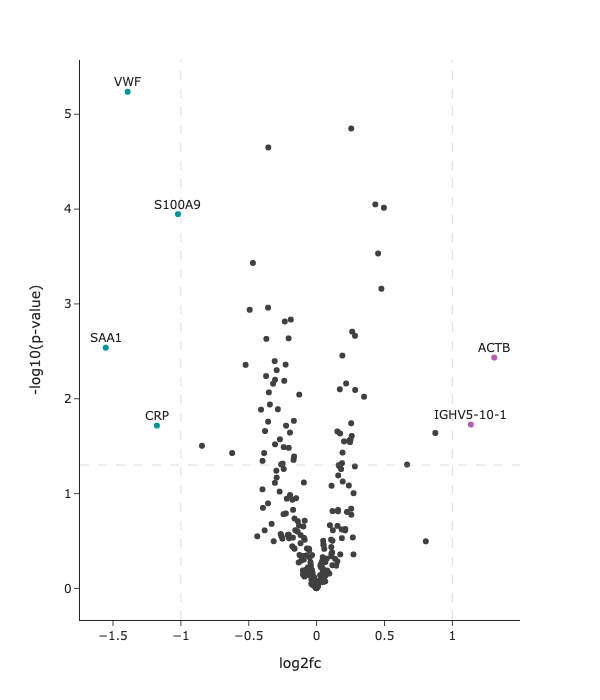

In [198]:
volcano_plot = dataset.plot_volcano(
    column="diagnosis", # column in metadata
    group1="LNB",
    group2="VM",
    labels=True, # add label to significantly enriched proteins
    alpha=0.05 # cutoff for pvalue
)

#pio.write_image(volcano_plot, '../output_blood/volcano_plot_dev_LNB_VM_plasma.svg', format='svg')

volcano_plot.show(renderer = "png")


Calculating Students t-test...


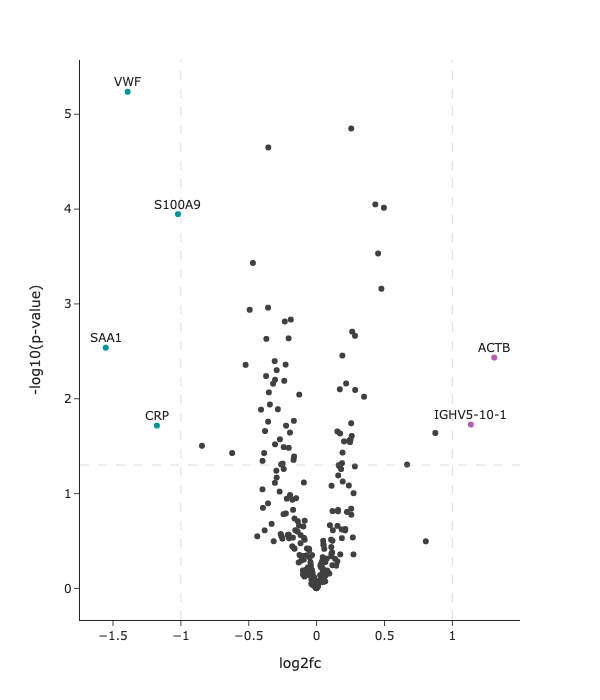

In [199]:
volcano_plot = dataset.plot_volcano(
    column="diagnosis", # column in metadata
    group1="LNB",
    group2="VM",
    labels=True, # add label to significantly enriched proteins
    alpha=0.05 # cutoff for pvalue
)

#pio.write_image(volcano_plot, '../output_blood/volcano_plot_dev_LNB_VM_plasma.svg', format='svg')

volcano_plot.show(renderer = "png")


Calculating Students t-test...


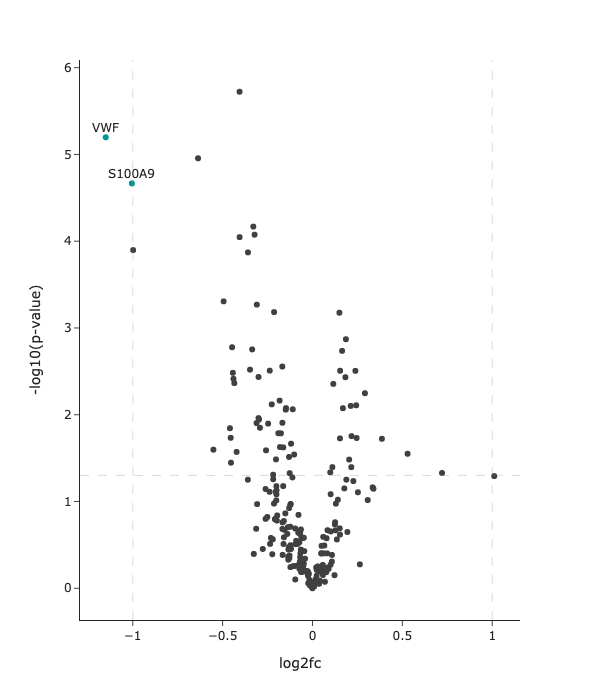

In [200]:
volcano_plot = dataset.plot_volcano(
    column="diagnosis", # column in metadata
    group1="LNB",
    group2="control",
    labels=True, # add label to significantly enriched proteins
    alpha=0.05 # cutoff for pvalue
)

#pio.write_image(volcano_plot, '../output_blood/volcano_plot_dev_LNB_control.svg', format='svg')

volcano_plot.show(renderer = "png")


In [201]:
diff_exp = dataset.diff_expression_analysis('LNB','nonLNB',column='group', fdr=0.05)
print('UP: {}, DOWN: {}'.format(diff_exp[(diff_exp.pval<0.05)]['Protein.Group'].tolist(), diff_exp[(diff_exp.pval<0.05)]['Protein.Group'].tolist()))
dev_corr = diff_exp[(diff_exp.pval<0.05)]['Protein.Group'].tolist()

UP: ['IGKV3-7', 'IGKV2-28;IGKV2D-28', 'IGKV2-24;IGKV2D-24', 'IGKV2D-29', 'IGKV3D-15', 'IGKV2-40;IGKV2D-40', 'IGHV3-15', 'IGHV3-74', 'IGKV3D-20', 'IGHV1-24', 'IGHV3-38', 'IGHV3-64D', 'IGLC7', 'FCN3', 'F13A1', 'PLG', 'C3', 'C5', 'KNG1', 'IGKV1-5', 'IGKV3-20', 'IGHV3-7', 'IGKC', 'IGHG1', 'APOE', 'APOC3', 'FGA', 'C1QB', 'C1QC', 'FN1', 'AHSG', 'TF', 'HPX', 'F11', 'C4BPA', 'VWF', 'IGKV3-11', 'APOD', 'S100A8', 'SERPINA5', 'SERPING1', 'SERPIND1', 'IGKV4-1', 'S100A9', 'LDHB', 'PROS1', 'PFN1', 'THBS1', 'SERPINA6', 'CD14', 'IGLC2;IGLC3', 'LAMP2', 'C6', 'SELL', 'PZP', 'IGFBP6', 'KRT9', 'IGFALS', 'ACTB', 'B2M', 'ITIH4', 'TGFBI', 'ECM1', 'CPB2', 'FETUB'], DOWN: ['IGKV3-7', 'IGKV2-28;IGKV2D-28', 'IGKV2-24;IGKV2D-24', 'IGKV2D-29', 'IGKV3D-15', 'IGKV2-40;IGKV2D-40', 'IGHV3-15', 'IGHV3-74', 'IGKV3D-20', 'IGHV1-24', 'IGHV3-38', 'IGHV3-64D', 'IGLC7', 'FCN3', 'F13A1', 'PLG', 'C3', 'C5', 'KNG1', 'IGKV1-5', 'IGKV3-20', 'IGHV3-7', 'IGKC', 'IGHG1', 'APOE', 'APOC3', 'FGA', 'C1QB', 'C1QC', 'FN1', 'AHSG', 'TF', '

There is a easy way to get your GO terms from Uniprot Id. Follow this steps

Go to the UniProt retrieve/IS mapping page located at https://www.uniprot.org/uploadlists/

Introduce your list of UniProt Ids

Set the UniprotKB AC/ID to Uniprot KB option (the default option)

Hit submit

In the table that appears, select the Columns Tab to choose the fields you want to see. There is a GO Ontology section where you can choose 5 different options to see

Hit Save

Download the data. There are many different formats to choose

In [202]:
info = pd.read_excel('../output/aps_meta_plasma.xlsx')
#info.sample_id = ['plasma'+x for x in info.sample_id.astype(str).tolist()]
aps_data = pd.read_table('../output/aps_data_corrected_plasma_development.tsv', sep ='\t').drop(['Protein.Names','Genes','First.Protein.Description'], axis = 1)
aps_data = aps_data.set_index(['Protein.Group']).T.reset_index()
aps_data.rename(columns={'index':'sample_id'}, inplace=True)
heatmap_data = np.log2(pd.merge(info.drop(['batch','group'], axis = 1), aps_data, on = 'sample_id').sort_values(['diagnosis','study_cohort']).set_index(['sample_id','diagnosis','study_cohort'])).T
heatmap_data.head()

sample_id      plasma3524649866   plasma3524649882   plasma3524649873  \
diagnosis                   LNB                LNB                LNB   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            28.852444          28.878734          28.342253   
A0A075B6I0            25.810835          25.743978          26.315609   
A0A075B6I9            27.431616          27.030289          26.291605   
A0A075B6J9            25.808328          22.563744          24.037311   
A0A075B6K0            25.515381          25.397078          26.125203   

sample_id      plasma3524649112   plasma3524649842   plasma3524649675  \
diagnosis                   LNB                LNB                LNB   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            29.572216          29.397059          28.161349   
A0A075B6I0            27.431346          26.400286          25.922067   
A0A075B6I9            26.949727          26.492607          26.161145   
A0A075B6J9            25.497110          24.777846          25.532178   
A0A075B6K0            25.964663          24.792692          25.025470   

sample_id      plasma3524649874   plasma3524649691   plasma3524649096  \
diagnosis                   LNB                LNB                LNB   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            27.877108          29.860090          28.320462   
A0A075B6I0            27.774100          26.228967          26.540520   
A0A075B6I9            26.602115          27.994119          26.373595   
A0A075B6J9            23.535925          25.758610          25.650341   
A0A075B6K0            25.939453          26.405663          25.655419   

sample_id      plasma3524649660  ...       plasma146648       plasma146689  \
diagnosis                   LNB  ...            control            control   
study_cohort plasma_development  ... plasma_development plasma_development   
A0A075B6H7            28.638589  ...          29.168328          28.664348   
A0A075B6I0            26.753779  ...          26.543979          25.965497   
A0A075B6I9            26.820550  ...          26.894800          26.843834   
A0A075B6J9            24.226470  ...          25.095428          24.351242   
A0A075B6K0            25.050566  ...          25.193865          25.480447   

sample_id          plasma146705       plasma146738       plasma146769  \
diagnosis               control            control            control   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            28.873811          29.564707          28.944740   
A0A075B6I0            26.634521          26.361051          27.240633   
A0A075B6I9            27.085201          26.861836          27.994284   
A0A075B6J9            24.969125          25.114601          24.423722   
A0A075B6K0            25.722394          26.400162          26.409465   

sample_id          plasma146784       plasma146835       plasma146841  \
diagnosis               control            control            control   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            29.623681          28.459899          29.493025   
A0A075B6I0            25.285137          25.987000          27.083770   
A0A075B6I9            27.161911          26.230779          27.479345   
A0A075B6J9            23.693447          24.520071          25.609924   
A0A075B6K0            24.719288          24.599412          26.271668   

sample_id      plasma3524649664       plasma146848  
diagnosis               control            control  
study_cohort plasma_development plasma_development  
A0A075B6H7            29.497769          29.361567  
A0A075B6I0            27.046923          26.487895  
A0A075B6I9            27.529059          26.338068  
A0A075B6J9            24.118008          22.880114  
A0A075B6K0            25.923194          25.756430  

[5 rows x 94 columns]

In [203]:
uniprot_mapping = pd.read_csv('../output_blood/idmapping_2024_10_16.tsv', sep='\t')
# subset to reviewed variants
#uniprot_mapping = uniprot_mapping[uniprot_mapping['Reviewed']=='reviewed'][['Entry','Entry Name', 'Protein names', 'Gene Names','Gene Ontology (biological process)']]
uniprot_mapping = uniprot_mapping[['Entry','Entry Name', 'Protein names', 'Gene Names','Gene Ontology (biological process)']]
uniprot_mapping['GO'] = uniprot_mapping['Gene Ontology (biological process)'].str.split('; ')
uniprot_mapping = uniprot_mapping.drop('Gene Ontology (biological process)', axis=1).explode('GO').drop_duplicates()
uniprot_mapping.GO.value_counts()

# add additional columns to the uniprot mapping for protein.Groups with muyltiple identifiers
additional_columns = []
for i in aps_data.columns.tolist()[1:]:
    if ';' in i:
        multiple_ids = i.split(';')
        print(multiple_ids)
        combined_df = uniprot_mapping[uniprot_mapping['Entry'].isin(multiple_ids)].astype(str)
        collapsed_df = combined_df.apply(lambda col: '; '.join(col)).to_frame().T
        collapsed_df.Entry = i
        additional_columns.append(collapsed_df)
additional_columns = pd.concat(additional_columns)
additional_columns['GO'] = additional_columns['GO'].str.split('; ')
additional_columns = additional_columns.explode('GO').drop_duplicates()
print(uniprot_mapping.shape)
uniprot_mapping = pd.concat([uniprot_mapping, additional_columns]).reset_index(drop=True)
print(uniprot_mapping.shape)



['A0A075B6P5', 'P01615']
['A0A075B6R9', 'A0A0C4DH68']
['A0A087WW87', 'P01614']
['P01825', 'A0A0C4DH41']
['P0DOY2', 'P0DOY3']
(2165, 5)
(2176, 5)


In [204]:
# Get go categories
GO_order = uniprot_mapping.groupby('GO').size().sort_values(ascending = False).reset_index()['GO'].tolist()
# assign category to uniprot_mapping
uniprot_mapping['GO'] = pd.Categorical(uniprot_mapping['GO'], categories=GO_order, ordered=True)
# subset to most frequent categories
print(uniprot_mapping['GO'].unique().shape)
annotation_test = uniprot_mapping.sort_values(['Gene Names','GO','Entry']).drop_duplicates(subset = 'Gene Names', keep = 'first')
annotation_test.to_csv('../output/annotation_table_plasma.tsv', sep = '\t', index = None)
print(annotation_test.GO.unique().shape)
# only keep frequent mappings
annotation_test.GO = annotation_test.GO.astype(str)
GO_order = uniprot_mapping.groupby('GO').size().sort_values(ascending = False).reset_index()
GO_max = GO_order[GO_order[0]>=4]['GO'].tolist()
annotation_test.loc[~annotation_test.GO.isin(GO_max), 'GO'] = 'other'
annotation_test.fillna('none', inplace=True)
print(annotation_test.GO.unique().shape)
# assign category to uniprot_mapping with new categories
GO_order = annotation_test['GO'].unique().tolist()
annotation_test['GO'] = pd.Categorical(annotation_test['GO'], categories=GO_order, ordered=True)


(1155,)
(58,)
(40,)


In [205]:
annotation_test

Entry        Entry Name  \
948       P04217        A1BG_HUMAN   
250       P01023        A2MG_HUMAN   
1840      P60709        ACTB_HUMAN   
1499      P12814       ACTN1_HUMAN   
2064      Q15848       ADIPO_HUMAN   
...          ...               ...   
1553      P18206        VINC_HUMAN   
886       P04004        VTNC_HUMAN   
949       P04275         VWF_HUMAN   
1909      P63104       1433Z_HUMAN   
55    A0A0J9YY99  A0A0J9YY99_HUMAN   

                                          Protein names  \
948      Alpha-1B-glycoprotein (Alpha-1-B glycoprotein)   
250   Alpha-2-macroglobulin (Alpha-2-M) (C3 and PZP-...   
1840  Actin, cytoplasmic 1 (EC 3.6.4.-) (Beta-actin)...   
1499  Alpha-actinin-1 (Alpha-actinin cytoskeletal is...   
2064  Adiponectin (30 kDa adipocyte complement-relat...   
...                                                 ...   
1553                       Vinculin (Metavinculin) (MV)   
886   Vitronectin (VN) (S-protein) (Serum-spreading ...   
949   von Willebrand factor (vWF) [Cleaved into: von...   
1909  14-3-3 protein zeta/delta (Protein kinase C in...   
55                    Ig-like domain-containing protein   

                         Gene Names  \
948                            A1BG   
250               A2M CPAMD5 FWP007   
1840                           ACTB   
1499                          ACTN1   
2064  ADIPOQ ACDC ACRP30 APM1 GBP28   
...                             ...   
1553                            VCL   
886                             VTN   
949                       VWF F8VWF   
1909                          YWHAZ   
55                             none   

                                                     GO  
948                                               other  
250                   acute-phase response [GO:0006953]  
1840                  platelet aggregation [GO:0070527]  
1499       regulation of apoptotic process [GO:0042981]  
2064  positive regulation of cholesterol efflux [GO:...  
...                                                 ...  
1553                         cell adhesion [GO:0007155]  
886                        immune response [GO:0006955]  
949                      blood coagulation [GO:0007596]  
1909                          angiogenesis [GO:0001525]  
55    immunoglobulin mediated immune response [GO:00...  

[239 rows x 5 columns]

['LNB', 'VM']
(68, 9)
UP: ['IGHV5-10-1', nan, 'FCN3 FCNH HAKA1', 'ATRN KIAA0548 MGCA', 'APOM G3A NG20 HSPC336', 'F13A1 F13A', 'APOE', 'APOC1', 'APOC3', 'RBP4 PRO2222', 'HPX', 'PROC', 'APOD', 'SERPINA5 PCI PLANH3 PROCI', 'SERPING1 C1IN C1NH', 'SERPIND1 HCF2', 'APOA4', 'LDHB', 'PROS1 PROS', 'PFN1', 'IGFBP6 IBP6', 'SERPINA4 KST PI4', 'LUM LDC SLRR2D', 'ACTB', 'GPLD1 PIGPLD1', 'CPB2']
DOWN: ['IGKV3-7', 'IGKV2D-24; IGKV2D-24; IGKV2-24; IGKV2-24', 'IGKV1-27', 'IGHV3-74', 'IGKV6-21', 'IGHV1-18', 'IGHV3-38', 'IGKV1-5', 'IGKV3-20', 'IGHV3-7', 'IGKC', 'IGHG1', 'FGA', 'FGB', 'FGG PRO2061', 'CRP PTX1', 'C1QB', 'C1QC C1QG', 'C9', 'LRG1 LRG', 'FN1 FN', 'AHSG FETUA PRO2743', 'F11', 'VTN', 'VWF F8VWF', 'IGKV3-11', 'S100A8 CAGA CFAG MRP8', 'IGKV4-1', 'C2', 'S100A9 CAGB CFAG MRP14', 'SERPINA6 CBG', 'CD14', 'SAA1', 'F5', 'LAMP2', 'C6', 'SELL LNHR LYAM1', 'PZP CPAMD6', 'IGFALS ALS', 'ECM1', 'IL1RAP C3orf13 IL1R3', 'C1RL C1RL1 C1RLP CLSPA']
68
['LNB', 'control']
(69, 9)
UP: ['FCN3 FCNH HAKA1', 'F13A1 F13A'

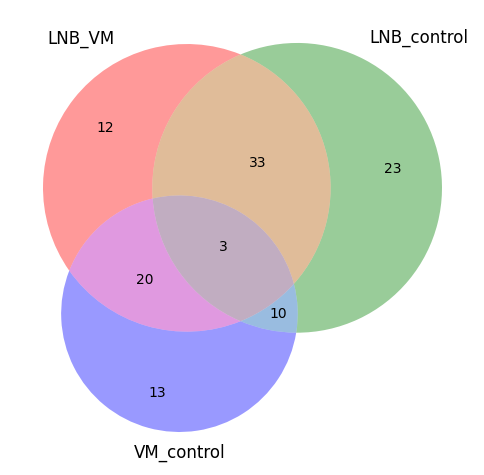

In [229]:
diffs = []
dfs = []
for groups in [['LNB','VM'],['LNB','control'],['control','VM']]:
    diff_df= dataset.diff_expression_analysis(groups[0],groups[1],column='diagnosis', fdr=0.05)
    diff_df = pd.merge(test[['Genes','Protein.Group']].drop_duplicates(),diff_df, on = 'Protein.Group', how = 'right')
    diff_df.rename(columns={'Protein.Group':'Genes', 'Genes':'Protein.Group'}, inplace=True)
    print(groups)
    diff_df = diff_df[(diff_df.pval<0.05)]
    diff_df = pd.merge(diff_df, annotation_test[['Entry','GO','Gene Names']], left_on = 'Protein.Group', right_on = 'Entry', how = 'left')
    diff_df['group1']=groups[0]
    diff_df['group2']=groups[1]
    print(diff_df.shape)
    dfs.append(diff_df)
    print('UP: {}'.format(diff_df[diff_df.log2fc>0]['Gene Names'].tolist()))
    print('DOWN: {}'.format(diff_df[diff_df.log2fc<0]['Gene Names'].tolist()))
    diff_df = diff_df[(diff_df.pval<0.05)]['Protein.Group'].tolist()
    print(len(diff_df))
    diffs.append(diff_df)

plt.figure(figsize=(6, 6))

# Make the diagram
venn3(subsets = [set(diffs[0]), set(diffs[1]), set(diffs[2])], set_labels=('LNB_VM','LNB_control','VM_control'))

#plt.savefig("venn_diagram_healthy_pls1_pls2.png", format="png")
plt.show()


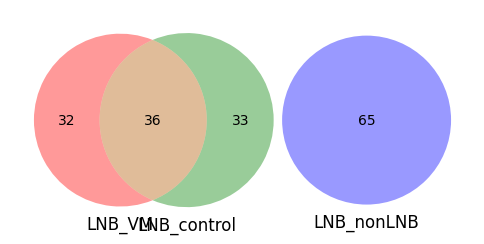

In [207]:
plt.figure(figsize=(6, 6))

# Make the diagram
venn3(subsets = [set(diffs[0]), set(diffs[1]), set(dev_corr)], set_labels=('LNB_VM','LNB_control','LNB_nonLNB'))

#plt.savefig("venn_diagram_healthy_pls1_pls2.png", format="png")
plt.show()

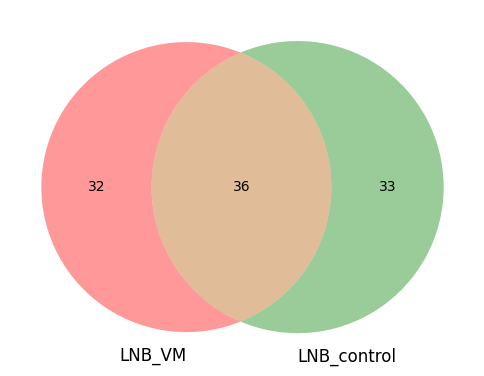

In [208]:
plt.figure(figsize=(6, 6))

# Make the diagram
venn2([set(diffs[0]), set(diffs[1])], set_labels=('LNB_VM','LNB_control'))

#plt.savefig("../output_blood/venn_diagram_blood_dev.svg", format="svg")
plt.show()

In [209]:
[x for x in combined_lst_val if x in diffs[0]]

['P04004', 'P06727', 'P60709', 'P04275', 'P0DJI8', 'P51884', 'P07225']

In [210]:
[x for x in combined_lst_val if x in diffs[1]]

['P04196', 'P06396', 'P04430', 'P60709', 'P04275', 'P07225']

In [230]:
pd.concat([dfs[0], dfs[1]])[['group1', 'group2','Protein.Group', 'Genes', 'pval', 'log2fc', 'GO']].to_excel('../output_blood/significant_blood_dev.xlsx', index = None)

--> Use the combination of two comparisons to make heatmap.

In [113]:
combined_lst = list(set(diffs[0]+diffs[1]))


In [114]:
print(len(combined_lst))

101


In [115]:
combined_lst

['P04004',
 'P01834',
 'P04196',
 'A0A075B6P5;P01615',
 'Q96IY4',
 'A0AAG2TVE0',
 'Q9NPH3',
 'P05452',
 'P02750',
 'P04275',
 'P13671',
 'P00740',
 'P04070',
 'P00734',
 'P13473',
 'P08571',
 'P01780',
 'P14151',
 'P02787',
 'P02765',
 'P29622',
 'A0M8Q6',
 'P02766',
 'P06702',
 'P02656',
 'P05155',
 'P80108',
 'A0A0J9YXX1',
 'P01602',
 'P05546',
 'Q9UGM5',
 'P02654',
 'Q14624',
 'P02679',
 'P02748',
 'P07225',
 'P05154',
 'P01042',
 'P35858',
 'P02790',
 'A0A0C4DH36',
 'P06681',
 'O75882',
 'A0A075B6H7',
 'P0DOY2;P0DOY3',
 'A0A075B6S5',
 'P06396',
 'P07195',
 'P03952',
 'A0A0C4DH31',
 'P02743',
 'P02741',
 'P0DJI8',
 'Q15582',
 'P07996',
 'P04433',
 'A0A0B4J1V0',
 'P0C0L4',
 'P51884',
 'A0A0C4DH33',
 'A0A087WW87;P01614',
 'P04003',
 'A0A0J9YX35',
 'P01857',
 'P05090',
 'O75636',
 'P20742',
 'P04180',
 'A0A0B4J1X5',
 'P01024',
 'P05109',
 'P01861',
 'P01619',
 'P02675',
 'P02649',
 'P03951',
 'P02753',
 'A0A075B6R9;A0A0C4DH68',
 'P24592',
 'P04430',
 'P06727',
 'Q16610',
 'P00488',
 'O

# get go categories

In [42]:
diff_exp.head()

Protein.Group      pval    log2fc
0       IGKV3-7  0.000495 -0.340105
1      IGLV8-61  0.706766  0.070623
2      IGLV7-46  0.579933 -0.065378
3      IGLV2-18  0.312207 -0.171418
4      IGLV3-16  0.115273 -0.217020

In [777]:
plasma_proteins = diff_exp[['Protein.Group']].drop_duplicates()
print(plasma_proteins.shape)
plasma_proteins['Protein.Group'] = plasma_proteins['Protein.Group'].str.split(';')
plasma_proteins = plasma_proteins.explode('Protein.Group').drop_duplicates()
print(plasma_proteins.shape)
plasma_proteins.to_csv('../output_blood/plasma_proteins.tsv', sep='\t', index=False)
print(diff_exp[diff_exp.pval<0.05].shape)

(230, 1)
(235, 1)
(64, 3)


# Heatmap

In [43]:
info = pd.read_excel('../output/aps_meta_plasma.xlsx')
#info.sample_id = ['plasma'+x for x in info.sample_id.astype(str).tolist()]
aps_data = pd.read_table('../output/aps_data_corrected_plasma_development.tsv', sep ='\t').drop(['Protein.Names','Genes','First.Protein.Description'], axis = 1)
aps_data = aps_data.set_index(['Protein.Group']).T.reset_index()
aps_data.rename(columns={'index':'sample_id'}, inplace=True)
heatmap_data = np.log2(pd.merge(info.drop(['batch','group'], axis = 1), aps_data, on = 'sample_id').sort_values(['diagnosis','study_cohort']).set_index(['sample_id','diagnosis','study_cohort'])).T
heatmap_data.head()


sample_id      plasma3524649866   plasma3524649882   plasma3524649873  \
diagnosis                   LNB                LNB                LNB   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            28.852444          28.878734          28.342253   
A0A075B6I0            25.810835          25.743978          26.315609   
A0A075B6I9            27.431616          27.030289          26.291605   
A0A075B6J9            25.808328          22.563744          24.037311   
A0A075B6K0            25.515381          25.397078          26.125203   

sample_id      plasma3524649112   plasma3524649842   plasma3524649675  \
diagnosis                   LNB                LNB                LNB   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            29.572216          29.397059          28.161349   
A0A075B6I0            27.431346          26.400286          25.922067   
A0A075B6I9            26.949727          26.492607          26.161145   
A0A075B6J9            25.497110          24.777846          25.532178   
A0A075B6K0            25.964663          24.792692          25.025470   

sample_id      plasma3524649874   plasma3524649691   plasma3524649096  \
diagnosis                   LNB                LNB                LNB   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            27.877108          29.860090          28.320462   
A0A075B6I0            27.774100          26.228967          26.540520   
A0A075B6I9            26.602115          27.994119          26.373595   
A0A075B6J9            23.535925          25.758610          25.650341   
A0A075B6K0            25.939453          26.405663          25.655419   

sample_id      plasma3524649660  ...       plasma146648       plasma146689  \
diagnosis                   LNB  ...            control            control   
study_cohort plasma_development  ... plasma_development plasma_development   
A0A075B6H7            28.638589  ...          29.168328          28.664348   
A0A075B6I0            26.753779  ...          26.543979          25.965497   
A0A075B6I9            26.820550  ...          26.894800          26.843834   
A0A075B6J9            24.226470  ...          25.095428          24.351242   
A0A075B6K0            25.050566  ...          25.193865          25.480447   

sample_id          plasma146705       plasma146738       plasma146769  \
diagnosis               control            control            control   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            28.873811          29.564707          28.944740   
A0A075B6I0            26.634521          26.361051          27.240633   
A0A075B6I9            27.085201          26.861836          27.994284   
A0A075B6J9            24.969125          25.114601          24.423722   
A0A075B6K0            25.722394          26.400162          26.409465   

sample_id          plasma146784       plasma146835       plasma146841  \
diagnosis               control            control            control   
study_cohort plasma_development plasma_development plasma_development   
A0A075B6H7            29.623681          28.459899          29.493025   
A0A075B6I0            25.285137          25.987000          27.083770   
A0A075B6I9            27.161911          26.230779          27.479345   
A0A075B6J9            23.693447          24.520071          25.609924   
A0A075B6K0            24.719288          24.599412          26.271668   

sample_id      plasma3524649664       plasma146848  
diagnosis               control            control  
study_cohort plasma_development plasma_development  
A0A075B6H7            29.497769          29.361567  
A0A075B6I0            27.046923          26.487895  
A0A075B6I9            27.529059          26.338068  
A0A075B6J9            24.118008          22.880114  
A0A075B6K0            25.923194          25.756430  

[5 rows x 94 columns]

(232, 94)
(94, 101)


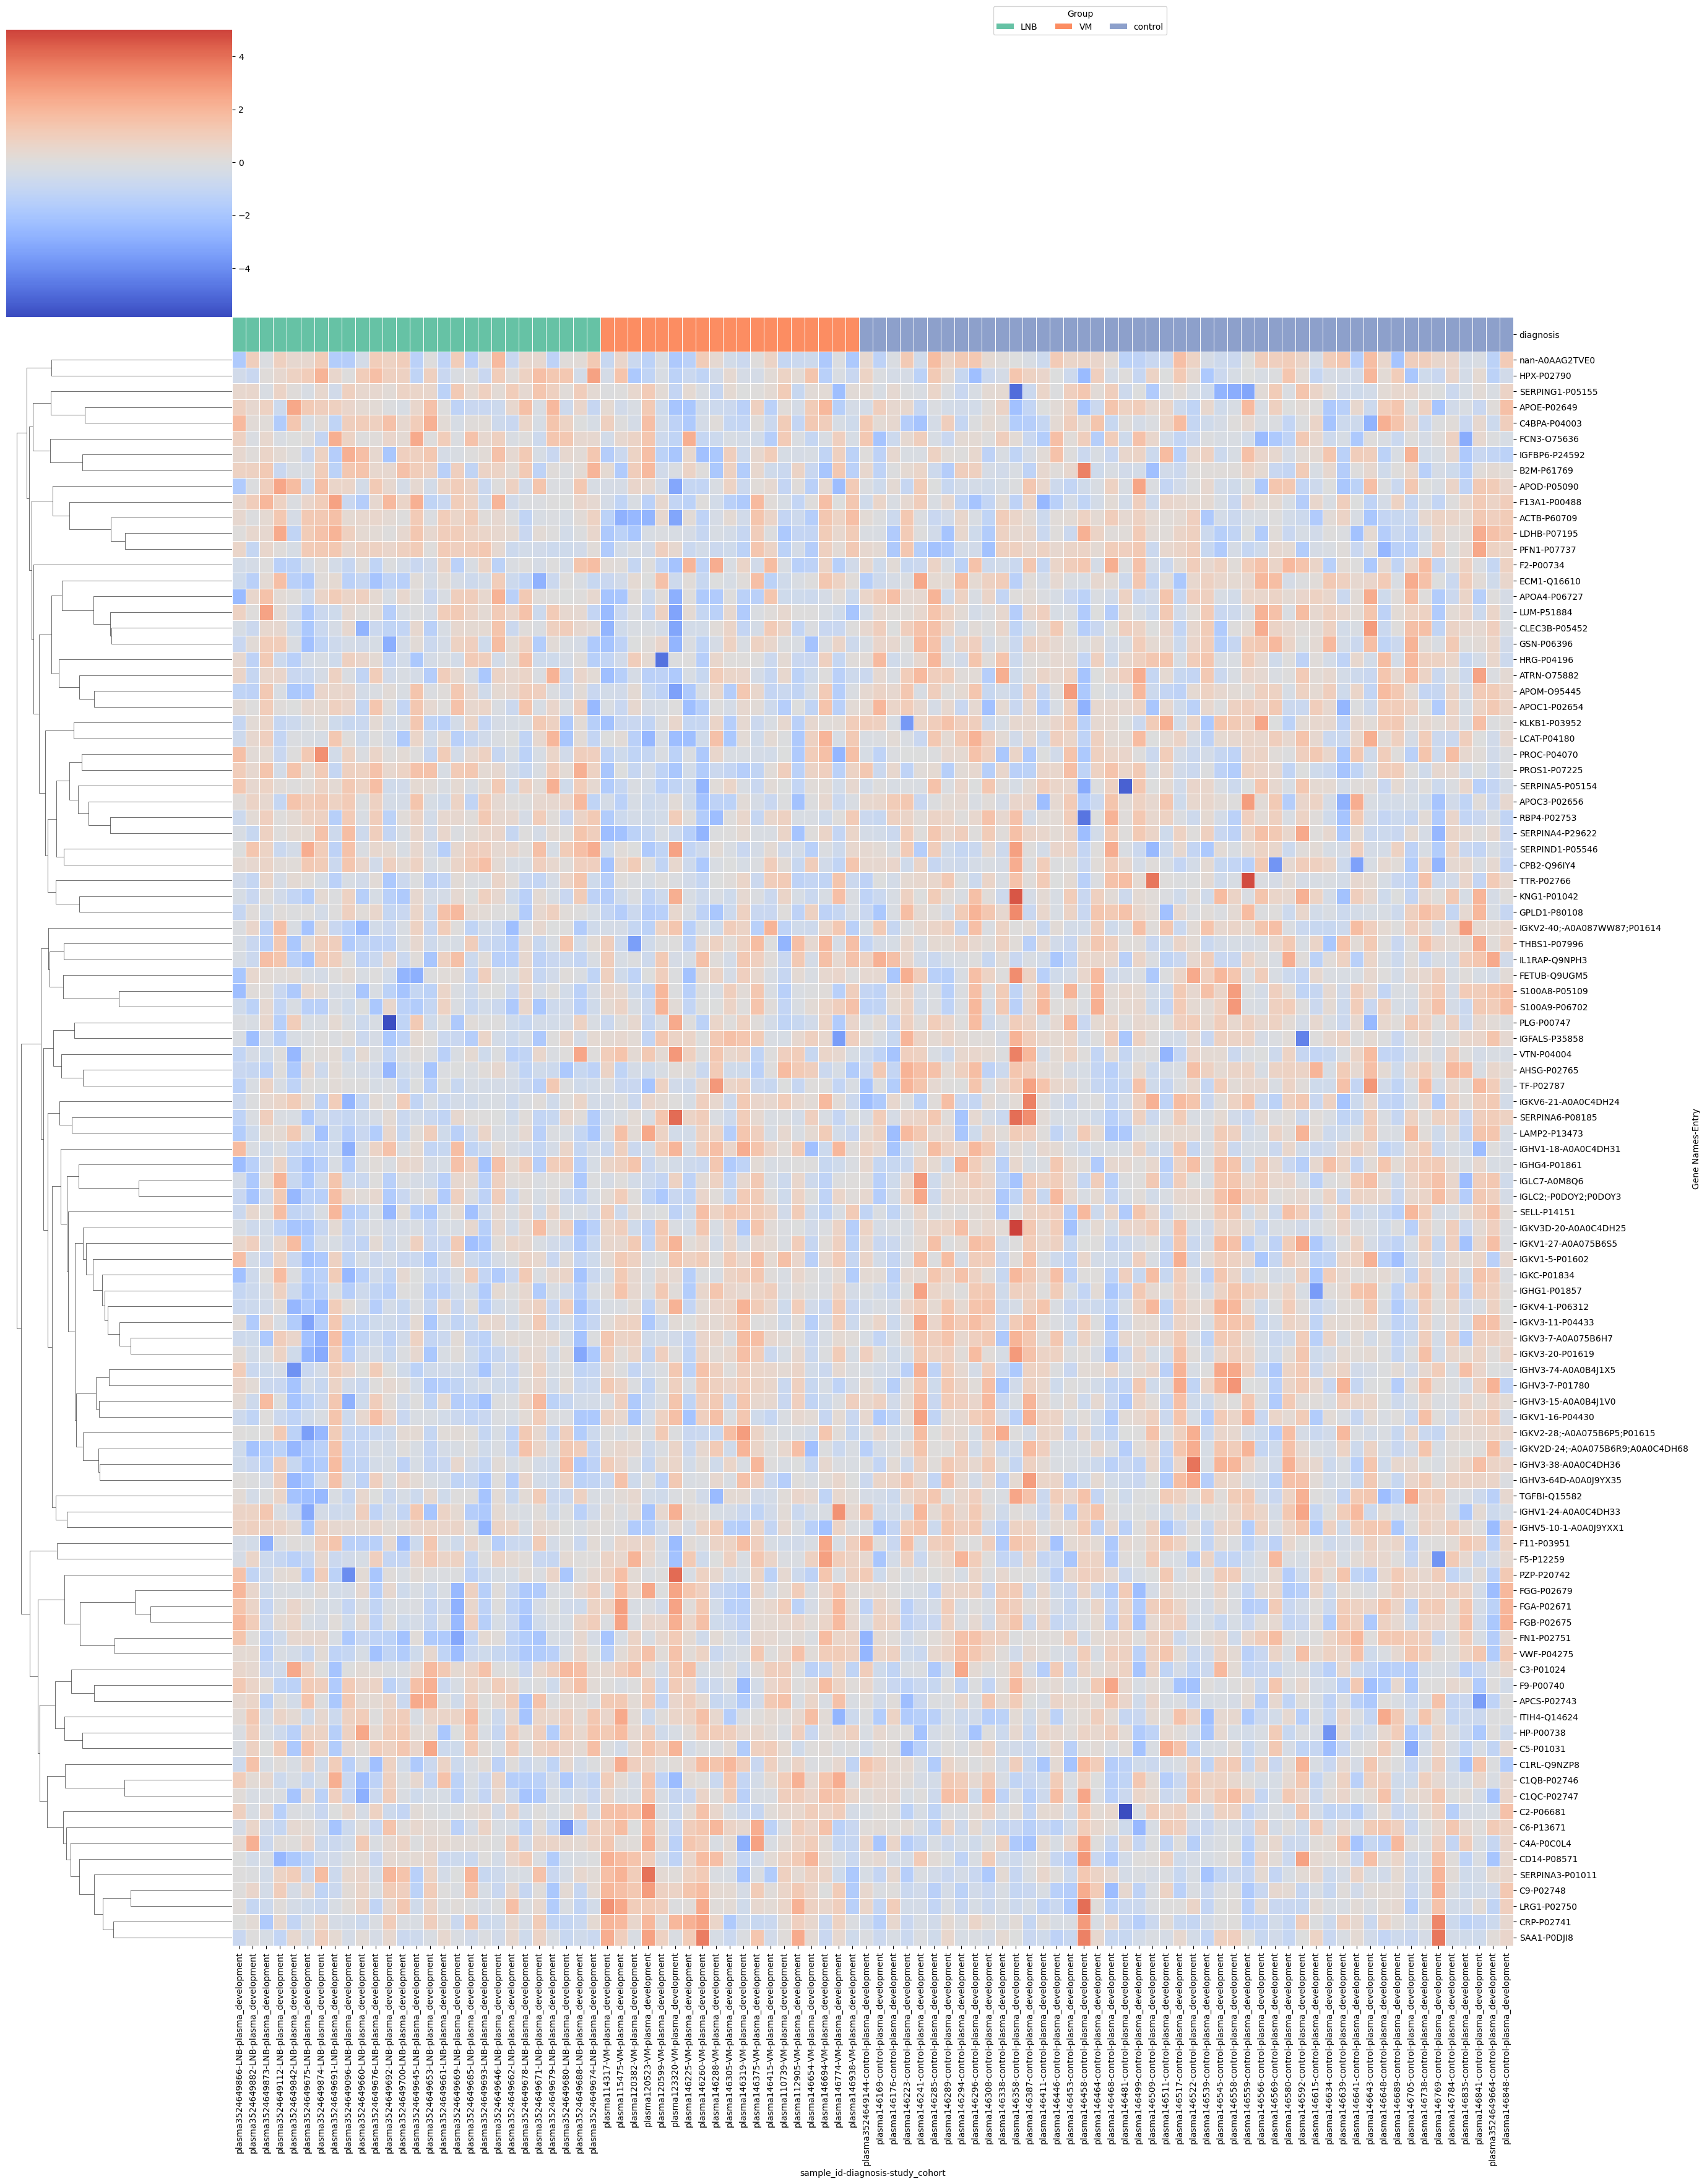

In [44]:
heatmap_data = np.log2(pd.merge(info.drop(['batch','group'], axis = 1), aps_data, on = 'sample_id')
                       .sort_values(['diagnosis','study_cohort'])
                       .set_index(['sample_id','diagnosis','study_cohort'])
                       .T)
print(heatmap_data.shape)
heatmap_data = heatmap_data.loc[heatmap_data.index.get_level_values(0).isin(combined_lst)].T
print(heatmap_data.shape)
heatmap_data = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()
heatmap_data = heatmap_data.T

# merge annotation with heatmap_data:
annotation_test = pd.merge(pd.DataFrame(heatmap_data.index.tolist(), columns = ['Entry']), annotation_test[['Entry','GO','Gene Names']], on = 'Entry', how = 'left')
annotation_test['Gene Names']=annotation_test['Gene Names'].str.split(' ').str[0]


# 2. Add 'annotation' and 'Gene Names' from annotation_test to the index
annotations = annotation_test['GO'].tolist()  # Replace 'GO' with the correct column name if needed
gene_names = annotation_test['Gene Names'].tolist()  # Ensure 'Gene Names' is the correct column

# Creating a MultiIndex
heatmap_data.index = pd.MultiIndex.from_tuples(
    list(zip(gene_names, heatmap_data.index)),
    names=['Gene Names', 'Entry']
)
# # annotation colors
# annotation_labels = heatmap_data.index.get_level_values("annotation")
# corr_pal = sns.hls_palette(annotation_labels.unique().size)
# corr_lut = dict(zip(map(str, annotation_labels.unique()), corr_pal))
# # create correlation index
# annotation_colors = pd.Series(annotation_labels, index=heatmap_data.index).map(corr_lut)

# grouping colors
group_labels = heatmap_data.columns.get_level_values("diagnosis")
group_pal = sns.color_palette('Set2',group_labels.unique().size)
group_lut = dict(zip(map(str, group_labels.unique()), group_pal))
# create group index
group_colors = pd.Series(group_labels, index=heatmap_data.columns).map(group_lut)

g1 = sns.clustermap(heatmap_data, z_score=False, col_cluster=False,
                   #figsize=(30,60), col_colors = group_colors, row_colors = annotation_colors, 
                   figsize=(35,35), col_colors = group_colors, #row_colors = annotation_colors, 
                   linewidth=0.5, cmap = "coolwarm", center = 0,dendrogram_ratio=0.15, metric = 'euclidean', colors_ratio=0.018)

# add legends
for label in group_labels.unique():
    g1.ax_col_dendrogram.bar(0, 0, color=group_lut[label], label=label, linewidth=0);
l1 = g1.ax_col_dendrogram.legend(title='Group', loc="center", ncol=7, bbox_to_anchor=(0.5, 1), bbox_transform=gcf().transFigure)
g1.fig.subplots_adjust(right=0.7)
#g.ax_cbar.set_position((0.8, .2, .03, .4))

#g1.figure.savefig("../output_blood/heatmap_plasma_development_annotation.svg")

In [45]:
row_linkage = g1.dendrogram_row.linkage

In [46]:
heatmap_data.shape

(101, 94)

In [47]:
test =uniprot_mapping.loc[(uniprot_mapping.Entry.isin(heatmap_data.index.get_level_values("Entry").tolist()))]
test.GO = test.GO.astype(str)

sub = test.GO.value_counts().reset_index()

test.loc[~(test.GO.isin(sub[sub['count']>=5]['GO'].tolist())),'GO'] = 'low'

# add missing Entries
test = pd.merge(pd.DataFrame(heatmap_data.index.get_level_values("Entry").tolist(), columns = ['Entry']), test[['Entry','GO','Gene Names']].drop_duplicates(), on = 'Entry', how = 'left')
print(test.shape)
test.fillna('nan', inplace = True)

(281, 3)


In [48]:
heatmap_order = heatmap_data.iloc[g1.dendrogram_row.reordered_ind].index.get_level_values("Entry").tolist()

In [49]:
# sort the test according to heatmap
test['Entry'] = pd.Categorical(test['Entry'], categories=heatmap_order, ordered=True)
test = test.sort_values(['Entry'])
test.Entry = test.Entry.astype(str)
test['Gene Names'] = test['Gene Names'].str.split(' ', expand = True)[0] 

In [51]:


# Data for Sankey plot

# Get unique values of Genes and annotations
all_Genes = list(test['Gene Names'].unique())
#all_Genes.reverse()
all_annotations = list(test['GO'].unique())


# Create indices for sankey source (Gene Namess) and targets (annotations)
test['Gene Names_index'] = test['Gene Names'].apply(lambda x: all_Genes.index(x))
test = test.sort_values(by='Gene Names_index').reset_index(drop=True)  # Ensure test is sorted by the order of 'all_Genes'
test['annotation_index'] = test['GO'].apply(lambda x: len(all_Genes) + all_annotations.index(x))

# Generate a color for each annotation
colors = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(all_annotations))]

# Map annotation index to colors
target_colors = {len(all_Genes) + i: colors[i] for i in range(len(all_annotations))}

# Create a list of colors for the links based on target node
link_colors = [target_colors[target] for target in test['annotation_index']]

# Define node positions for source nodes (x = 0.1 for all sources, y spaced evenly)
source_y_positions = [i / len(all_Genes) for i in range(len(all_Genes))]  # Evenly spaced source y positions
source_x_positions = [0.1] * len(all_Genes)  # Fixed x position for sources

# Only set positions for sources, leave target positions to be automatically placed
node_x_positions = source_x_positions + [None] * len(all_annotations)  # No x positions for targets
node_y_positions = source_y_positions + [None] * len(all_annotations)  # No y positions for targets

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = all_Genes + all_annotations,
        x = node_x_positions,
        y = node_y_positions
    ),
    link = dict(
        source = test['Gene Names_index'],  # starting points (Gene Namess)
        target = test['annotation_index'],  # end points (annotations)
        value = [1] * len(test),  # each link has equal value (1 for each protein-GO link)
        color = link_colors  # set the color of links
    )
))

# Update layout and display the figure
fig.update_layout(title_text="Sankey Diagram of Protein Gene Names and Annotations", 
                  font_size=10,
                  height=800,
                  width=600)

# Define the path where you want to save the PDF
output_path = '../output_blood/annotation_heatmap_csf_development_annotation.svg'

# Save the figure as a PDF
#pio.write_image(fig, output_path, format='svg')

fig.show()

In [52]:
# Print GO terms for missing entries
sub = uniprot_mapping[uniprot_mapping['Entry'].isin(test.loc[test.GO=='nan']['Entry'].tolist())]
#test =uniprot_mapping.loc[(uniprot_mapping.Entry.isin(heatmap_data.index.get_level_values("Entry").tolist()))]
sub.GO = sub.GO.astype(str)
sub = sub.GO.value_counts().reset_index()
#sub[sub.GO.str.contains('immunoglobulin mediated immune response')]
print(', '.join(sub[sub['count']>=5]['GO'].tolist())) #sub[sub['count']>=2].GO.tolist()


# Validation

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
Data has been log2-transformed.
Calculating Students t-test...


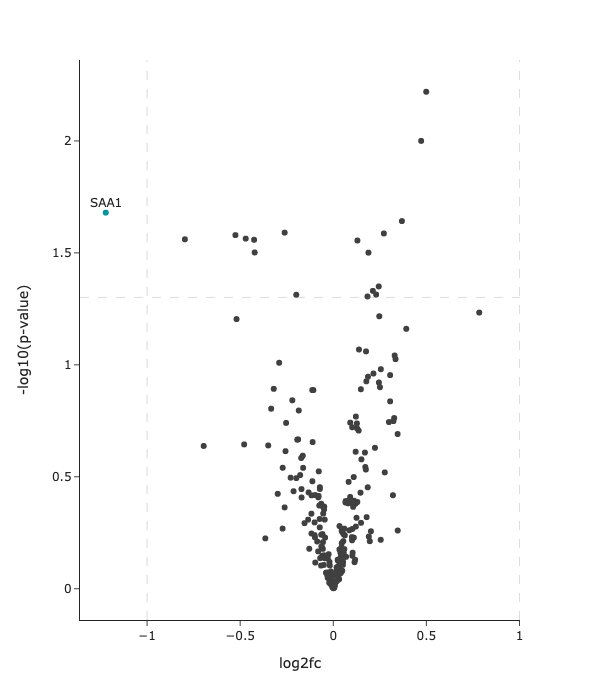

In [73]:
loader = alphastats.DIANNLoader(file = "../output/aps_data_corrected_plasma_validation_nameswap.tsv")
dataset = alphastats.DataSet(
    loader = loader, 
    metadata_path="../output/aps_meta_plasma.xlsx", 
    sample_column="sample_id"
)
dataset.preprocess(
    log2_transform=True,
    remove_contaminations=True
)
volcano_plot = dataset.plot_volcano(
    column="group", # column in metadata
    group1="LNB",
    group2="nonLNB",
    labels=True, # add label to significantly enriched proteins
    alpha=0.05 # cutoff for pvalue
)
volcano_plot.show(renderer = "png")

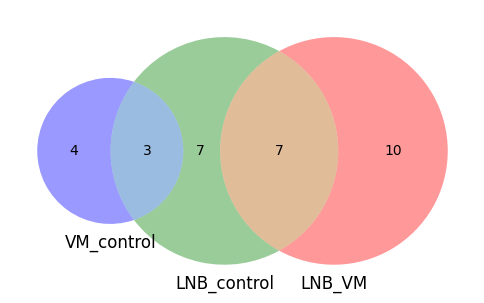

In [62]:
test = pd.read_csv("../output/aps_data_corrected_plasma_validation.tsv",sep = '\t')
cols = test.columns.tolist()
test.rename(columns={'Protein.Group':'Genes','Genes':'Protein.Group'}, inplace=True)

diffs_val = []
for groups in [['LNB','VM'],['LNB','control'],['control','VM']]:
    diff_df= dataset.diff_expression_analysis(groups[0],groups[1],column='diagnosis', fdr=0.05)
    diff_df = pd.merge(test[['Genes','Protein.Group']].drop_duplicates(),diff_df, on = 'Protein.Group')
    diff_df.rename(columns={'Protein.Group':'Genes', 'Genes':'Protein.Group'}, inplace=True)
    diff_df = diff_df[(diff_df.pval<0.05)]['Protein.Group'].tolist()
    diffs_val.append(diff_df)

plt.figure(figsize=(6, 6))

# Make the diagram
venn3(subsets = [set(diffs_val[0]), set(diffs_val[1]), set(diffs_val[2])], set_labels=('LNB_VM','LNB_control','VM_control'))

#plt.savefig("venn_diagram_healthy_pls1_pls2.png", format="png")
plt.show()

combined_lst_val = list(set(diffs_val[0]+diffs_val[1]))


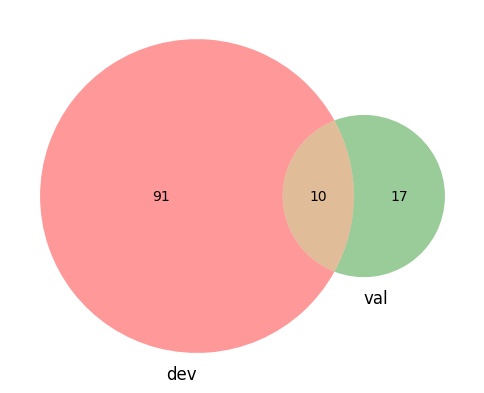

In [63]:
plt.figure(figsize=(6, 6))

# Make the diagram
venn2([set(combined_lst), set(combined_lst_val)], set_labels=('dev','val'))

#plt.savefig("../output_blood/venn_diagram_csf_val_dev.svg", format="svg")
plt.show()


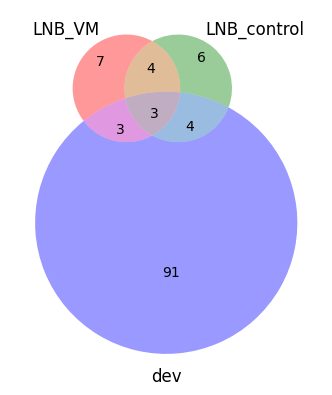

In [64]:
venn3(subsets = [set(diffs_val[0]), set(diffs_val[1]), set(combined_lst)], set_labels=('LNB_VM','LNB_control','dev'))


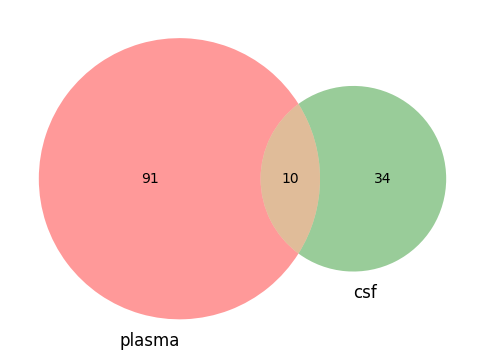

In [65]:
plt.figure(figsize=(6, 6))
csf_identifiers = pd.read_csv("../output/combined_lst.csv").csf_identifiers.tolist()
venn2(subsets = [set(combined_lst), set(csf_identifiers)], set_labels=('plasma','csf'))
plt.savefig("../output_blood/venn_diagram_csf_plasma.svg", format="svg")
plt.show()


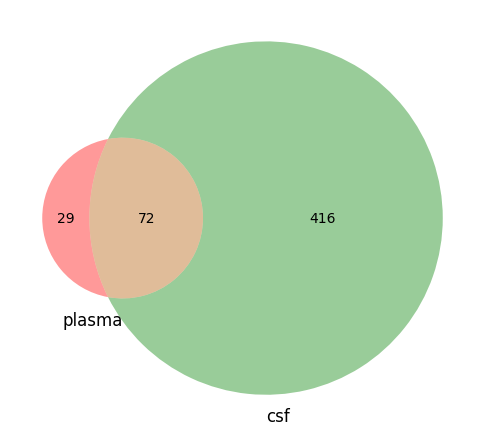

In [66]:
plt.figure(figsize=(6, 6))
csf_identifiers_pval = pd.read_csv("../output/combined_lst_pval.csv").csf_identifiers_pval.tolist()
venn2(subsets = [set(combined_lst), set(csf_identifiers_pval)], set_labels=('plasma','csf'))
#plt.savefig("../output_blood/venn_diagram_csf_plasma_pval.svg", format="svg")
plt.show()


Calculating Students t-test...


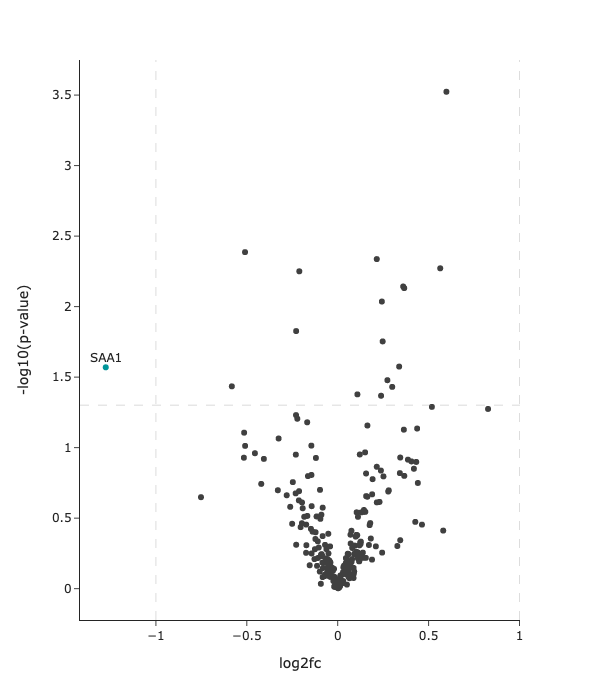

In [75]:
volcano_plot = dataset.plot_volcano(
    column="diagnosis", # column in metadata
    group1="LNB",
    group2="VM",
    labels=True, # add label to significantly enriched proteins
    alpha=0.05 # cutoff for pvalue
)

pio.write_image(volcano_plot, '../output_blood/volcano_plot_val_LNB_VM_plasma.svg', format='svg')

volcano_plot.show(renderer = "png")


Calculating Students t-test...


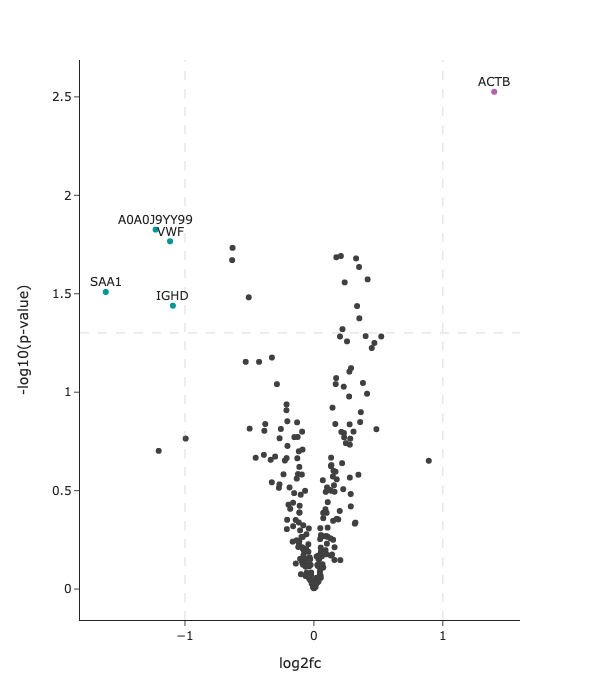

In [76]:
volcano_plot = dataset.plot_volcano(
    column="diagnosis", # column in metadata
    group1="LNB",
    group2="control",
    labels=True, # add label to significantly enriched proteins
    alpha=0.05 # cutoff for pvalue
)

pio.write_image(volcano_plot, '../output_blood/volcano_plot_val_LNB_control_plasma.svg', format='svg')

volcano_plot.show(renderer = "png")


In [77]:
uniprot_csf = pd.read_csv('../data/uniprot_mapping.tsv', sep='\t')
# subset to reviewed variants
#uniprot_csf = uniprot_csf[uniprot_csf['Reviewed']=='reviewed'][['Entry','Entry Name', 'Protein names', 'Gene Names','Gene Ontology (biological process)']]
uniprot_csf = uniprot_csf[['Entry','Entry Name', 'Protein names', 'Gene Names']].drop_duplicates()
uniprot_csf.shape


(672, 4)

In [78]:
csf_identifiers_protein = uniprot_csf.loc[uniprot_csf.Entry.isin(csf_identifiers_pval)]['Gene Names'].unique().tolist()
print(len(csf_identifiers_pval))
print(len(csf_identifiers_protein))

488
475


In [79]:
blood_identifiers_protein = uniprot_mapping.loc[uniprot_mapping.Entry.isin(combined_lst)]['Gene Names'].unique().tolist()
print(len(combined_lst))
print(len(blood_identifiers_protein))

101
101


In [80]:
# lists of proteins specific to plasma compared to all proteins in list
blood_specific = [x for x in blood_identifiers_protein if x not in csf_identifiers_protein]
pd.DataFrame(blood_specific, columns = ['identifiers']).to_csv('../output_blood/blood_specific_proteins.txt', sep = '\t', index = None)
print(len(blood_specific))
# list of overlap
combined_blood_csf = [x for x in blood_identifiers_protein if x in csf_identifiers_protein]
print(len(combined_blood_csf))
pd.DataFrame(blood_specific, columns = ['identifiers']).to_csv('../output_blood/blood_csf_shared_proteins.txt', sep = '\t', index = None)
pd.DataFrame(blood_identifiers_protein+csf_identifiers_protein, columns = ['identifiers']).to_csv('../output_blood/blood_csf_all_proteins.txt', sep = '\t', index = None)
# list specific to CSF
csf_specific = [x for x in csf_identifiers_protein if x not in blood_identifiers_protein]
print(len(csf_specific))
pd.DataFrame(csf_specific, columns = ['identifiers']).to_csv('../output_blood/csf_specific_proteins.txt', sep = '\t', index = None)


30
71
404


In [81]:
# go to: https://www.proteinatlas.org/search/tissue_category_rna%3Abrain%3BDetected+in+single
#> TISSUE > BRAIN > "Detected only in brain" or "tissue enriched" > download tsv Files
#> BLOOD>MS detected

72


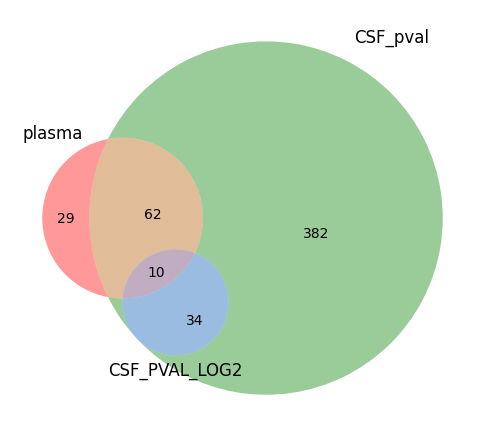

In [82]:
plt.figure(figsize=(6, 6))
venn3(subsets = [set(combined_lst), set(csf_identifiers_pval), set(csf_identifiers)], set_labels=('plasma','CSF_pval','CSF_PVAL_LOG2'))
combined_blood_csf = [x for x in combined_lst if x in csf_identifiers_pval]
print(len(combined_blood_csf))
pd.DataFrame(combined_blood_csf, columns = ['identifiers']).to_csv('../output/combined_blood_csf.csv', index = None)


#plt.savefig("../output_blood/venn_diagram_csf_plasma_pval_log2.svg", format="svg")
plt.show()



In [83]:
# is up/down regulation in lnb the same direction for plasma and csf? --> color by logfc and p-value
combined_data = pd.read_csv('../output/combined_blood_csf_data_all_full_overlap.csv')
combined_data.set_index(['sample_id','diagnosis','study_cohort'], inplace = True)
combined_data.groupby(['diagnosis','study_cohort']).mean()

A0A075B6H7  A0A075B6I0  A0A075B6I9  A0A075B6J9  \
diagnosis study_cohort                                                         
ACA       plasma_validation    29.008172   26.340284   27.097062   24.474342   
EM        plasma_validation    29.245108   26.788058   27.565745   25.164336   
LNB       csf_development      29.187901   25.397899   26.247988   24.042926   
          csf_validation       29.158095   25.536764   26.168499   24.029528   
          plasma_development   28.898223   26.345001   26.935229   24.760746   
          plasma_validation    28.976957   26.400647   26.770440   25.006383   
PTLDS     plasma_validation    29.041217   26.279027   26.437846   24.908381   
VM        csf_development      28.664575   24.583127   25.931295   23.316165   
          csf_validation       28.869322   24.746582   26.039872   23.419497   
          plasma_development   29.249872   26.200863   26.857295   25.025369   
          plasma_validation    29.160969   26.391784   26.884078   24.851588   
control   csf_development      28.459953   24.247259   25.608084   22.983933   
          csf_validation       28.017189   23.685248   25.142865   22.942597   
          plasma_development   29.233759   26.303478   27.057334   24.895270   
          plasma_validation    29.233339   26.240213   27.041653   24.956025   

                              A0A075B6K0  A0A075B6K4  A0A075B6K5  \
diagnosis study_cohort                                             
ACA       plasma_validation    25.655665   25.540641   28.293882   
EM        plasma_validation    25.836246   25.441712   28.246686   
LNB       csf_development      25.599467   26.261394   26.261285   
          csf_validation       25.875707   26.342183   26.517115   
          plasma_development   25.468046   25.009508   28.106455   
          plasma_validation    25.770063   25.415790   28.414486   
PTLDS     plasma_validation    25.811476   25.332601   28.213530   
VM        csf_development      24.424760   24.406802   25.638763   
          csf_validation       24.442881   24.583441   25.921477   
          plasma_development   25.711890   24.967302   28.143609   
          plasma_validation    25.587896   25.350656   28.028110   
control   csf_development      24.296072   24.157953   25.544885   
          csf_validation       23.890130   23.555738   24.921004   
          plasma_development   25.674448   25.116697   28.265132   
          plasma_validation    25.749780   25.129655   28.265402   

                              A0A075B6P5;P01615  A0A075B6R9;A0A0C4DH68  \
diagnosis study_cohort                                                   
ACA       plasma_validation           28.884734              26.760470   
EM        plasma_validation           28.698763              26.628989   
LNB       csf_development             27.700691              25.813936   
          csf_validation              27.714962              25.947386   
          plasma_development          28.369816              26.621574   
          plasma_validation           28.508712              26.745195   
PTLDS     plasma_validation           28.244035              26.496619   
VM        csf_development             26.869350              25.616836   
          csf_validation              27.079670              25.830021   
          plasma_development          28.663924              27.019950   
          plasma_validation           28.597558              26.917568   
control   csf_development             26.536912              25.601456   
          csf_validation              26.119545              25.237185   
          plasma_development          28.662049              27.056512   
          plasma_validation           28.525769              26.781421   

                              A0A075B6S2  ...     Q15848     Q16610  \
diagnosis study_cohort                    ...                         
ACA       plasma_validation    30.566080  ...  24.303027  24.759506   
EM        plasma_validation    30.570017

In [231]:
# is up/down regulation in lnb the same direction for plasma and csf?

dfs = []
for groups in [['csf','development'],['plasma','development']]:
    tissue = groups[0]
    run = groups[1]
    if tissue == 'csf':
        loader = alphastats.DIANNLoader(file = "../output/aps_data_csf_corrected_csf_{}.tsv".format(run))
    else:
        loader = alphastats.DIANNLoader(file = "../output/aps_data_corrected_{}_{}.tsv".format(tissue, run))
    dataset = alphastats.DataSet(
        loader = loader, 
        metadata_path="../output/aps_meta_{}.xlsx".format(tissue), 
        sample_column="sample_id"
    )
    dataset.preprocess(
        log2_transform=True,
        remove_contaminations=True
    )
    diff_exp_VM = dataset.diff_expression_analysis('LNB','VM',column='diagnosis', fdr=0.05)
    diff_exp_VM = diff_exp_VM.set_index(['Protein.Group']).T[combined_blood_csf]
    diff_exp_VM['comparison'] = 'VM'
    diff_exp_VM['tissue'] = tissue
    diff_exp_control = dataset.diff_expression_analysis('LNB','control',column='diagnosis', fdr=0.05)
    diff_exp_control= diff_exp_control.set_index(['Protein.Group']).T[combined_blood_csf]
    diff_exp_control['comparison'] = 'control'
    diff_exp_control['tissue'] = tissue
    dfs.append(diff_exp_VM)
    dfs.append(diff_exp_control)



DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
Data has been log2-transformed.


DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:		Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).
Data has been log2-transformed.


In [232]:
dfs_df = pd.concat(dfs).reset_index().set_index(['index','comparison','tissue'])
dfs_df.columns = gene_mapping_df.loc[combined_blood_csf]['Gene Names'].tolist()
dfs_df

VTN      IGKC       HRG  IGKV2-28      CPB2  \
index  comparison tissue                                                     
pval   VM         csf     0.867709  0.026126  0.407316  0.001430  0.237887   
log2fc VM         csf     0.034858  0.329776  0.100601  0.831341  0.122798   
pval   control    csf     0.003696  0.000012  0.000005  0.000003  0.003925   
log2fc control    csf     0.540549  0.670372  0.536520  1.163780  0.332096   
pval   VM         plasma  0.002307  0.048351  0.484986  0.067760  0.007943   
log2fc VM         plasma -0.206189 -0.250365  0.074633 -0.294108  0.170873   
pval   control    plasma  0.456585  0.003671  0.023804  0.014127  0.003694   
log2fc control    plasma -0.041544 -0.300257 -0.162570 -0.292233  0.183171   

                            CLEC3B        C6      PROC        F2      CD14  \
index  comparison tissue                                                     
pval   VM         csf     0.688305  0.407855  0.003934  0.952764  0.352865   
log2fc VM         csf    -0.051742 -0.134181 -0.403247 -0.008604  0.126701   
pval   control    csf     0.006310  0.005286  0.103294  0.005860  0.000031   
log2fc control    csf    -0.357743  0.397866 -0.193270  0.417576  0.550690   
pval   VM         plasma  0.305740  0.004366  0.028159  0.760904  0.001096   
log2fc VM         plasma  0.106543 -0.228413  0.201940 -0.018831 -0.357635   
pval   control    plasma  0.016335  0.142672  0.321414  0.028761  0.118958   
log2fc control    plasma -0.190062 -0.077833  0.066008 -0.101923 -0.129864   

                          ...          C1QB       PLG          C1QC        C5  \
index  comparison tissue  ...                                                   
pval   VM         csf     ...  9.126125e-03  0.714617  8.401616e-02  0.056828   
log2fc VM         csf     ...  5.631952e-01 -0.049593  2.835454e-01  0.283687   
pval   control    csf     ...  4.731577e-08  0.000003  2.325991e-08  0.000003   
log2fc control    csf     ...  1.034706e+00  0.558592  8.712944e-01  0.775018   
pval   VM         plasma  ...  4.063227e-02  0.379271  1.532267e-03  0.382727   
log2fc VM         plasma  ... -1.659521e-01 -0.071255 -2.346952e-01  0.056559   
pval   control    plasma  ...  2.156813e-02  0.002783  6.563942e-04  0.001348   
log2fc control    plasma  ... -1.193365e-01 -0.167828 -2.137424e-01  0.185926   

                              C1RL       FGA      PFN1      IGKV6-21  \
index  comparison tissue                                               
pval   VM         csf     0.691554  0.868604  0.195612  1.521890e-04   
log2fc VM         csf    -0.043848 -0.047252 -0.415130  8.989067e-01   
pval   control    csf     0.000009  0.005497  0.000001  4.495989e-07   
log2fc control    csf     0.453224  0.798688  1.379448  1.136381e+00   
pval   VM         plasma  0.001463  0.022738  0.022967  3.735748e-02   
log2fc VM         plasma -0.190237 -0.196356  0.874494 -3.867744e-01   
pval   control    plasma  0.373399  0.030670  0.046916  4.125994e-01   
log2fc control    plasma -0.045551 -0.130492  0.720791 -1.660503e-01   

                               FN1   IGKV4-1  
index  comparison tissue                      
pval   VM         csf     0.000710  0.015226  
log2fc VM         csf     0.301147  0.407159  
pval   control    csf     0.003602  0.000015  
log2fc control    csf     0.233970  0.787652  
pval   VM         plasma  0.004395  0.006937  
log2fc VM         plasma -0.523373 -0.320653  
pval   control    plasma  0.000011  0.000538  
log2fc control    plasma -0.636772 -0.309753  

[8 rows x 72 columns]

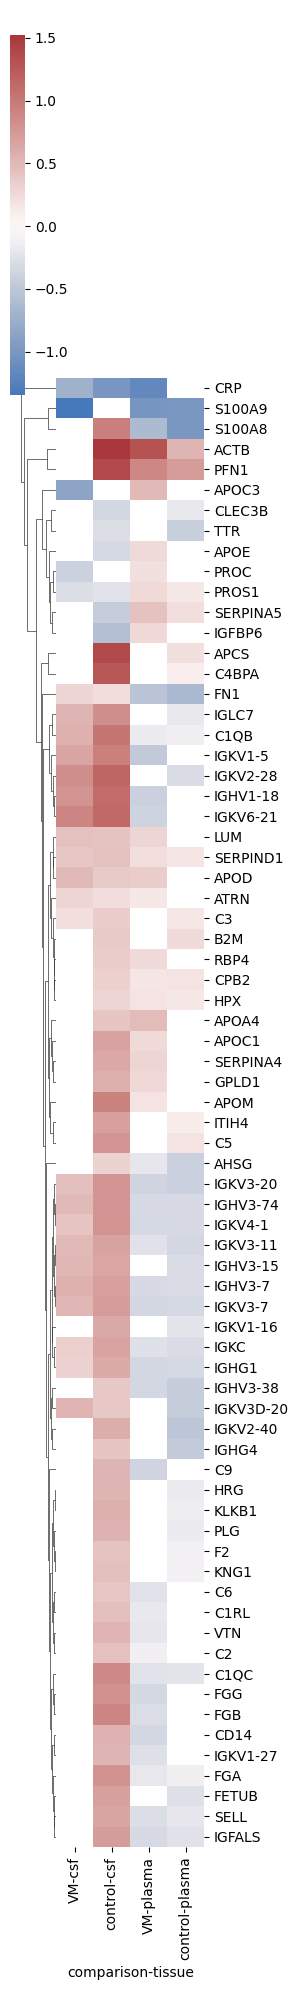

In [233]:
sub_dfs = dfs_df.loc[dfs_df.index.get_level_values('index') == 'log2fc'].droplevel('index')
#order = sub_dfs.mean().sort_values().index.tolist()
sub_dfs = sub_dfs.T
sub_null = dfs_df.loc[dfs_df.index.get_level_values('index') == 'pval'].droplevel('index')
sub_null = sub_null.T
sub_null[sub_null>=0.05] = np.nan
#sub_dfs[sub_null>=0.05] = np.nan

g = sns.clustermap(sub_dfs, mask = sub_null.isnull(), 
               cmap = 'vlag', 
               center = 0,
               figsize = (3,20),
               col_cluster=False, row_cluster=True)
g.figure.savefig("../output_blood/heatmap_csf_blood_significant.svg")


In [238]:
masked_df = sub_dfs[sub_null.isnull()]
masked_df = masked_df.dropna(how = 'all')
masked_df.to_excel('../output_blood/heatmap_csf_blood_significant.xlsx')
masked_df.head()

comparison        VM control        VM   control
tissue           csf     csf    plasma    plasma
VTN         0.034858     NaN       NaN -0.041544
HRG         0.100601     NaN  0.074633       NaN
IGKV2-28         NaN     NaN -0.294108       NaN
CPB2        0.122798     NaN       NaN       NaN
CLEC3B     -0.051742     NaN  0.106543       NaN

In [1130]:
heatmap_order = sub_dfs.iloc[g.dendrogram_row.reordered_ind].index.tolist()

In [1126]:
test =uniprot_mapping.copy()
test['Gene Names'] = test['Gene Names'].str.split(' ', expand = True)[0] 
test = test.loc[(test['Gene Names'].isin(sub_dfs.index.tolist()))]
test.drop_duplicates(inplace = True)
print(test['Gene Names'].unique().shape)
test.GO = test.GO.astype(str)

sub = test.GO.value_counts().reset_index()

test.loc[~(test.GO.isin(sub[sub['count']>=5]['GO'].tolist())),'GO'] = 'low'


(72,)


In [1127]:
# add missing Entries
print(test[['Entry','GO','Gene Names']].drop_duplicates().shape)
test = pd.merge(pd.DataFrame(sub_dfs.index.tolist(), columns = ['Gene Names']), test[['Entry','GO','Gene Names']].drop_duplicates(), on = 'Gene Names', how = 'left')
print(test.shape)
test.fillna('nan', inplace = True)
# sort the test according to heatmap
test['Gene Names'] = pd.Categorical(test['Gene Names'], categories=heatmap_order, ordered=True)
test = test.sort_values(['Gene Names'])
test['Gene Names'] = test['Gene Names'].astype(str)
#test['Gene Names'] = test['Gene Names'].str.split(' ', expand = True)[0] 

(187, 3)
(187, 3)


In [1129]:

# Data for Sankey plot

# Get unique values of Genes and annotations
all_Genes = list(test['Gene Names'].unique())
#all_Genes.reverse()
all_annotations = list(test['GO'].unique())


# Create indices for sankey source (Gene Namess) and targets (annotations)
test['Gene Names_index'] = test['Gene Names'].apply(lambda x: all_Genes.index(x))
test = test.sort_values(by='Gene Names_index').reset_index(drop=True)  # Ensure test is sorted by the order of 'all_Genes'
test['annotation_index'] = test['GO'].apply(lambda x: len(all_Genes) + all_annotations.index(x))

# Generate a color for each annotation
colors = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(all_annotations))]

# Map annotation index to colors
target_colors = {len(all_Genes) + i: colors[i] for i in range(len(all_annotations))}

# Create a list of colors for the links based on target node
link_colors = [target_colors[target] for target in test['annotation_index']]

# Define node positions for source nodes (x = 0.1 for all sources, y spaced evenly)
source_y_positions = [i / len(all_Genes) for i in range(len(all_Genes))]  # Evenly spaced source y positions
source_x_positions = [0.1] * len(all_Genes)  # Fixed x position for sources

# Only set positions for sources, leave target positions to be automatically placed
node_x_positions = source_x_positions + [None] * len(all_annotations)  # No x positions for targets
node_y_positions = source_y_positions + [None] * len(all_annotations)  # No y positions for targets

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = all_Genes + all_annotations,
        x = node_x_positions,
        y = node_y_positions
    ),
    link = dict(
        source = test['Gene Names_index'],  # starting points (Gene Namess)
        target = test['annotation_index'],  # end points (annotations)
        value = [1] * len(test),  # each link has equal value (1 for each protein-GO link)
        color = link_colors  # set the color of links
    )
))

# Update layout and display the figure
fig.update_layout(title_text="Sankey Diagram of Protein Gene Names and Annotations", 
                  font_size=10,
                  height=800,
                  width=600)

# Define the path where you want to save the PDF
output_path = '../output_blood/annotation_heatmap_csf_blood_sign_annotation.svg'

# Save the figure as a PDF
pio.write_image(fig, output_path, format='svg')

fig.show()

In [1103]:
sub_null = dfs_df.loc[dfs_df.index.get_level_values('index') == 'pval'].droplevel('index')
sub_null[sub_null<=0.05]

PFN1   IGKV4-1  IGKV1-16     KLKB1        C9    IGFBP6  \
comparison tissue                                                               
VM         csf          NaN  0.015226       NaN       NaN       NaN       NaN   
control    csf     0.000001  0.000015  0.014764  0.000056  0.002216  0.000608   
VM         plasma  0.022967  0.006937       NaN       NaN  0.002336  0.024658   
control    plasma  0.046916  0.000538  0.049139  0.008727       NaN       NaN   

                   SERPINA5       CRP        C5     PROS1  ...     APOA4  \
comparison tissue                                          ...             
VM         csf          NaN  0.021042       NaN  0.002352  ...       NaN   
control    csf     0.020203  0.005720  0.000003  0.009792  ...  0.005858   
VM         plasma  0.000089  0.019191       NaN  0.000014  ...  0.000691   
control    plasma  0.040188       NaN  0.001348  0.000667  ...       NaN   

                      IGHG4      IGKV6-21  IGKV1-27       HRG  IGKV3D-20  \
comparison tissue                                                          
VM         csf          NaN  1.521890e-04       NaN       NaN   0.006449   
control    csf     0.003208  4.495989e-07  0.008850  0.000005   0.024672   
VM         plasma       NaN  3.735748e-02  0.049268       NaN        NaN   
control    plasma  0.035736           NaN       NaN  0.023804   0.003286   

                      IGHG1       HPX     ITIH4        C6  
comparison tissue                                          
VM         csf     0.042309       NaN       NaN       NaN  
control    csf     0.000070  0.003161  0.000018  0.005286  
VM         plasma  0.000022  0.003507       NaN  0.004366  
control    plasma  0.000068  0.003111  0.004410       NaN  

[4 rows x 72 columns]

In [987]:
# plot expression correlation of csf and plasma proteins: how does the expression pattern compare?
# combine plasma and csf data
info_blood = pd.read_excel('../output/aps_meta_plasma.xlsx')
aps_blood = pd.read_table('../output/aps_data_corrected_plasma_development.tsv', sep ='\t').drop(['Protein.Names','Genes','First.Protein.Description'], axis = 1)
aps_blood = aps_blood.set_index(['Protein.Group']).T.reset_index()
aps_blood.rename(columns={'index':'sample_id'}, inplace=True)
blood_data = np.log2(pd.merge(info_blood.drop(['batch','group'],axis =1), aps_blood, on = 'sample_id')
                    .sort_values(['diagnosis','study_cohort'])
                    .set_index(['sample_id','diagnosis','study_cohort']))[combined_blood_csf]

info_csf = pd.read_table('../output/aps_meta_csf.tsv', sep ='\t')
info_csf.sample_id = ['csf'+x for x in info_csf.sample_id.astype(str)]
aps_csf = pd.read_table('../output/aps_data_csf_corrected_csf_development.tsv', sep ='\t').drop(['Protein.Names','Genes','First.Protein.Description'], axis = 1)
aps_csf = aps_csf.set_index(['Protein.Group']).T.reset_index()
aps_csf.rename(columns={'index':'sample_id'}, inplace=True)
csf_data = np.log2(pd.merge(info_csf, aps_csf, on = 'sample_id').sort_values(['diagnosis','study_cohort']).set_index(['sample_id','diagnosis','study_cohort']))[combined_blood_csf]

combined_data = pd.concat([blood_data, csf_data])
combined_data.head()

P07737     P06312  \
sample_id        diagnosis study_cohort                               
plasma3524649866 LNB       plasma_development  24.938905  29.372391   
plasma3524649882 LNB       plasma_development  22.525091  29.404290   
plasma3524649873 LNB       plasma_development  24.821836  29.469644   
plasma3524649112 LNB       plasma_development  24.211056  29.760378   
plasma3524649842 LNB       plasma_development  23.589515  28.670259   

                                                  P04430     P03952  \
sample_id        diagnosis study_cohort                               
plasma3524649866 LNB       plasma_development  23.709408  25.578339   
plasma3524649882 LNB       plasma_development  23.451910  25.857490   
plasma3524649873 LNB       plasma_development  24.046256  25.944842   
plasma3524649112 LNB       plasma_development  23.656524  25.578398   
plasma3524649842 LNB       plasma_development  23.451104  25.638172   

                                                  P02748     P24592  \
sample_id        diagnosis study_cohort                               
plasma3524649866 LNB       plasma_development  27.865789  19.571452   
plasma3524649882 LNB       plasma_development  28.070687  19.465601   
plasma3524649873 LNB       plasma_development  27.642259  19.657448   
plasma3524649112 LNB       plasma_development  28.262124  19.529656   
plasma3524649842 LNB       plasma_development  27.682088  19.437600   

                                                  P05154     P02741  \
sample_id        diagnosis study_cohort                               
plasma3524649866 LNB       plasma_development  24.774596  24.128617   
plasma3524649882 LNB       plasma_development  24.404789  24.537323   
plasma3524649873 LNB       plasma_development  24.534460  21.296239   
plasma3524649112 LNB       plasma_development  24.296919  24.882323   
plasma3524649842 LNB       plasma_development  24.212832  22.364336   

                                                  P01031     P07225  ...  \
sample_id        diagnosis study_cohort                              ...   
plasma3524649866 LNB       plasma_development  27.306485  26.439527  ...   
plasma3524649882 LNB       plasma_development  27.560960  26.316658  ...   
plasma3524649873 LNB       plasma_development  27.358937  26.511696  ...   
plasma3524649112 LNB       plasma_development  27.622949  26.137484  ...   
plasma3524649842 LNB       plasma_development  26.921383  26.522730  ...   

                                                  P06727     P01861  \
sample_id        diagnosis study_cohort                               
plasma3524649866 LNB       plasma_development  27.908933  28.289455   
plasma3524649882 LNB       plasma_development  29.287496  29.117871   
plasma3524649873 LNB       plasma_development  29.716342  30.048116   
plasma3524649112 LNB       plasma_development  29.142409  30.976822   
plasma3524649842 LNB       plasma_development  29.073872  29.350027   

                                               A0A0C4DH24  A0A075B6S5  \
sample_id        diagnosis study_cohort                                 
plasma3524649866 LNB       plasma_development   23.628192   26.283378   
plasma3524649882 LNB       plasma_development   24.178754   26.448131   
plasma3524649873 LNB       plasma_development   24.499988   25.871606   
plasma3524649112 LNB       plasma_development   24.696961   26.281193   
plasma3524649842 LNB       plasma_development   25.088276   26.861238   

                                                  P04196  A0A0C4DH25  \
sample_id        diagnosis study_cohort                                
plasma3524649866 LNB       plasma_development  28.334811   27.438346   
plasma3524649882 LNB       plasma_development  27.771856   27.131367   
plasma3524649873 LNB       plasma_development  28.605665   27.243051   
plasma3524649112 LNB       plasma_development  27.960735   26.811405   
plasma3524649842 LNB       plasma_development  27.702093   26.288319   

          

In [984]:
# # plot expression correlation of csf and plasma proteins: how does the expression pattern compare?
# # combine plasma and csf data
# info_blood = pd.read_excel('../output/aps_meta_plasma.xlsx')
# aps_blood = pd.read_table('../output/aps_data_corrected_plasma_development.tsv', sep ='\t').drop(['Protein.Names','Genes','First.Protein.Description'], axis = 1)
# aps_blood = aps_blood.set_index(['Protein.Group']).T.reset_index()
# aps_blood.rename(columns={'index':'sample_id'}, inplace=True)
# blood_data = np.log2(pd.merge(info_blood.drop(['batch','group'],axis =1), aps_blood, on = 'sample_id')
#                     .sort_values(['diagnosis','study_cohort'])
#                     .set_index(['sample_id','diagnosis','study_cohort']))[combined_blood_csf]

# info_csf = pd.read_table('../output/aps_meta_csf.tsv', sep ='\t')
# info_csf.sample_id = ['csf'+x for x in info_csf.sample_id.astype(str)]
# aps_csf = pd.read_table('../output/aps_data_csf_corrected_csf_development.tsv', sep ='\t').drop(['Protein.Names','Genes','First.Protein.Description'], axis = 1)
# aps_csf = aps_csf.set_index(['Protein.Group']).T.reset_index()
# aps_csf.rename(columns={'index':'sample_id'}, inplace=True)
# csf_data = np.log2(pd.merge(info_csf, aps_csf, on = 'sample_id').sort_values(['diagnosis','study_cohort']).set_index(['sample_id','diagnosis','study_cohort']))[combined_blood_csf]

# combined_data = pd.concat([blood_data, csf_data])

# from inmoose.pycombat import pycombat_norm
# combined_data = pycombat_norm(combined_data.T,combined_data.reset_index()['study_cohort'].tolist()).T

combined_data = pd.read_csv('../output/combined_blood_csf_data_all_full_overlap.csv')
combined_data.set_index(['sample_id','diagnosis','study_cohort'], inplace = True)
#combined_data = combined_data.T

In [985]:
# make correlation plot of csf proteins against blood proteins
print(combined_data.shape)

# order proteins according to mean expression 
order = combined_data.mean().sort_values().index.tolist()


(465, 195)


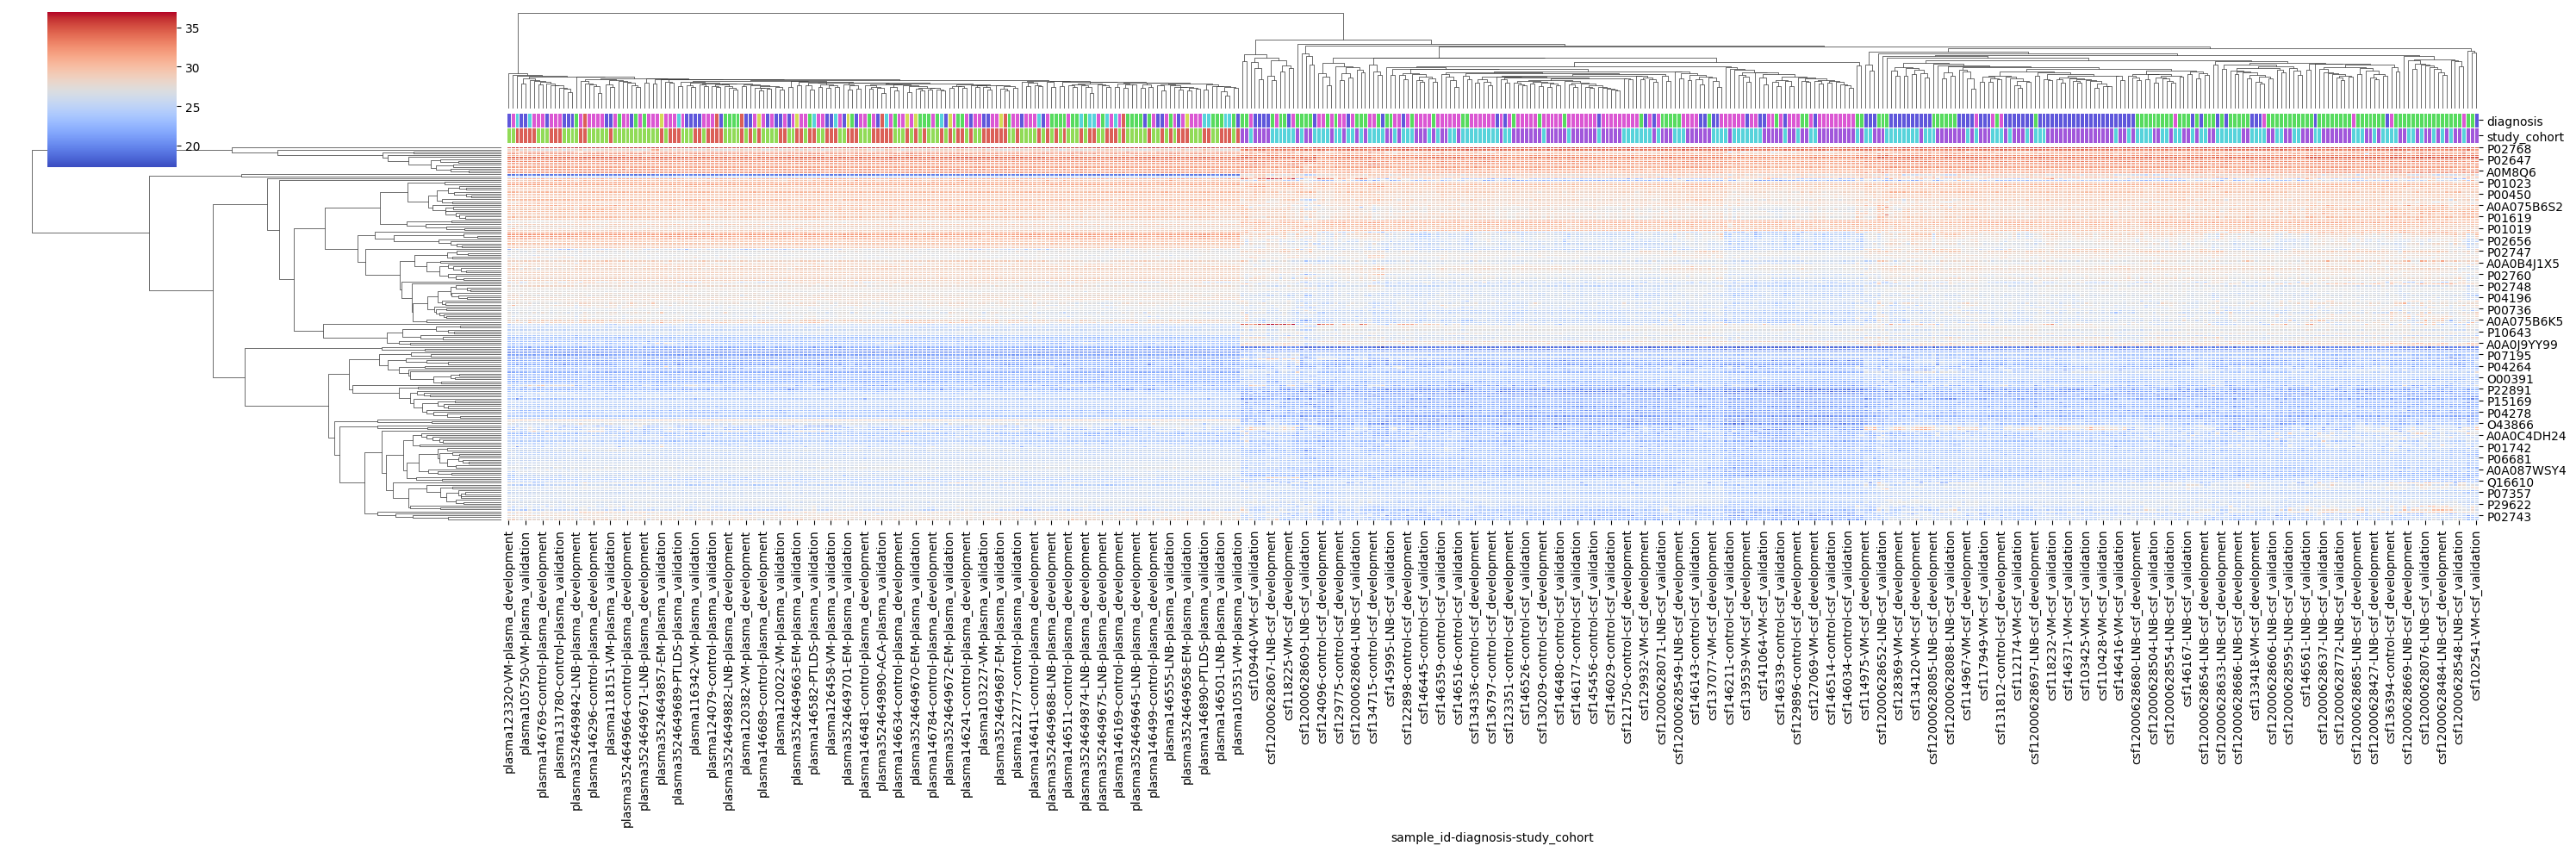

In [986]:
# diagnosis colors
diagnosis_labels = combined_data.index.get_level_values("diagnosis")
corr_pal = sns.hls_palette(diagnosis_labels.unique().size)
corr_lut = dict(zip(map(str, diagnosis_labels.unique()), corr_pal))
# create diagnosis index
diagnosis_colors = pd.Series(diagnosis_labels, index=combined_data.index).map(corr_lut)

# cohort colors
cohort_labels = combined_data.index.get_level_values("study_cohort")
corr_pal = sns.hls_palette(cohort_labels.unique().size)
corr_lut = dict(zip(map(str, cohort_labels.unique()), corr_pal))
# create diagnosis index
cohort_colors = pd.Series(cohort_labels, index=combined_data.index).map(corr_lut)

# combine column colors:
diagnosis_cohort_colors = pd.DataFrame(diagnosis_colors).join(pd.DataFrame(cohort_colors))

g = sns.clustermap(combined_data.T, col_colors = diagnosis_cohort_colors,
                   figsize=(30, 10), #col_colors = group_colors, row_colors = cohort_cluster_colors,
                   col_cluster=True, row_cluster=True,
                   #col_linkage=col_linkage, 
                   #row_linkage = row_linkage,
                   linewidth=0.5, linecolor='white', cmap = 'coolwarm')


In [991]:
#combined_data = pd.read_csv('../output/combined_blood_csf_data_corrected.csv')
#combined_data.set_index(['sample_id','diagnosis','study_cohort'], inplace = True)
#combined_data = zscore(combined_data, axis = 1)
X_train = combined_data[(combined_data.index.get_level_values('diagnosis').isin(['LNB','control']))&(combined_data.index.get_level_values('study_cohort').str.contains('csf'))].values
X_val = combined_data[(combined_data.index.get_level_values('diagnosis').isin(['LNB','control']))&(combined_data.index.get_level_values('study_cohort').str.contains('plasma'))].values
y_train = combined_data[(combined_data.index.get_level_values('diagnosis').isin(['LNB','control']))&(combined_data.index.get_level_values('study_cohort').str.contains('csf'))].index.get_level_values('diagnosis')
y_val = combined_data[(combined_data.index.get_level_values('diagnosis').isin(['LNB','control']))&(combined_data.index.get_level_values('study_cohort').str.contains('plasma'))].index.get_level_values('diagnosis')
y_val

Index(['LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB',
       'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB',
       'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control'],
      dtype='object', name='diagnosis')

In [992]:
y_train

Index(['LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB',
       'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB',
       'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB',
       'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB',
       'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'LNB', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control', 'control', 'control',
       'control', 'control', 'control', 'control'],
      dtype='object', name='diagnosis')

In [993]:
from sklearn.calibration import CalibratedClassifierCV

# compute cv results

classifier = SVC(class_weight='balanced', kernel='linear', probability=True, random_state=7)
name = 'SVC'
mccs = []
aucs = []
fits = []
mcc_val = []
auc_val = []
dfs = []

no_cv = 5
# calculate performance during training 
cv = StratifiedKFold(n_splits=no_cv)
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    print('cv: {}'.format(i+1))
    classifier.fit(X_train[train], y_train[train])
    calibrated = CalibratedClassifierCV(classifier, method='sigmoid', cv='prefit')
    calibrated.fit(X_train[train], y_train[train])
    classifier = calibrated
    fits.append(classifier)
    # predict for "test" set
    y_pred = classifier.predict(X_train[test])
    y_prob = classifier.predict_proba(X_train[test])[:,1]
    result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    #result['sample']=sample_lst[test]
    result['run']='test'
    dfs.append(result)
    mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    aucs.append(round(roc_auc_score(result.observed,result.probability),2))
    # predict for validation sets
    y_pred = classifier.predict(X_val)
    y_prob = classifier.predict_proba(X_val)[:,1]
    result = pd.DataFrame([y_val, y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    #result['sample']=val_data.index.get_level_values('sample_id').tolist()
    result['run']='val'
    dfs.append(result)  
    mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
    
mcc_mean = np.mean(mccs)
mcc_std = np.std(mccs)
auroc_mean = np.mean(aucs)
auroc_std = np.std(aucs)
to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
print('Test: MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))

result = pd.concat(dfs)


cv: 1
cv: 2
cv: 3
cv: 4
cv: 5
Test: MCC: 0.9019999999999999, AUROC: 0.9780000000000001
Validation: MCC: 0.0, AUROC: 0.61


In [ ]:
info_csf = pd.read_table('../output/aps_meta_csf.tsv', sep ='\t')
info_csf.sample_id = ['csf'+x for x in info_csf.sample_id.astype(str)

In [83]:
mean_df = heatmap_data.T
mean_df.groupby(mean_df.index.get_level_values('diagnosis')).mean().T

diagnosis                              ACA        EM       LNB     PTLDS  \
Gene Names Entry                                                           
IGKV3-7    A0A075B6H7            -0.264844  0.261942 -0.334247 -0.191375   
IGKV2-28;  A0A075B6P5;P01615      0.757593  0.364509 -0.037201 -0.596646   
IGKV2D-24; A0A075B6R9;A0A0C4DH68  0.055356 -0.166158  0.029621 -0.389171   
IGKV1-27   A0A075B6S5             0.605325 -0.297780 -0.010111 -0.417203   
IGKV2-40;  A0A087WW87;P01614      0.099154  0.169360  0.276724 -0.215867   
...                                    ...       ...       ...       ...   
ECM1       Q16610                -0.379417  0.004818  0.123585  0.241822   
CPB2       Q96IY4                 0.249566  0.133675  0.006612 -0.049174   
IL1RAP     Q9NPH3                -0.299204  0.025299  0.188139  0.090535   
C1RL       Q9NZP8                -0.879276 -0.114692  0.004134 -0.100775   
FETUB      Q9UGM5                -0.216270  0.300021 -0.134212 -0.087444   

diagnosis                               VM   control  
Gene Names Entry                                      
IGKV3-7    A0A075B6H7             0.074873  0.235775  
IGKV2-28;  A0A075B6P5;P01615      0.150592 -0.001148  
IGKV2D-24; A0A075B6R9;A0A0C4DH68  0.320030  0.090654  
IGKV1-27   A0A075B6S5            -0.155640  0.475955  
IGKV2-40;  A0A087WW87;P01614     -0.017607 -0.047355  
...                                    ...       ...  
ECM1       Q16610                -0.190800  0.016879  
CPB2       Q96IY4                 0.257428 -0.345491  
IL1RAP     Q9NPH3                -0.020758 -0.077858  
C1RL       Q9NZP8                 0.233700  0.198585  
FETUB      Q9UGM5                 0.015035  0.060814  

[101 rows x 6 columns]

(232, 79)
(79, 101)


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/seaborn/matrix.py:1113: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



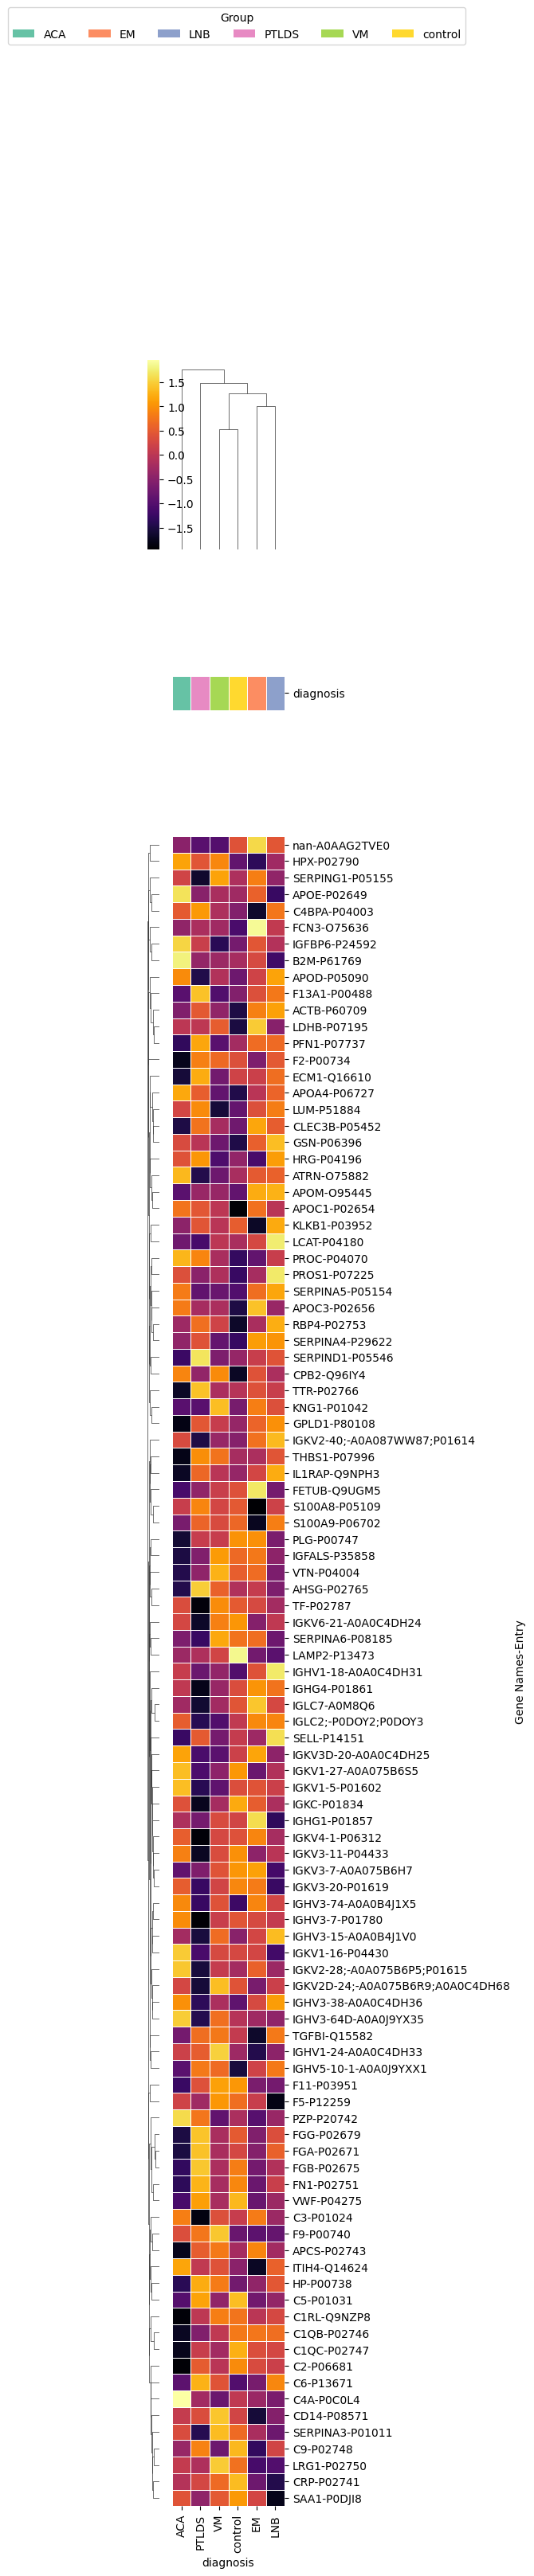

In [96]:
aps_data = pd.read_table('../output/aps_data_corrected_plasma_validation.tsv', sep ='\t').drop(['Protein.Names','Genes','First.Protein.Description'], axis = 1)
aps_data = aps_data.set_index(['Protein.Group']).T.reset_index()
aps_data.rename(columns={'index':'sample_id'}, inplace=True)

heatmap_data = np.log2(pd.merge(info.drop(['batch','group'],axis =1), aps_data, on = 'sample_id')
                       .sort_values(['diagnosis','study_cohort'])
                       .set_index(['sample_id','diagnosis','study_cohort'])
                       .T)
print(heatmap_data.shape)
heatmap_data = heatmap_data.loc[heatmap_data.index.get_level_values(0).isin(combined_lst)].T
print(heatmap_data.shape)
heatmap_data = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()
heatmap_data = heatmap_data.T

# get mean
mean_df = heatmap_data.T
heatmap_data = mean_df.groupby(mean_df.index.get_level_values('diagnosis')).mean().T

# merge annotation with heatmap_data:
annotation_test = pd.merge(pd.DataFrame(heatmap_data.index.tolist(), columns = ['Entry']), annotation_test[['Entry','GO','Gene Names']], on = 'Entry', how = 'left')


# 2. Add 'annotation' and 'Gene Names' from annotation_test to the index
annotations = annotation_test['GO'].tolist()  # Replace 'GO' with the correct column name if needed
gene_names = annotation_test['Gene Names'].tolist()  # Ensure 'Gene Names' is the correct column

# Creating a MultiIndex
heatmap_data.index = pd.MultiIndex.from_tuples(
    list(zip(gene_names, heatmap_data.index)),
    names=['Gene Names', 'Entry']
)
# # annotation colors
# annotation_labels = heatmap_data.index.get_level_values("annotation")
# corr_pal = sns.hls_palette(annotation_labels.unique().size)
# corr_lut = dict(zip(map(str, annotation_labels.unique()), corr_pal))
# # create correlation index
# annotation_colors = pd.Series(annotation_labels, index=heatmap_data.index).map(corr_lut)

# grouping colors
group_labels = heatmap_data.columns.get_level_values("diagnosis")
group_pal = sns.color_palette('Set2',group_labels.unique().size)
group_lut = dict(zip(map(str, group_labels.unique()), group_pal))
# create group index
group_colors = pd.Series(group_labels, index=heatmap_data.columns).map(group_lut)

g = sns.clustermap(heatmap_data, z_score=False, col_cluster=True,
                   row_linkage=row_linkage,  # Use row_linkage to cluster rows
                   figsize=(3,35), col_colors=group_colors, 
                   linewidth=0.5, cmap="inferno", center=0, 
                   dendrogram_ratio=0.1, metric='euclidean', colors_ratio=0.018)

# add legends
for label in group_labels.unique():
    g.ax_col_dendrogram.bar(0, 0, color=group_lut[label], label=label, linewidth=0);
l1 = g.ax_col_dendrogram.legend(title='Group', loc="center", ncol=7, bbox_to_anchor=(0.5, 1), bbox_transform=gcf().transFigure)
g.fig.subplots_adjust(right=0.7)
#g.ax_cbar.set_position((0.8, .2, .03, .4))

g.figure.savefig("../output_blood/heatmap_csf_validation_annotation.svg")


# ML analysis

In [116]:
ml_data_full = pd.read_csv("../output/aps_data_corrected_plasma_combined.tsv", sep = '\t')
ml_data_full = ml_data_full.set_index(['Protein.Group']).T.reset_index()
ml_data_full.rename(columns={'index':'sample_id'}, inplace=True)

ml_data_full = np.log2(pd.merge(info.drop(['batch','group'], axis =1), ml_data_full, on = 'sample_id')
                       .sort_values(['diagnosis','study_cohort'])
                       .set_index(['sample_id','diagnosis','study_cohort']).astype(float))

# use all proteins as features
#combined_lst = list(ml_data_full.columns)

ml_data = ml_data_full[combined_lst]
ml_data.index.set_names(['_sample','_diagnosis','_study'], inplace = True)

# change column names to gene names
gene_mapping_df = uniprot_mapping[uniprot_mapping.Entry.isin(combined_lst)][['Entry','Gene Names']].drop_duplicates()
gene_mapping_df['Gene Names']=gene_mapping_df['Gene Names'].str.split(' ').str[0].str.split(';').str[0]
gene_mapping_df = pd.merge(gene_mapping_df, pd.DataFrame(combined_lst, columns = ['Entry']), on = 'Entry', how = 'outer')
gene_mapping_df.loc[gene_mapping_df['Gene Names'].isnull(),'Gene Names'] = gene_mapping_df.loc[gene_mapping_df['Gene Names'].isnull(),'Entry']
gene_mapping_df.set_index('Entry', inplace = True)

ml_data.columns = gene_mapping_df.loc[combined_lst]['Gene Names'].tolist()
ml_data.to_csv('../output_blood/blood_ml_data_full.tsv', sep = '\t')

In [117]:
from sklearn.model_selection import train_test_split, StratifiedKFold#, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
from scipy import interp
import plotly.graph_objects as go
#from yellowbrick.model_selection import RFECV

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV
from scipy.stats import zscore


import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import ensemble
from sklearn.linear_model import Perceptron

from scipy.stats import uniform, truncnorm, randint

import time

n_features = len(combined_lst)
n_samples = int(ml_data.loc[ml_data.index.get_level_values('_study') == 'plasma_development'].shape[0]*0.8)


# hyperparameter grids
lr_grid = {"C": [0.1, 0.5, 1],#np.logspace(0, 4, num=10),
           "penalty": ['l1', 'l2','elasticnet'],
           "solver": ['liblinear', 'saga'],
           "max_iter":[5000]}
lda_grid = {"solver": ['svd', 'lsqr', 'eigen'],
            "shrinkage":[None, 'auto']}
knn_grid = {"n_neighbors": randint(1,11),
            "weights":['uniform','distance'], 
            "algorithm":['auto','ball_tree','kd_tree','brute'], 
            "leaf_size":randint(10,50), 
            "p":[1,2],
            "metric":['euclidean','minkowski','mahalanobis','seuclidean']}
dt_grid = {"criterion": ["gini", "entropy"],
            "splitter": ['best','random'],
            #"max_features": randint(1, n_features),
            "min_samples_leaf": randint(1, 11),
            "class_weight":[None, 'balanced']}
nb_grid = {}
svc_grid = {"kernel": ['linear'], #'poly', 'rbf', 'sigmoid'], #removed because it does not work with importance getter
            "gamma":['scale','auto'],
            "class_weight" : ['balanced',None],
            "probability" : [True]}
rf_grid = {"max_depth": [3, None],
            "min_samples_split": randint(1, 11),
            "min_samples_leaf": randint(1, 11),
            "bootstrap": [True, False],
            "criterion": ["gini", "entropy"],
            "n_estimators": randint(1,200),
            "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1)}
nnet_grid = {"hidden_layer_sizes":randint(1,n_features),
            "activation": ['identity','logistic','tanh','relu'],
            "solver":['lbfgs','sgd','adam'],
            "batch_size":[int(n_samples/10),int(n_samples/5), int(n_samples/2)],
            "learning_rate_init":np.logspace(np.log10(0.00001), np.log10(0.99999), num=10),
            "max_iter":[5000],
            "early_stopping":[True],
            "validation_fraction":[0.25]}
perceptron_grid = {"penalty": ['l1', 'l2','elasticnet'],
                   "max_iter":[5000],
                   "class_weight" : ['balanced',None]}
                   
gp_grid = {}
ab_grid = {}
qda_grid = {}
eet_grid = {}

# models
models = []
models.append(('LR', lr_grid, LogisticRegression(random_state=7)))
models.append(('LDA', lda_grid, LinearDiscriminantAnalysis()))
models.append(('KNN', knn_grid, KNeighborsClassifier()))
models.append(('DT', dt_grid, DecisionTreeClassifier(random_state=7)))
models.append(('Naive Bayes', nb_grid, GaussianNB()))
models.append(('SVC', svc_grid, SVC(random_state=7)))
models.append(('RF', rf_grid, RandomForestClassifier(random_state=7)))
models.append(('NNet', nnet_grid, MLPClassifier(random_state=7)))
#models.append(('Perceptron',perceptron_grid,Perceptron(random_state = 7)))
models.append(('GP', gp_grid, GaussianProcessClassifier(random_state=7)))
models.append(('Adaboost', ab_grid, AdaBoostClassifier(random_state=7)))
models.append(('QDA', qda_grid, QuadraticDiscriminantAnalysis()))
models.append(('ensembleextratree', eet_grid, ensemble.ExtraTreesClassifier(random_state=7)))
#import xgboost as xgb
#models.append(('xgb',xgb_grid,xgb.Data))

In [118]:
combined_lst = gene_mapping_df.loc[gene_mapping_df.index.get_level_values('Entry').isin(diffs[0])]['Gene Names'].tolist()

prepared_data = ml_data[combined_lst]
prepared_data=zscore(prepared_data, axis = 1)
train_data = prepared_data.loc[(prepared_data.index.get_level_values('_study')=='plasma_development')&(prepared_data.index.get_level_values('_diagnosis').isin(['LNB','VM']))][combined_lst]

no_cv = 3
X = train_data.values # all the protein columns
sample_lst = train_data.index.get_level_values('_sample').values
y = pd.Categorical(train_data.index.get_level_values('_diagnosis')).codes # control is 0, LNB is 1 or LNB 0 and VM 1
#X_train, X_test, y_train, y_test, samples_train, samples_test = train_test_split(X, y, train_data['sample'].tolist(), test_size=0.2, random_state=7, stratify=y)
X_train = X.copy()
y_train = y.copy()
sum(y_train)


19

In [119]:
ml_data.reset_index().groupby('_study')._diagnosis.value_counts()

_study              _diagnosis
plasma_development  control       48
                    LNB           27
                    VM            19
plasma_validation   control       19
                    VM            18
                    PTLDS         17
                    LNB           10
                    EM             9
                    ACA            6
Name: count, dtype: int64

In [120]:
val_data = prepared_data.loc[(prepared_data.index.get_level_values('_study')=='plasma_validation')&(prepared_data.index.get_level_values('_diagnosis').isin(['LNB','VM']))][combined_lst]
X_val = val_data.values
y_val = pd.Categorical(val_data.index.get_level_values('_diagnosis')).codes
sum(y_val)

18

In [121]:
len(combined_lst)

68

In [ ]:
from umap import UMAP

# processed and imputed
features = combined_lst
umap_2d = UMAP(n_components=2, init='random', random_state=0)

umap_df = pd.DataFrame(umap_2d.fit_transform(ml_data[features]))

col_cols = ['_study','_diagnosis']

for col in col_cols:
    fig = px.scatter(
    umap_df, x=0, y=1,
    color=ml_data.reset_index()[col],
    template = 'simple_white', height = 800, width = 900)
    fig.show()
#    fig.write_image('../output/v3/UMAP_processed_pimms_{}.pdf'.format(col))


In [122]:
from itertools import compress
protein_cols = combined_lst#gene_mapping_df.loc[combined_lst]['Gene Names'].tolist()
# ML alg. selection
optimal_models = []
optimal_no_features = []
optimal_features = []
start_time = time.time()

dfs = []
metrics = []
to_plot = []   
fitted_models = []
    
for name, grid, estimator in models:
    print(name)
    # grid search
    selector = RandomizedSearchCV(estimator=estimator, param_distributions=grid, cv=StratifiedKFold(no_cv), scoring = 'f1_weighted', n_jobs = -1)
    clf = selector.fit(X_train,y_train)
    optimal_model = clf.best_estimator_
    optimal_models.append(optimal_model)
    # feature reduction
    if name in ['Naive Bayes','NNet', 'GP', 'QDA', 'KNN']: # skip rfecv for models not supported by importance
        optimal_no_features.append(len(protein_cols))
        optimal_features.append(protein_cols)
        print('skipping feature importance')
        X_reduced = X_train
        X_val_reduced = X_val
    else:
        selector = RFECV(optimal_model, cv=3, scoring='f1_weighted')
        selector = selector.fit(X_train, y_train)
        optimal_no_features.append(sum(selector.support_))
        optimal_features.append(list(compress(protein_cols, selector.support_)))
        print('optimal no features = {}'.format(sum(selector.support_)))
        X_reduced = X_train[:,selector.support_]
        X_val_reduced = X_val[:, selector.support_]
    
    # compute cv results
    print('computing predictions for: {}'.format(name))
    classifier = optimal_model
    mccs = []
    aucs = []
    fits = []
    mcc_val = []
    auc_val = []
                            
    # calculate performance during training
    cv = StratifiedKFold(n_splits=no_cv)
    for i, (train, test) in enumerate(cv.split(X_reduced, y_train)):
        print('cv: {}'.format(i+1))
        classifier.fit(X_reduced[train], y_train[train])
        
        fits.append(classifier)
        # predict for "test" set
        y_pred = classifier.predict(X_reduced[test])
        y_prob = classifier.predict_proba(X_reduced[test])[:,1]
        result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
        result.columns = ['observed','predicted','probability']
        result['cv']=i+1
        result['model']=name
        result['sample']=sample_lst[test]
        result['run']='test'
        dfs.append(result)
        mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
        aucs.append(round(roc_auc_score(result.observed,result.probability),2))
        # predict for validation sets
        y_pred = classifier.predict(X_val_reduced)
        y_prob = classifier.predict_proba(X_val_reduced)[:,1]
        result = pd.DataFrame([y_val, y_pred, y_prob]).T
        result.columns = ['observed','predicted','probability']
        result['cv']=i+1
        result['model']=name
        result['sample']=val_data.index.get_level_values('_sample').tolist()
        result['run']='val'
        dfs.append(result)  
        mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
        auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
        
    fitted_models.append(fits)
    #test
    metrics_results = pd.DataFrame(mccs)
    metrics_results.columns = ['MCC']
    metrics_results['AUROC']=aucs
    metrics_results['cv']=list(range(1,1+no_cv))
    metrics_results['model']=name
    metrics_results['run']='test'
    metrics.append(metrics_results)

    #val
    metrics_results = pd.DataFrame(mccs)
    metrics_results.columns = ['MCC']
    metrics_results['AUROC']=aucs
    metrics_results['cv']=list(range(1,1+no_cv))
    metrics_results['model']=name
    metrics_results['run']='val'
    metrics.append(metrics_results)
    
    mcc_mean = np.mean(mccs)
    mcc_std = np.std(mccs)
    auroc_mean = np.mean(aucs)
    auroc_std = np.std(aucs)
    to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
    print('MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
    
    print('\n{} model tested --- {} minutes ---\n'.format(name,round(((time.time() - start_time)/60),3)))


result_df = pd.concat(dfs)
metrics_df = pd.concat(metrics)


LR


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-package

optimal no features = 30
computing predictions for: LR
cv: 1
cv: 2
cv: 3
MCC: 0.5633333333333334, AUROC: 0.9500000000000001

LR model tested --- 0.155 minutes ---

LDA


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx80

optimal no features = 39
computing predictions for: LDA
cv: 1
cv: 2
cv: 3
MCC: 0.96, AUROC: 0.9933333333333333

LDA model tested --- 0.168 minutes ---

KNN


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/l

skipping feature importance
computing predictions for: KNN
cv: 1
cv: 2
cv: 3
MCC: 0.6833333333333332, AUROC: 0.8466666666666667

KNN model tested --- 0.173 minutes ---

DT
optimal no features = 29
computing predictions for: DT
cv: 1
cv: 2
cv: 3
MCC: 0.39999999999999997, AUROC: 0.7166666666666667

DT model tested --- 0.18 minutes ---

Naive Bayes
skipping feature importance
computing predictions for: Naive Bayes
cv: 1
cv: 2
cv: 3
MCC: 0.6233333333333334, AUROC: 0.9333333333333332

Naive Bayes model tested --- 0.181 minutes ---

SVC


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



optimal no features = 23
computing predictions for: SVC
cv: 1
cv: 2
cv: 3
MCC: 0.87, AUROC: 1.0

SVC model tested --- 0.188 minutes ---

RF


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/base.py", line 600, in _validate_p

optimal no features = 20
computing predictions for: RF
cv: 1
cv: 2
cv: 3
MCC: 0.4466666666666667, AUROC: 0.9266666666666667

RF model tested --- 0.496 minutes ---

NNet
skipping feature importance
computing predictions for: NNet
cv: 1
cv: 2
cv: 3
MCC: 0.7433333333333333, AUROC: 0.9400000000000001

NNet model tested --- 0.499 minutes ---

GP


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sk

skipping feature importance
computing predictions for: GP
cv: 1
cv: 2
cv: 3
MCC: 0.6566666666666666, AUROC: 0.9333333333333335

GP model tested --- 0.5 minutes ---

Adaboost
optimal no features = 28
computing predictions for: Adaboost
cv: 1
cv: 2
cv: 3
MCC: 0.49666666666666665, AUROC: 0.8333333333333334

Adaboost model tested --- 0.705 minutes ---

QDA
skipping feature importance
computing predictions for: QDA


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-pac

cv: 1
cv: 2
cv: 3
MCC: -0.10000000000000002, AUROC: 0.4533333333333333

QDA model tested --- 0.706 minutes ---

ensembleextratree
optimal no features = 34
computing predictions for: ensembleextratree
cv: 1
cv: 2
cv: 3
MCC: 0.65, AUROC: 0.9733333333333333

ensembleextratree model tested --- 0.961 minutes ---



In [123]:
for model in result_df.model.unique():
    result = result_df[(result_df.model == model)&(result_df.run == 'val')]
    print(model)
    print(round(matthews_corrcoef(result.observed, result.predicted),2))
    #print(round(roc_auc_score(result.observed,result.probability),2))

LR
0.22
LDA
0.33
KNN
0.32
DT
-0.21
Naive Bayes
0.28
SVC
0.25
RF
0.27
NNet
0.41
GP
0.18
Adaboost
0.21
QDA
0.21
ensembleextratree
0.33


In [ ]:
for model in result_df.model.unique():
    result = result_df[(result_df.model == model)&(result_df.run == 'val')]
    print(model)
    print(round(matthews_corrcoef(result.observed, result.predicted),2))
    #print(round(roc_auc_score(result.observed,result.probability),2))

LR
0.3
LDA
0.33
KNN
0.06
DT
-0.21
Naive Bayes
0.28
SVC
0.25
RF
0.26
NNet
0.43
GP
0.18
Adaboost
0.21
QDA
0.21
ensembleextratree
0.33


In [124]:
plot_df = pd.DataFrame(to_plot)
plot_df.columns=['model','mcc_mean','mcc_std','auroc_mean','auroc_std']
plot_df = round(plot_df,2)
plot_df['no_features']=[len(x) for x in optimal_features]
plot_df['features']=optimal_features
plot_df = plot_df.sort_values('mcc_mean').reset_index(drop = True)
plot_df['model_n_features']= ['{} (no. proteins = {})'.format(plot_df.loc[i,'model'],plot_df.loc[i,'no_features']) for i in plot_df.index.tolist()]



In [129]:
def butterfly_plot(df, var1, var2, var3, error1, error2, name, savesvg=True, group = 'model'):
    fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=False, shared_yaxes=True, horizontal_spacing=0)
    fig.append_trace(go.Bar(x = df[var1], y = df[group], text = df[var1], error_x=dict(type='data', array=df[error1]), error_y=dict(type='data', array=df[error1]),
                        textposition='inside', orientation='h', width=0.7, 
                        showlegend=False, marker_color='#4472c4'), 1, 1) # 1,1 represents row 1 column 1
    fig.append_trace(go.Bar(x = df[var2], y = df[group], text = df[var2], error_x=dict(type='data', array=df[error2]), error_y=dict(type='data', array=df[error2]),
                 textposition='inside', orientation='h', width=0.7, 
                 showlegend=False, marker_color='#ed7d31'), 1, 2) # 1,2 represents row 1 column 2
    fig.update_xaxes(title_text="Matthews Correlation Coefficient", row=1, col=1, range=[1,0])
    fig.update_xaxes(title_text="AUROC", row=1, col=2)
    fig.update_layout(width=800, height=700, title_x=0.5,xaxis1={'side': 'top'},xaxis2={'side': 'top'},)
    fig.update_layout(template='plotly_white')
    if savesvg:
        fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/alg_butterfly_{}.svg'.format(name))
    fig.show()

In [130]:
from plotly.subplots import make_subplots
butterfly_plot(plot_df, var1 = 'mcc_mean', var2 = 'auroc_mean', var3 = 'no_features', error1 = 'mcc_std', error2 = 'auroc_std', name = 'blood_VM_27_01_25', savesvg=True, group = 'model_n_features')


In [131]:
optimal_models[1]

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [132]:
selector = RFECV(optimal_models[1], cv=3, scoring='f1_weighted')
selector = selector.fit(X_train, y_train)

print(f"Optimal number of features: {selector.n_features_}")


Optimal number of features: 39


In [133]:
error_max = selector.cv_results_['mean_test_score']+selector.cv_results_['std_test_score']
error_min = selector.cv_results_['mean_test_score']-selector.cv_results_['std_test_score']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.concatenate([list(range(1,len(protein_cols)+1)),list(range(1,len(protein_cols)+1))[::-1]]),
    y=np.concatenate([error_max, error_min[::-1]]),
    fill='toself', opacity=0.5, name = '1 std.'))
fig.add_trace(go.Scatter(x=list(range(1,len(protein_cols)+1)), y = selector.cv_results_['mean_test_score'],
                         name='Mean test score',line = dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x = [selector.n_features_,selector.n_features_], name = 'Optimal number of features: {}'.format(selector.n_features_), 
                         y=[0,1], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash')))

fig.update_layout(template='simple_white',
    autosize=False,
    width=800,
    height=500,
    title="RFECV for LDA classifier",
    xaxis_title="Number of features selected",
    yaxis_title="F1-weighted",
    legend_title="",
    #legend=dict(y=1.1, orientation='h'),
    legend_traceorder="reversed",
    xaxis_range=[0,X_train.shape[1]],
    yaxis_range = [0,max(error_max)])

#fig.write_image('/Users/tzx804/projects/collaborations/nicolai/misc/sepsis/output/RFECV_SVC.pdf')
fig.show()

In [134]:
topfeatures_identifiers = list(compress(protein_cols, selector.support_))
print(topfeatures_identifiers)

['IGKV3-7', 'IGHV3-74', 'FCN3', 'ATRN', 'APOM', 'F13A1', 'IGKV1-5', 'IGHG1', 'APOE', 'APOC1', 'APOC3', 'C1QB', 'C1QC', 'FN1', 'AHSG', 'HPX', 'F11', 'VTN', 'VWF', 'APOD', 'SERPINA5', 'SERPING1', 'SERPIND1', 'C2', 'S100A9', 'APOA4', 'LDHB', 'PROS1', 'SERPINA6', 'CD14', 'F5', 'C6', 'SELL', 'IGFBP6', 'IGFALS', 'LUM', 'GPLD1', 'ECM1', 'IL1RAP']


In [146]:
X_train = zscore(X_train[:, selector.support_], axis = 1)
X_val = zscore(X_val[:, selector.support_], axis = 1)


In [147]:
from sklearn.calibration import CalibratedClassifierCV

# compute cv results
print('computing predictions for: {}'.format(optimal_models[1]))
classifier = optimal_models[1]
name = 'LDA'
mccs = []
aucs = []
fits = []
mcc_val = []
auc_val = []
dfs = []
                        
# calculate performance during training 
cv = StratifiedKFold(n_splits=no_cv)
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    print('cv: {}'.format(i+1))
    classifier.fit(X_train[train], y_train[train])
    calibrated = CalibratedClassifierCV(classifier, method='isotonic', cv='prefit')
    calibrated.fit(X_train[train], y_train[train])
    classifier = calibrated
    fits.append(classifier)
    # predict for "test" set
    y_pred = classifier.predict(X_train[test])
    y_prob = classifier.predict_proba(X_train[test])[:,1]
    result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=sample_lst[test]
    result['run']='test'
    dfs.append(result)
    mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    aucs.append(round(roc_auc_score(result.observed,result.probability),2))
    # predict for validation sets
    y_pred = classifier.predict(X_val)
    y_prob = classifier.predict_proba(X_val)[:,1]
    result = pd.DataFrame([y_val, y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=val_data.index.get_level_values('_sample').tolist()
    result['run']='val'
    dfs.append(result)  
    mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
    
mcc_mean = np.mean(mccs)
mcc_std = np.std(mccs)
auroc_mean = np.mean(aucs)
auroc_std = np.std(aucs)
to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
print('Test: MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))

result = pd.concat(dfs)


computing predictions for: LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
cv: 1
cv: 2
cv: 3
Test: MCC: 0.96, AUROC: 0.9933333333333333
Validation: MCC: 0.3233333333333333, AUROC: 0.7600000000000001


In [148]:
from sklearn.calibration import CalibratedClassifierCV

# compute cv results
print('computing predictions for: {}'.format(optimal_models[1]))
classifier = optimal_models[1]
name = 'LDA'
mccs = []
aucs = []
fits = []
mcc_val = []
auc_val = []
dfs = []
                        
# calculate performance during training 
cv = StratifiedKFold(n_splits=no_cv)
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    print('cv: {}'.format(i+1))
    classifier.fit(X_train[train], y_train[train])
    calibrated = CalibratedClassifierCV(classifier, method='isotonic', cv='prefit')
    calibrated.fit(X_train[train], y_train[train])
    classifier = calibrated
    fits.append(classifier)
    # predict for "test" set
    y_pred = classifier.predict(X_train[test])
    y_prob = classifier.predict_proba(X_train[test])[:,1]
    result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=sample_lst[test]
    result['run']='test'
    dfs.append(result)
    mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    aucs.append(round(roc_auc_score(result.observed,result.probability),2))
    # predict for validation sets
    y_pred = classifier.predict(X_val)
    y_prob = classifier.predict_proba(X_val)[:,1]
    result = pd.DataFrame([y_val, y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=val_data.index.get_level_values('_sample').tolist()
    result['run']='val'
    dfs.append(result)  
    mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
    
mcc_mean = np.mean(mccs)
mcc_std = np.std(mccs)
auroc_mean = np.mean(aucs)
auroc_std = np.std(aucs)
to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
print('Test: MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))

result = pd.concat(dfs)


computing predictions for: LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
cv: 1
cv: 2
cv: 3
Test: MCC: 0.96, AUROC: 0.9933333333333333
Validation: MCC: 0.3233333333333333, AUROC: 0.7600000000000001


In [149]:
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))


Validation: MCC: 0.3233333333333333, AUROC: 0.7600000000000001


In [150]:
import scipy.stats as st

def roc_data(df, model, run):
    svc_test = df.loc[(df.model == model)&(df.run == run)]
    fpr_mean = np.linspace(0, 1, 100)
    interp_tprs = []
    aucs = []
    mccs = []
    for cv in list(range(1,3+1)):
        svc_sub = svc_test.loc[svc_test.cv == cv]
        fpr, tpr, thresholds = roc_curve(svc_sub.observed, svc_sub.probability, drop_intermediate=False)
        interp_tpr = np.interp(fpr_mean, fpr, tpr)
        interp_tpr[0] = 0.0
        interp_tprs.append(interp_tpr)
        aucs.append(roc_auc_score(svc_sub.observed, svc_sub.probability))
        mccs.append(matthews_corrcoef(svc_sub.observed, svc_sub.predicted))
        #print(roc_auc_score(svc_sub.observed, svc_sub.probability))
    tpr_mean     = np.mean(interp_tprs, axis=0)
    tpr_mean[-1] = 1.0
    tpr_std      = np.round(np.std(interp_tprs, axis=0),4)
    tpr_upper    = tpr_mean+tpr_std
    tpr_lower    = tpr_mean-tpr_std
    auc_mean = np.round(np.mean(aucs)*100,2)
    auc_sd = np.round(np.std(aucs)*100,2)
    ci_lower, ci_upper = np.round([100*x for x in st.t.interval(alpha=0.95, df=len(aucs)-1,loc=np.mean(aucs),scale=st.sem(aucs))],2)
    
    mcc_mean = np.round(np.mean(mccs),4)
    mcc_sd = np.round(np.std(mccs),4)
    
    return(fpr_mean, tpr_mean, tpr_upper, tpr_lower, auc_mean, auc_sd, ci_upper, ci_lower, mcc_mean, mcc_sd)

In [151]:
fig = go.Figure()
# ROC for TEST
test_data = roc_data(result_df, model = "LDA", run = "test")
# output_order = test_data[0], test_data[1], test_data[2], test_data[3], test_data[4], auc_sd, ci_upper, ci_lower, mcc_mean, mcc_std
fig.add_trace(go.Scatter(
    x=np.concatenate([test_data[0],test_data[0][::-1]]),
    y=np.concatenate([test_data[2], test_data[3][::-1]]),
    fill='toself', opacity=0.5, name = 'std.'))
print('TEST auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]))
fig.add_trace(go.Scatter(x = test_data[0], name = 'TEST auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]), 
                         y=test_data[1], 
                         mode='lines', 
                         line=dict(color='grey', width=2, dash='dash')))
test_data = roc_data(result_df, model = "LDA", run = "val")
print('VAL auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]))
fig.add_trace(go.Scatter(x = test_data[0], name = 'VAL auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]), 
                         y=test_data[1], 
                         mode='lines', 
                         line=dict(color='green', width=2)))

fig.update_layout(template='simple_white',
    autosize=False,
    width=1000,
    height=500,
    title="AUROC for LDA classifier",
    xaxis_title="TPR",
    yaxis_title="FPR",
    legend_title="",
    legend_traceorder="reversed",
    xaxis_range=[0,1],
    yaxis_range = [0,1])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/LDA_blood_VM_AUC.pdf', width = 850)

fig.show()

TEST auc = 99.47 (std. = 0.75, ci = 101.75-97.19), mcc = 0.9606 (std. = 0.0557))
VAL auc = 74.26 (std. = 2.95, ci = 83.24-65.28), mcc = 0.3337 (std. = 0.0278))


/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_37804/4286984676.py:25: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_37804/4286984676.py:25: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.



In [152]:
len(topfeatures_identifiers)

39

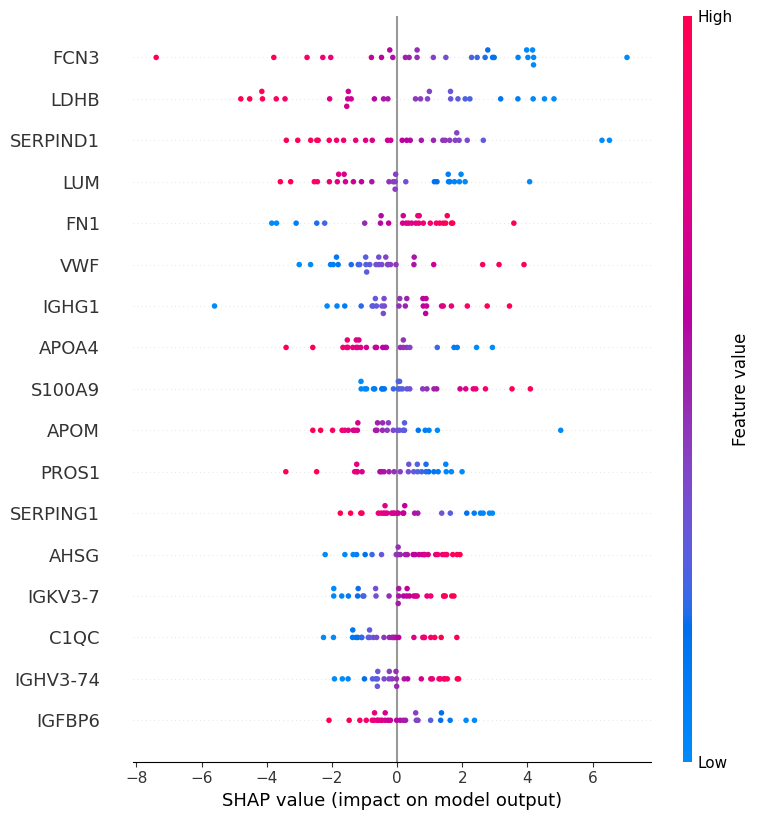

In [154]:
# shaply feature importance
import shap

X_train_df = pd.DataFrame(X_train, columns = topfeatures_identifiers)
X_test_df = pd.DataFrame(X_val, columns = topfeatures_identifiers)
y_test = y_val.copy()
# Generate the Tree SHAP estimator of Shapley values that corresponds to the LDA we built
explainer = shap.LinearExplainer(optimal_models[1], X_train_df)
# Compute the estimated Shapley values for the test sample's observations
shap_values = explainer.shap_values(X_test_df)

plt.figure(figsize=(6, 6))
shap.summary_plot(shap_values, X_test_df,max_display=17,show=False)

plt.savefig('../output_blood/shap_plot_blood_VM.svg', format = 'svg') #.png,.pdf will also support here

In [155]:
result_LDA = result_df.loc[result_df.model == 'LDA']
# mean
result_mean = pd.DataFrame(result_LDA.groupby('sample').probability.mean())
result_mean.reset_index(inplace = True)

result_LDA = pd.merge(result_mean,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)

result_other = pd.DataFrame(classifier.predict_proba(prepared_data.loc[prepared_data.index.get_level_values('_diagnosis').isin(['LNB','VM'])==False][topfeatures_identifiers].values)[:,1], columns = ['probability'])
result_other[['_sample','_study','_diagnosis']]= prepared_data.loc[prepared_data.index.get_level_values('_diagnosis').isin(['LNB','VM'])==False].reset_index()[['_sample','_study','_diagnosis']]

result_LDA = pd.concat([result_other[['_sample','_study','_diagnosis','probability']],result_LDA[['_sample','_study','_diagnosis','probability']]])

result_LDA.probability = 100*(1-result_LDA.probability)
result_LDA._diagnosis.value_counts()


_diagnosis
control    67
VM         37
LNB        37
PTLDS      17
EM          9
ACA         6
Name: count, dtype: int64

In [156]:
fig = px.box(result_LDA, x = 'probability', y = '_study', color = '_diagnosis', template = 'simple_white', points = 'all', width = 500, height = 500)
      #category_orders={"group": ["MIS-C Acute Stage",'MIS-C During Admission','MIS-C Full Recovery', 'Virus','Bacteria','Sepsis','Kawasaki']}, 
      #color_discrete_sequence=["rgb(57,105,172)", "rgb(47,138,196)","rgb(179,179,179)","rgb(217,175,107)", "rgb(175,100,88)","rgb(204,97,176)","rgb(118,78,159)"])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/LDA_blood_VM_proba_mean.svg',width = 500, height = 500)
fig.show()

# LNB vs control

In [157]:
combined_lst = gene_mapping_df.loc[gene_mapping_df.index.get_level_values('Entry').isin(diffs[1])]['Gene Names'].tolist()

prepared_data = ml_data[combined_lst]
prepared_data=zscore(prepared_data, axis = 1)
train_data = prepared_data.loc[(prepared_data.index.get_level_values('_study')=='plasma_development')&(prepared_data.index.get_level_values('_diagnosis').isin(['LNB','control']))]

no_cv = 3
X = train_data.values # all the protein columns
sample_lst = train_data.index.get_level_values('_sample').values
y = pd.Categorical(train_data.index.get_level_values('_diagnosis')).codes # control is 0, LNB is 1 or LNB 0 and VM 1
#X_train, X_test, y_train, y_test, samples_train, samples_test = train_test_split(X, y, train_data['sample'].tolist(), test_size=0.2, random_state=7, stratify=y)
X_train = X.copy()
y_train = y.copy()
sum(y_train)


48

In [158]:
ml_data.reset_index().groupby('_study')._diagnosis.value_counts()

_study              _diagnosis
plasma_development  control       48
                    LNB           27
                    VM            19
plasma_validation   control       19
                    VM            18
                    PTLDS         17
                    LNB           10
                    EM             9
                    ACA            6
Name: count, dtype: int64

In [159]:
val_data = prepared_data.loc[(prepared_data.index.get_level_values('_study')=='plasma_validation')&(prepared_data.index.get_level_values('_diagnosis').isin(['LNB','control']))]
X_val = val_data.values
y_val = pd.Categorical(val_data.index.get_level_values('_diagnosis')).codes
sum(y_val)

19

In [160]:
from itertools import compress
protein_cols = prepared_data.columns.tolist()#gene_mapping_df.loc[combined_lst]['Gene Names'].tolist()
# ML alg. selection
optimal_models = []
optimal_no_features = []
optimal_features = []
start_time = time.time()

dfs = []
metrics = []
to_plot = []   
fitted_models = []
    
for name, grid, estimator in models:
    print(name)
    # grid search
    selector = RandomizedSearchCV(estimator=estimator, param_distributions=grid, cv=StratifiedKFold(no_cv), scoring = 'f1_weighted', n_jobs = -1)
    clf = selector.fit(X_train,y_train)
    optimal_model = clf.best_estimator_
    optimal_models.append(optimal_model)
    # feature reduction
    if name in ['Naive Bayes','NNet', 'GP', 'QDA', 'KNN']: # skip rfecv for models not supported by importance
        optimal_no_features.append(len(protein_cols))
        optimal_features.append(protein_cols)
        print('skipping feature importance')
        X_reduced = X_train
        X_val_reduced = X_val
    else:
        selector = RFECV(optimal_model, cv=3, scoring='f1_weighted')
        selector = selector.fit(X_train, y_train)
        optimal_no_features.append(sum(selector.support_))
        optimal_features.append(list(compress(protein_cols, selector.support_)))
        print('optimal no features = {}'.format(sum(selector.support_)))
        X_reduced = X_train[:,selector.support_]
        X_val_reduced = X_val[:, selector.support_]
    
    # compute cv results
    print('computing predictions for: {}'.format(name))
    classifier = optimal_model
    mccs = []
    aucs = []
    fits = []
    mcc_val = []
    auc_val = []
                            
    # calculate performance during training
    cv = StratifiedKFold(n_splits=no_cv)
    for i, (train, test) in enumerate(cv.split(X_reduced, y_train)):
        print('cv: {}'.format(i+1))
        classifier.fit(X_reduced[train], y_train[train])
        
        fits.append(classifier)
        # predict for "test" set
        y_pred = classifier.predict(X_reduced[test])
        y_prob = classifier.predict_proba(X_reduced[test])[:,1]
        result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
        result.columns = ['observed','predicted','probability']
        result['cv']=i+1
        result['model']=name
        result['sample']=sample_lst[test]
        result['run']='test'
        dfs.append(result)
        mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
        aucs.append(round(roc_auc_score(result.observed,result.probability),2))
        # predict for validation sets
        y_pred = classifier.predict(X_val_reduced)
        y_prob = classifier.predict_proba(X_val_reduced)[:,1]
        result = pd.DataFrame([y_val, y_pred, y_prob]).T
        result.columns = ['observed','predicted','probability']
        result['cv']=i+1
        result['model']=name
        result['sample']=val_data.index.get_level_values('_sample').tolist()
        result['run']='val'
        dfs.append(result)  
        mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
        auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
        
    fitted_models.append(fits)
    #test
    metrics_results = pd.DataFrame(mccs)
    metrics_results.columns = ['MCC']
    metrics_results['AUROC']=aucs
    metrics_results['cv']=list(range(1,1+no_cv))
    metrics_results['model']=name
    metrics_results['run']='test'
    metrics.append(metrics_results)

    #val
    metrics_results = pd.DataFrame(mccs)
    metrics_results.columns = ['MCC']
    metrics_results['AUROC']=aucs
    metrics_results['cv']=list(range(1,1+no_cv))
    metrics_results['model']=name
    metrics_results['run']='val'
    metrics.append(metrics_results)
    
    mcc_mean = np.mean(mccs)
    mcc_std = np.std(mccs)
    auroc_mean = np.mean(aucs)
    auroc_std = np.std(aucs)
    to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
    print('MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
    
    print('\n{} model tested --- {} minutes ---\n'.format(name,round(((time.time() - start_time)/60),3)))


result_df = pd.concat(dfs)
metrics_df = pd.concat(metrics)


LR


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/p

optimal no features = 25
computing predictions for: LR
cv: 1
cv: 2
cv: 3
MCC: 0.8333333333333334, AUROC: 0.9700000000000001

LR model tested --- 0.139 minutes ---

LDA


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx80

optimal no features = 37
computing predictions for: LDA
cv: 1
cv: 2
cv: 3
MCC: 0.8000000000000002, AUROC: 0.9566666666666667

LDA model tested --- 0.154 minutes ---

KNN


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/l

skipping feature importance
computing predictions for: KNN
cv: 1
cv: 2
cv: 3
MCC: 0.7033333333333333, AUROC: 0.9033333333333333

KNN model tested --- 0.158 minutes ---

DT
optimal no features = 3
computing predictions for: DT
cv: 1
cv: 2
cv: 3
MCC: 0.5433333333333333, AUROC: 0.8166666666666668

DT model tested --- 0.167 minutes ---

Naive Bayes
skipping feature importance
computing predictions for: Naive Bayes
cv: 1
cv: 2
cv: 3
MCC: 0.6266666666666667, AUROC: 0.8933333333333334

Naive Bayes model tested --- 0.168 minutes ---

SVC


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



optimal no features = 55
computing predictions for: SVC
cv: 1
cv: 2
cv: 3
MCC: 0.8366666666666666, AUROC: 0.9533333333333333

SVC model tested --- 0.178 minutes ---

RF


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/base.py", line 600, in _validate_p

optimal no features = 36
computing predictions for: RF
cv: 1
cv: 2
cv: 3
MCC: 0.6433333333333333, AUROC: 0.8966666666666666

RF model tested --- 0.572 minutes ---

NNet
skipping feature importance
computing predictions for: NNet
cv: 1
cv: 2
cv: 3
MCC: 0.81, AUROC: 0.9333333333333332

NNet model tested --- 0.576 minutes ---

GP
skipping feature importance
computing predictions for: GP
cv: 1
cv: 2
cv: 3
MCC: 0.6866666666666666, AUROC: 0.9266666666666666

GP model tested --- 0.578 minutes ---

Adaboost


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.



optimal no features = 8
computing predictions for: Adaboost
cv: 1
cv: 2
cv: 3
MCC: 0.6833333333333332, AUROC: 0.9333333333333332

Adaboost model tested --- 0.802 minutes ---

QDA
skipping feature importance
computing predictions for: QDA
cv: 1
cv: 2


/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear

/Users/tzx804/opt/miniconda3/envs/gbm/lib/python3.9/site-pac

cv: 3
MCC: 0.006666666666666667, AUROC: 0.5033333333333333

QDA model tested --- 0.803 minutes ---

ensembleextratree
optimal no features = 18
computing predictions for: ensembleextratree
cv: 1
cv: 2
cv: 3
MCC: 0.71, AUROC: 0.9500000000000001

ensembleextratree model tested --- 1.078 minutes ---



In [161]:
for model in result_df.model.unique():
    result = result_df[(result_df.model == model)&(result_df.run == 'val')]
    print(model)
    print(round(matthews_corrcoef(result.observed, result.predicted),2))
    #print(round(roc_auc_score(result.observed,result.probability),2))

LR
0.41
LDA
0.11
KNN
0.11
DT
0.17
Naive Bayes
0.28
SVC
0.41
RF
-0.09
NNet
0.27
GP
0.19
Adaboost
0.23
QDA
0.11
ensembleextratree
0.12


In [ ]:
for model in result_df.model.unique():
    result = result_df[(result_df.model == model)&(result_df.run == 'val')]
    print(model)
    print(round(matthews_corrcoef(result.observed, result.predicted),2))
    #print(round(roc_auc_score(result.observed,result.probability),2))

LR
0.41
LDA
0.11
KNN
0.14
DT
-0.03
Naive Bayes
0.28
SVC
0.41
RF
-0.03
NNet
0.27
GP
0.19
Adaboost
0.23
QDA
0.11
ensembleextratree
0.12


In [162]:
plot_df = pd.DataFrame(to_plot)
plot_df.columns=['model','mcc_mean','mcc_std','auroc_mean','auroc_std']
plot_df = round(plot_df,2)
plot_df['no_features']=[len(x) for x in optimal_features]
plot_df['features']=optimal_features
plot_df = plot_df.sort_values('mcc_mean').reset_index(drop = True)
plot_df['model_n_features']= ['{} (no. proteins = {})'.format(plot_df.loc[i,'model'],plot_df.loc[i,'no_features']) for i in plot_df.index.tolist()]



In [163]:
from plotly.subplots import make_subplots
butterfly_plot(plot_df, var1 = 'mcc_mean', var2 = 'auroc_mean', var3 = 'no_features', error1 = 'mcc_std', error2 = 'auroc_std', name = 'blood_27_01_25_control', savesvg=True, group = 'model_n_features')


In [164]:
optimal_models[5]

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=7)

In [165]:
selector = RFECV(optimal_models[5], cv=3, scoring='f1_weighted')
selector = selector.fit(X_train, y_train)

print(f"Optimal number of features: {selector.n_features_}")


Optimal number of features: 55


In [166]:
error_max = selector.cv_results_['mean_test_score']+selector.cv_results_['std_test_score']
error_min = selector.cv_results_['mean_test_score']-selector.cv_results_['std_test_score']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.concatenate([list(range(1,len(protein_cols)+1)),list(range(1,len(protein_cols)+1))[::-1]]),
    y=np.concatenate([error_max, error_min[::-1]]),
    fill='toself', opacity=0.5, name = '1 std.'))
fig.add_trace(go.Scatter(x=list(range(1,len(protein_cols)+1)), y = selector.cv_results_['mean_test_score'],
                         name='Mean test score',line = dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x = [selector.n_features_,selector.n_features_], name = 'Optimal number of features: {}'.format(selector.n_features_), 
                         y=[0,1], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash')))

fig.update_layout(template='simple_white',
    autosize=False,
    width=800,
    height=500,
    title="RFECV for SVC classifier",
    xaxis_title="Number of features selected",
    yaxis_title="F1-weighted",
    legend_title="",
    #legend=dict(y=1.1, orientation='h'),
    legend_traceorder="reversed",
    xaxis_range=[0,X_train.shape[1]],
    yaxis_range = [0,max(error_max)])

fig.write_image('../output_blood/RFECV_SVC_LNB_control.pdf')
fig.show()

In [167]:
topfeatures_identifiers = list(compress(protein_cols, selector.support_))
print(topfeatures_identifiers)

['IGKV3D-20', 'IGHV3-64D', 'IGLC7', 'FCN3', 'F13A1', 'F2', 'HP', 'F9', 'PLG', 'SERPINA3', 'C3', 'C5', 'IGKV3-20', 'IGHV3-7', 'IGKC', 'IGHG1', 'IGHG4', 'FGA', 'APCS', 'C1QC', 'FN1', 'AHSG', 'TTR', 'TF', 'HPX', 'KLKB1', 'C4BPA', 'LCAT', 'VWF', 'S100A8', 'SERPINA5', 'SERPING1', 'SERPIND1', 'IGKV4-1', 'GSN', 'S100A9', 'LDHB', 'PROS1', 'PFN1', 'THBS1', 'C4A', 'LAMP2', 'SELL', 'PZP', 'IGFALS', 'ACTB', 'B2M', 'ITIH4', 'TGFBI', 'ECM1', 'CPB2', 'FETUB', 'IGKV2D-24', 'IGKV2-40', 'IGLC2']


In [168]:
X_train = zscore(X_train[:, selector.support_], axis = 1)
X_val = zscore(X_val[:, selector.support_], axis = 1)


In [169]:
extra_data = prepared_data.loc[(prepared_data.index.get_level_values('_diagnosis').isin(['LNB','control'])==False)][combined_lst]
X_extra = extra_data.values
X_extra = zscore(X_extra[:, selector.support_], axis = 1)
y_extra = [0]*X_extra.shape[0]

In [170]:
info.groupby('study_cohort').diagnosis.value_counts()

study_cohort        diagnosis
plasma_development  control      48
                    LNB          27
                    VM           19
plasma_validation   control      19
                    VM           18
                    PTLDS        17
                    LNB          10
                    EM            9
                    ACA           6
Name: count, dtype: int64

In [171]:
from sklearn.calibration import CalibratedClassifierCV

# compute cv results
print('computing predictions for: {}'.format(optimal_models[5]))
classifier = optimal_models[5]
#classifier = LogisticRegression(max_iter=5000, random_state=7, class_weight='balanced')

name = 'SVC'
mccs = []
aucs = []
fits = []
mcc_val = []
auc_val = []
dfs = []
                        
# calculate performance during training 
cv = StratifiedKFold(n_splits=3)
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    print('cv: {}'.format(i+1))
    classifier.fit(X_train[train], y_train[train])
    #calibrated = CalibratedClassifierCV(classifier, method='isotonic', cv='prefit')
    #calibrated.fit(X_train[train], y_train[train])
    #classifier = calibrated
    fits.append(classifier)
    # predict for "test" set
    y_pred = classifier.predict(X_train[test])
    y_prob = classifier.predict_proba(X_train[test])[:,1]
    result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=sample_lst[test]
    result['run']='test'
    dfs.append(result)
    mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    aucs.append(round(roc_auc_score(result.observed,result.probability),2))
    # predict for validation sets
    y_pred = classifier.predict(X_val)
    y_prob = classifier.predict_proba(X_val)[:,1]
    result = pd.DataFrame([y_val, y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=val_data.index.get_level_values('_sample').tolist()
    result['run']='val'
    dfs.append(result)  
    mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
    # predict for extra diagnoses
    y_pred = classifier.predict(X_extra)
    y_prob = classifier.predict_proba(X_extra)[:,1]
    result = pd.DataFrame([y_extra, y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=extra_data.index.get_level_values('_sample').tolist()
    result['run']='extra'
    dfs.append(result)  

mcc_mean = np.mean(mccs)
mcc_std = np.std(mccs)
auroc_mean = np.mean(aucs)
auroc_std = np.std(aucs)
to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
print('Test: MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))

result = pd.concat(dfs)


computing predictions for: SVC(class_weight='balanced', kernel='linear', probability=True, random_state=7)
cv: 1
cv: 2
cv: 3
Test: MCC: 0.8366666666666666, AUROC: 0.9566666666666667
Validation: MCC: 0.4766666666666666, AUROC: 0.7966666666666667


In [172]:
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))


Validation: MCC: 0.4766666666666666, AUROC: 0.7966666666666667


In [173]:
mcc_val

[0.52, 0.44, 0.47]

0.4720207456280114


/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_37804/1277182637.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



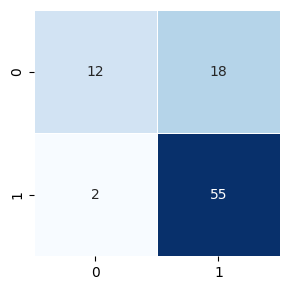

In [174]:
result_val = pd.merge(result.loc[result.run=='val'],ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample')
print(matthews_corrcoef(result_val.observed, result_val.predicted))

confusion_m = confusion_matrix(result_val.observed, result_val.predicted)
    
fig, ax = plt.subplots(figsize=(3,3))
s = sns.heatmap(confusion_m, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")#,
        #xticklabels=['Suspected LNB','LNB'], yticklabels=[diagnosis,'Suspected LNB'])
#s.set(xlabel="Predicted class", ylabel='Actual class')
#s.set(title = "Confusion Matrix {}".format(diagnosis))
fig.tight_layout()
fig.show()



In [175]:
fig = go.Figure()
# ROC for TEST
test_data = roc_data(result, model = "SVC", run = "test")
# output_order = test_data[0], test_data[1], test_data[2], test_data[3], test_data[4], auc_sd, ci_upper, ci_lower, mcc_mean, mcc_std
fig.add_trace(go.Scatter(
    x=np.concatenate([test_data[0],test_data[0][::-1]]),
    y=np.concatenate([test_data[2], test_data[3][::-1]]),
    fill='toself', opacity=0.5, name = 'std.'))
print('TEST auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]))
fig.add_trace(go.Scatter(x = test_data[0], name = 'TEST auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]), 
                         y=test_data[1], 
                         mode='lines', 
                         line=dict(color='grey', width=2, dash='dash')))
test_data = roc_data(result, model = "SVC", run = "val")
print('VAL auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]))
fig.add_trace(go.Scatter(x = test_data[0], name = 'VAL auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]), 
                         y=test_data[1], 
                         mode='lines', 
                         line=dict(color='green', width=2)))

fig.update_layout(template='simple_white',
    autosize=False,
    width=1000,
    height=500,
    title="AUROC for SVC classifier",
    xaxis_title="TPR",
    yaxis_title="FPR",
    legend_title="",
    legend_traceorder="reversed",
    xaxis_range=[0,1],
    yaxis_range = [0,1])
#fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_control_AUC.svg', width = 950)

fig.show()

TEST auc = 95.83 (std. = 3.0, ci = 104.96-86.7), mcc = 0.8347 (std. = 0.0084))
VAL auc = 79.65 (std. = 1.98, ci = 85.69-73.61), mcc = 0.4767 (std. = 0.0364))


/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_37804/4286984676.py:25: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_37804/4286984676.py:25: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.



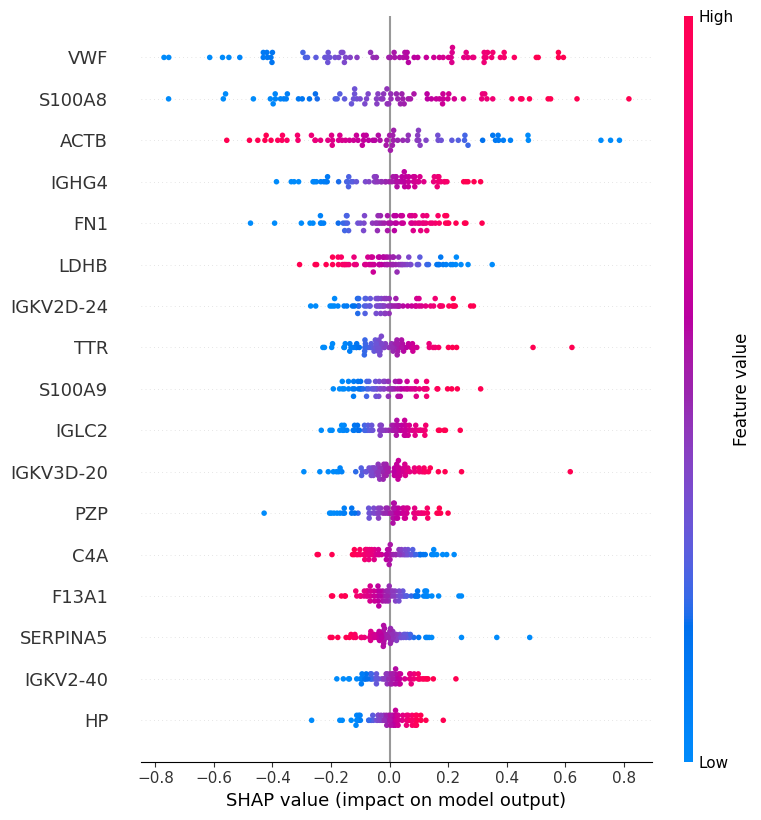

In [176]:
# shaply feature importance
import shap

X_train_df = pd.DataFrame(X_train, columns = topfeatures_identifiers)
X_test_df = pd.DataFrame(X_val, columns = topfeatures_identifiers)
#y_test = y_val.copy()
# Generate the Tree SHAP estimator of Shapley values that corresponds to the LDA we built
explainer = shap.LinearExplainer(optimal_models[5], X_train_df)
# Compute the estimated Shapley values for the test sample's observations
shap_values = explainer.shap_values(X_train_df)

plt.figure(figsize=(6, 6))
shap.summary_plot(shap_values, X_train_df,max_display=17,show=False)

#plt.savefig('../output_blood/shap_plot_blood_control.svg', format = 'svg') #.png,.pdf will also support here

plt.show()


In [177]:
prepared_data[topfeatures_identifiers].shape

(173, 55)

In [178]:
result_SVC = pd.merge(result,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)
result_SVC.head()

observed  predicted  probability  cv model   run           _sample  \
0       0.0        0.0     0.524646   1   SVC  test  plasma3524649866   
1       0.0        0.0     0.212953   1   SVC  test  plasma3524649882   
2       0.0        0.0     0.170719   1   SVC  test  plasma3524649873   
3       0.0        1.0     0.735466   1   SVC  test  plasma3524649112   
4       0.0        0.0     0.207555   1   SVC  test  plasma3524649842   

               _study _diagnosis  
0  plasma_development        LNB  
1  plasma_development        LNB  
2  plasma_development        LNB  
3  plasma_development        LNB  
4  plasma_development        LNB

In [179]:
result_SVC = pd.merge(result,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)
result_SVC.loc[result_SVC._diagnosis.isin(['LNB','control'])==False, '_study'] = 'other_diagnoses'
#result_SVC_mean = result_SVC.groupby(['_sample','_diagnosis','_study']).probability.mean().reset_index()
#result_SVC_mean['probability']=1-result_SVC_mean.probability
result_SVC['probability']=1-result_SVC.probability

fig = px.box(result_SVC, x = 'probability', y = '_study', color = '_diagnosis', template = 'simple_white', points = 'all', width = 500, height = 500,
      category_orders={"_study": ["plasma_development","plasma_validation"], "_diagnosis":['control','LNB','VM','PTLDS','EM','ACA']})
      #color_discrete_sequence=["rgb(57,105,172)", "rgb(47,138,196)","rgb(179,179,179)","rgb(217,175,107)", "rgb(175,100,88)","rgb(204,97,176)","rgb(118,78,159)"])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_control_proba.svg',width = 500, height = 500)
# for cohort in ['plasma_development','plasma_validation']:
#     print(cohort)
#     sub = result_SVC.loc[result_SVC._study == cohort]
#     print(matthews_corrcoef(sub.observed, sub.predicted))
#     print(roc_auc_score(sub.observed, sub.predicted))
#     print(confusion_matrix(sub.observed, sub.predicted))
fig.show()

In [180]:
sub = result_SVC.loc[(result_SVC._diagnosis.isin(['LNB','control']))&(result_SVC._study == 'plasma_validation')]
matthews_corrcoef(sub.observed, sub.predicted)

0.4720207456280114

/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_37804/4216879432.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_37804/4216879432.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



ValueError: zero-size array to reduction operation fmin which has no identity

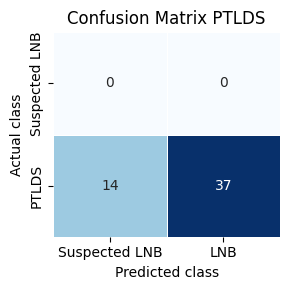

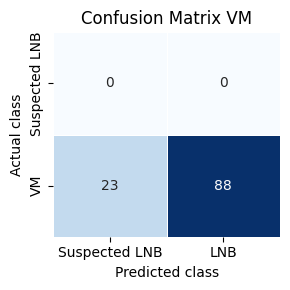

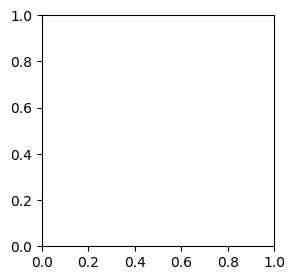

In [181]:
for diagnosis in ['PTLDS','VM','LNB','EM','ACA']:
    sub = result_SVC.loc[(result_SVC._diagnosis == diagnosis)&(result_SVC._study == 'other_diagnoses')]
    sub['predicted'] = sub.probability.apply(lambda x: 'LNB' if x>=0.5 else 'Suspected LNB')
    sub['observed'] = sub._diagnosis.apply(lambda x: 'LNB' if x=='LNB' else 'Suspected LNB')
    confusion_m = confusion_matrix(sub.observed, sub.predicted)
    
    fig, ax = plt.subplots(figsize=(3,3))
    s = sns.heatmap(confusion_m, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues",
            xticklabels=['Suspected LNB','LNB'], yticklabels=['Suspected LNB',diagnosis])
    s.set(xlabel="Predicted class", ylabel='Actual class')
    s.set(title = "Confusion Matrix {}".format(diagnosis))
    fig.tight_layout()
    fig.show()
    #fig.savefig('/Users/tzx804/projects/collaborations/nicolai/misc/sepsis/output/test_confusion_pride.pdf')
    # 


In [183]:
result_SVC._study.value_counts()

_study
other_diagnoses       207
plasma_validation      87
plasma_development     75
Name: count, dtype: int64

In [194]:
# Plot using Plotly Express
fig = px.violin(result_SVC[result_SVC._study == 'other_diagnoses'], x = 'probability', y = '_diagnosis', color = '_diagnosis', template = 'simple_white', height = 700, width = 500)

# Customize the layout to resemble the initial design
fig.update_traces(orientation='h', side='positive', width=1, points='all')
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.write_image('../output_blood/other_diagnoses.svg',width = 500, height = 700)
fig.show()

In [246]:
df = result_SVC[result_SVC._study == 'other_diagnoses']

from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Create a new column combining ACA + EM vs PTLDS + VM
df['combined_group'] = df['_diagnosis'].apply(lambda x: 'ACA+EM' if x in ['ACA', 'EM'] else 'PTLDS+VM')

# Perform Mann-Whitney U test between the two combined groups (ACA+EM vs PTLDS+VM)
group1 = df[df['combined_group'] == 'ACA+EM']['probability']
group2 = df[df['combined_group'] == 'PTLDS+VM']['probability']

# Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U Test (ACA+EM vs PTLDS+VM): Statistic = {stat}, p-value = {p_value}")

# Now perform pairwise comparisons between individual diagnostic groups (ACA, EM, PTLDS, VM)
groups = df['_diagnosis'].unique()
p_values = []
comparisons = []

# Perform Mann-Whitney U for each pair
for i, g1 in enumerate(groups):
    for j, g2 in enumerate(groups):
        if i < j:  # Avoid duplicate comparisons
            group1 = df[df['_diagnosis'] == g1]['probability']
            group2 = df[df['_diagnosis'] == g2]['probability']
            stat, p = mannwhitneyu(group1, group2)
            p_values.append(p)
            comparisons.append(f"{g1} vs {g2}")

# Adjust p-values for multiple comparisons using Bonferroni correction
adjusted_p = multipletests(p_values, method='bonferroni')[1]

# Display results
for comp, p in zip(comparisons, adjusted_p):
    print(f"{comp}: Adjusted p-value = {p}")

Mann-Whitney U Test (ACA+EM vs PTLDS+VM): Statistic = 5475.0, p-value = 2.651272395106292e-07
ACA vs EM: Adjusted p-value = 1.0
ACA vs PTLDS: Adjusted p-value = 0.12325982098306187
ACA vs VM: Adjusted p-value = 0.010486705195013837
EM vs PTLDS: Adjusted p-value = 0.0104930021816829
EM vs VM: Adjusted p-value = 8.175877739045348e-06
PTLDS vs VM: Adjusted p-value = 1.0


In [193]:
fig = px.histogram(result_SVC[result_SVC._study == 'other_diagnoses'], x="probability", color="_diagnosis",
                   barmode = 'overlay',nbins = 40, template = 'plotly_white', width = 500,
                  facet_col='_diagnosis', facet_col_wrap = 1, 
                  category_orders={#"_study": ["plasma_development","plasma_validation"], 
                                   "_diagnosis":['PTLDS','VM','EM','ACA']})
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))
fig.show()

In [1200]:
fig = px.histogram(result_SVC, x="probability", color="_diagnosis",
                   barmode = 'overlay',nbins = 40, template = 'plotly_white', width = 500, height = 1500,
                  facet_col='_diagnosis', facet_col_wrap = 1, 
                  category_orders={"_study": ["plasma_development","plasma_validation"], "_diagnosis":['control','PTLDS','VM','LNB','EM','ACA']})
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))
fig.show()

probability       _sample             _study _diagnosis
0     0.188407  plasma102736  plasma_validation         VM
1     0.201260  plasma103227  plasma_validation         VM
2     0.175697  plasma103378  plasma_validation         VM
3     0.610650  plasma104244  plasma_validation         VM
4     0.563272  plasma104936  plasma_validation         VM

In [601]:
#result_SVC = pd.merge(result,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)
result_mean = pd.DataFrame(result.groupby('sample')[['observed','probability']].mean())
result_mean.reset_index(inplace = True)
# determine threshold:
y_proba = result_SVC.loc[result_SVC._study == 'plasma_development'].probability.values
y_test = result_SVC.loc[result_SVC._study == 'plasma_development'].observed.values
best_threshold = 0
best_f1 = 0
# Test various thresholds from 0 to 1
for threshold in np.arange(0.0, 1.0, 0.01):
    y_pred_custom = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f'Best threshold: {best_threshold}, Best F1-score: {best_f1}')

result_mean['predicted'] = result_mean['probability'].apply(lambda x: 1 if x > best_threshold else 0)
result_SVC = pd.merge(result_mean,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)
fig = px.box(result_SVC, x = 'probability', y = '_study', color = '_diagnosis', template = 'simple_white', points = 'all', width = 500, height = 500)
      #category_orders={"group": ["MIS-C Acute Stage",'MIS-C During Admission','MIS-C Full Recovery', 'Virus','Bacteria','Sepsis','Kawasaki']}, 
      #color_discrete_sequence=["rgb(57,105,172)", "rgb(47,138,196)","rgb(179,179,179)","rgb(217,175,107)", "rgb(175,100,88)","rgb(204,97,176)","rgb(118,78,159)"])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_control_proba_mean.svg',width = 500, height = 500)
for cohort in ['plasma_development','plasma_validation']:
    print(cohort)
    sub = result_SVC.loc[result_SVC._study == cohort]
    print(matthews_corrcoef(sub.observed, sub.predicted))
    print(roc_auc_score(sub.observed, sub.predicted))
    print(confusion_matrix(sub.observed, sub.predicted))
fig.show()

Best threshold: 0.52, Best F1-score: 0.9473684210526315
plasma_development
0.8568398196443721
0.9317129629629629
[[25  2]
 [ 3 45]]
plasma_validation
0.43709567783146447
0.6736842105263158
[[ 4  6]
 [ 1 18]]


In [593]:
result_SVC

observed  predicted  probability  cv model   run           _sample  \
0         0.0        0.0     0.570137   1   SVC  test  plasma3524649866   
1         0.0        0.0     0.198337   1   SVC  test  plasma3524649882   
2         0.0        0.0     0.175063   1   SVC  test  plasma3524649873   
3         0.0        1.0     0.752431   1   SVC  test  plasma3524649112   
4         0.0        0.0     0.222059   1   SVC  test  plasma3524649842   
..        ...        ...          ...  ..   ...   ...               ...   
157       1.0        1.0     0.846295   3   SVC  test      plasma146784   
158       1.0        1.0     0.966496   3   SVC  test      plasma146835   
159       1.0        1.0     0.952319   3   SVC  test      plasma146841   
160       1.0        1.0     0.849092   3   SVC  test  plasma3524649664   
161       1.0        1.0     0.963077   3   SVC  test      plasma146848   

                 _study _diagnosis  
0    plasma_development        LNB  
1    plasma_development        LNB  
2    plasma_development        LNB  
3    plasma_development        LNB  
4    plasma_development        LNB  
..                  ...        ...  
157  plasma_development    control  
158  plasma_development    control  
159  plasma_development    control  
160  plasma_development    control  
161  plasma_development    control  

[162 rows x 9 columns]

In [599]:
result_SVC = result_df.loc[result_df.model == 'SVC']
result_SVC = pd.merge(result_SVC,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)

result_SVC

observed  predicted  probability  cv model   run           _sample  \
0         0.0        0.0     0.570137   1   SVC  test  plasma3524649866   
1         0.0        0.0     0.198337   1   SVC  test  plasma3524649882   
2         0.0        0.0     0.175063   1   SVC  test  plasma3524649873   
3         0.0        1.0     0.752431   1   SVC  test  plasma3524649112   
4         0.0        0.0     0.222059   1   SVC  test  plasma3524649842   
..        ...        ...          ...  ..   ...   ...               ...   
157       1.0        1.0     0.846295   3   SVC  test      plasma146784   
158       1.0        1.0     0.966496   3   SVC  test      plasma146835   
159       1.0        1.0     0.952319   3   SVC  test      plasma146841   
160       1.0        1.0     0.849092   3   SVC  test  plasma3524649664   
161       1.0        1.0     0.963077   3   SVC  test      plasma146848   

                 _study _diagnosis  
0    plasma_development        LNB  
1    plasma_development        LNB  
2    plasma_development        LNB  
3    plasma_development        LNB  
4    plasma_development        LNB  
..                  ...        ...  
157  plasma_development    control  
158  plasma_development    control  
159  plasma_development    control  
160  plasma_development    control  
161  plasma_development    control  

[162 rows x 9 columns]

In [598]:
result_SVC = result_df.loc[result_df.model == 'SVC']
result_SVC = pd.merge(result_SVC,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)

result_mean = pd.DataFrame(result_SVC.groupby('_sample')[['observed','probability']].mean())
result_mean.reset_index(inplace = True)
# determine threshold:
y_proba = result_SVC.loc[result_SVC._study == 'plasma_development'].probability.values
y_test = result_SVC.loc[result_SVC._study == 'plasma_development'].observed.values
best_threshold = 0
best_f1 = 0                                                                                                                     

# Test various thresholds from 0 to 1
for threshold in np.arange(0.0, 1.0, 0.01):
    y_pred_custom = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f'Best threshold: {best_threshold}, Best F1-score: {best_f1}')

result_mean['predicted'] = result_mean['probability'].apply(lambda x: 1 if x > best_threshold else 0)
result_SVC = pd.merge(result_mean,ml_data.reset_index()[['_sample','_study','_diagnosis']], on = '_sample')#.drop('_sample', axis = 1)
fig = px.box(result_SVC, x = 'probability', y = '_study', color = '_diagnosis', template = 'simple_white', points = 'all', width = 500, height = 500)
      #category_orders={"group": ["MIS-C Acute Stage",'MIS-C During Admission','MIS-C Full Recovery', 'Virus','Bacteria','Sepsis','Kawasaki']}, 
      #color_discrete_sequence=["rgb(57,105,172)", "rgb(47,138,196)","rgb(179,179,179)","rgb(217,175,107)", "rgb(175,100,88)","rgb(204,97,176)","rgb(118,78,159)"])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_control_proba_mean.svg',width = 500, height = 500)
for cohort in ['plasma_development','plasma_validation']:
    print(cohort)
    sub = result_SVC.loc[result_SVC._study == cohort]
    print(matthews_corrcoef(sub.observed, sub.predicted))
    print(roc_auc_score(sub.observed, sub.predicted))
    print(confusion_matrix(sub.observed, sub.predicted))
fig.show()
result_SVC = pd.merge(result_SVC,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)
fig = px.box(result_SVC, x = 'probability', y = '_study', color = '_diagnosis', template = 'simple_white', points = 'all', width = 500, height = 500)
      #category_orders={"group": ["MIS-C Acute Stage",'MIS-C During Admission','MIS-C Full Recovery', 'Virus','Bacteria','Sepsis','Kawasaki']}, 
      #color_discrete_sequence=["rgb(57,105,172)", "rgb(47,138,196)","rgb(179,179,179)","rgb(217,175,107)", "rgb(175,100,88)","rgb(204,97,176)","rgb(118,78,159)"])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_control_proba_mean.svg',width = 500, height = 500)
fig.show()

Best threshold: 0.58, Best F1-score: 0.9263157894736843
plasma_development
0.7994108773089583
0.9027777777777777
[[24  3]
 [ 4 44]]
plasma_validation
0.5513619500836088
0.7
[[ 4  6]
 [ 0 19]]


KeyError: 'sample'

In [ ]:
combined_lst = gene_mapping_df.loc[gene_mapping_df.index.get_level_values('Entry').isin(diffs[1])]['Gene Names'].tolist()

prepared_data = ml_data[combined_lst]
prepared_data=zscore(prepared_data, axis = 1)
train_data = prepared_data.loc[(prepared_data.index.get_level_values('_study')=='plasma_development')&(prepared_data.index.get_level_values('_diagnosis').isin(['LNB','control']))]

no_cv = 3
X = train_data.values # all the protein columns
sample_lst = train_data.index.get_level_values('_sample').values
y = pd.Categorical(train_data.index.get_level_values('_diagnosis')).codes # control is 0, LNB is 1 or LNB 0 and VM 1
#X_train, X_test, y_train, y_test, samples_train, samples_test = train_test_split(X, y, train_data['sample'].tolist(), test_size=0.2, random_state=7, stratify=y)
X_train = X.copy()
y_train = y.copy()
sum(y_train)


48

In [ ]:
ml_data.reset_index().groupby('_study')._diagnosis.value_counts()

_study              _diagnosis
plasma_development  control       48
                    LNB           27
                    VM            19
plasma_validation   control       19
                    VM            18
                    PTLDS         17
                    LNB           10
                    EM             9
                    ACA            6
Name: count, dtype: int64

In [ ]:
val_data = prepared_data.loc[(prepared_data.index.get_level_values('_study')=='plasma_validation')&(prepared_data.index.get_level_values('_diagnosis').isin(['LNB','control']))]
X_val = val_data.values
y_val = pd.Categorical(val_data.index.get_level_values('_diagnosis')).codes
sum(y_val)

19

In [ ]:
from itertools import compress
protein_cols = prepared_data.columns.tolist()#gene_mapping_df.loc[combined_lst]['Gene Names'].tolist()
# ML alg. selection
optimal_models = []
optimal_no_features = []
optimal_features = []
start_time = time.time()

dfs = []
metrics = []
to_plot = []   
fitted_models = []
    
for name, grid, estimator in models:
    print(name)
    # grid search
    selector = RandomizedSearchCV(estimator=estimator, param_distributions=grid, cv=StratifiedKFold(no_cv), scoring = 'f1_weighted', n_jobs = -1)
    clf = selector.fit(X_train,y_train)
    optimal_model = clf.best_estimator_
    optimal_models.append(optimal_model)
    # feature reduction
    if name in ['Naive Bayes','NNet', 'GP', 'QDA', 'KNN']: # skip rfecv for models not supported by importance
        optimal_no_features.append(len(protein_cols))
        optimal_features.append(protein_cols)
        print('skipping feature importance')
        X_reduced = X_train
        X_val_reduced = X_val
    else:
        selector = RFECV(optimal_model, cv=3, scoring='f1_weighted')
        selector = selector.fit(X_train, y_train)
        optimal_no_features.append(sum(selector.support_))
        optimal_features.append(list(compress(protein_cols, selector.support_)))
        print('optimal no features = {}'.format(sum(selector.support_)))
        X_reduced = X_train[:,selector.support_]
        X_val_reduced = X_val[:, selector.support_]
    
    # compute cv results
    print('computing predictions for: {}'.format(name))
    classifier = optimal_model
    mccs = []
    aucs = []
    fits = []
    mcc_val = []
    auc_val = []
                            
    # calculate performance during training
    cv = StratifiedKFold(n_splits=no_cv)
    for i, (train, test) in enumerate(cv.split(X_reduced, y_train)):
        print('cv: {}'.format(i+1))
        classifier.fit(X_reduced[train], y_train[train])
        
        fits.append(classifier)
        # predict for "test" set
        y_pred = classifier.predict(X_reduced[test])
        y_prob = classifier.predict_proba(X_reduced[test])[:,1]
        result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
        result.columns = ['observed','predicted','probability']
        result['cv']=i+1
        result['model']=name
        result['sample']=sample_lst[test]
        result['run']='test'
        dfs.append(result)
        mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
        aucs.append(round(roc_auc_score(result.observed,result.probability),2))
        # predict for validation sets
        y_pred = classifier.predict(X_val_reduced)
        y_prob = classifier.predict_proba(X_val_reduced)[:,1]
        result = pd.DataFrame([y_val, y_pred, y_prob]).T
        result.columns = ['observed','predicted','probability']
        result['cv']=i+1
        result['model']=name
        result['sample']=val_data.index.get_level_values('_sample').tolist()
        result['run']='val'
        dfs.append(result)  
        mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
        auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
        
    fitted_models.append(fits)
    #test
    metrics_results = pd.DataFrame(mccs)
    metrics_results.columns = ['MCC']
    metrics_results['AUROC']=aucs
    metrics_results['cv']=list(range(1,1+no_cv))
    metrics_results['model']=name
    metrics_results['run']='test'
    metrics.append(metrics_results)

    #val
    metrics_results = pd.DataFrame(mccs)
    metrics_results.columns = ['MCC']
    metrics_results['AUROC']=aucs
    metrics_results['cv']=list(range(1,1+no_cv))
    metrics_results['model']=name
    metrics_results['run']='val'
    metrics.append(metrics_results)
    
    mcc_mean = np.mean(mccs)
    mcc_std = np.std(mccs)
    auroc_mean = np.mean(aucs)
    auroc_std = np.std(aucs)
    to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
    print('MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
    
    print('\n{} model tested --- {} minutes ---\n'.format(name,round(((time.time() - start_time)/60),3)))


result_df = pd.concat(dfs)
metrics_df = pd.concat(metrics)


LR


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/Users/tzx

optimal no features = 25
computing predictions for: LR
cv: 1
cv: 2
cv: 3
MCC: 0.8333333333333334, AUROC: 0.9700000000000001

LR model tested --- 0.142 minutes ---

LDA


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, *

optimal no features = 37
computing predictions for: LDA
cv: 1
cv: 2
cv: 3
MCC: 0.8000000000000002, AUROC: 0.9566666666666667

LDA model tested --- 0.158 minutes ---

KNN
skipping feature importance
computing predictions for: KNN
cv: 1


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **

cv: 2
cv: 3
MCC: 0.7000000000000001, AUROC: 0.91

KNN model tested --- 0.161 minutes ---

DT
optimal no features = 2
computing predictions for: DT
cv: 1
cv: 2
cv: 3
MCC: 0.58, AUROC: 0.8666666666666667

DT model tested --- 0.171 minutes ---

Naive Bayes
skipping feature importance
computing predictions for: Naive Bayes
cv: 1
cv: 2
cv: 3
MCC: 0.6266666666666667, AUROC: 0.8933333333333334

Naive Bayes model tested --- 0.171 minutes ---

SVC


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



optimal no features = 55
computing predictions for: SVC
cv: 1
cv: 2
cv: 3
MCC: 0.8366666666666666, AUROC: 0.9533333333333333

SVC model tested --- 0.18 minutes ---

RF
optimal no features = 5
computing predictions for: RF
cv: 1
cv: 2
cv: 3
MCC: 0.7166666666666667, AUROC: 0.9500000000000001

RF model tested --- 0.726 minutes ---

NNet
skipping feature importance
computing predictions for: NNet
cv: 1
cv: 2
cv: 3
MCC: 0.75, AUROC: 0.9199999999999999

NNet model tested --- 0.735 minutes ---

GP
skipping feature importance
computing predictions for: GP
cv: 1
cv: 2
cv: 3
MCC: 0.6866666666666666, AUROC: 0.9266666666666666

GP model tested --- 0.737 minutes ---

Adaboost


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.



optimal no features = 8
computing predictions for: Adaboost
cv: 1
cv: 2
cv: 3
MCC: 0.6833333333333332, AUROC: 0.9333333333333332

Adaboost model tested --- 0.994 minutes ---

QDA
skipping feature importance
computing predictions for: QDA
cv: 1
cv: 2
cv: 3
MCC: 0.006666666666666667, AUROC: 0.5033333333333333

QDA model tested --- 0.994 minutes ---

ensembleextratree


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear

/User

optimal no features = 18
computing predictions for: ensembleextratree
cv: 1
cv: 2
cv: 3
MCC: 0.71, AUROC: 0.9500000000000001

ensembleextratree model tested --- 1.313 minutes ---



In [ ]:
plot_df = pd.DataFrame(to_plot)
plot_df.columns=['model','mcc_mean','mcc_std','auroc_mean','auroc_std']
plot_df = round(plot_df,2)
plot_df['no_features']=[len(x) for x in optimal_features]
plot_df['features']=optimal_features
plot_df = plot_df.sort_values('mcc_mean').reset_index(drop = True)
plot_df['model_n_features']= ['{} (no. proteins = {})'.format(plot_df.loc[i,'model'],plot_df.loc[i,'no_features']) for i in plot_df.index.tolist()]



In [ ]:
from plotly.subplots import make_subplots
butterfly_plot(plot_df, var1 = 'mcc_mean', var2 = 'auroc_mean', var3 = 'no_features', error1 = 'mcc_std', error2 = 'auroc_std', name = 'blood_17_10_24_control', savepdf=False, group = 'model_n_features')


In [ ]:
optimal_models[5]

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=7)

In [ ]:
selector = RFECV(optimal_models[5], cv=3, scoring='f1_weighted')
selector = selector.fit(X_train, y_train)

print(f"Optimal number of features: {selector.n_features_}")


Optimal number of features: 55


In [ ]:
error_max = selector.cv_results_['mean_test_score']+selector.cv_results_['std_test_score']
error_min = selector.cv_results_['mean_test_score']-selector.cv_results_['std_test_score']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.concatenate([list(range(1,len(protein_cols)+1)),list(range(1,len(protein_cols)+1))[::-1]]),
    y=np.concatenate([error_max, error_min[::-1]]),
    fill='toself', opacity=0.5, name = '1 std.'))
fig.add_trace(go.Scatter(x=list(range(1,len(protein_cols)+1)), y = selector.cv_results_['mean_test_score'],
                         name='Mean test score',line = dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x = [selector.n_features_,selector.n_features_], name = 'Optimal number of features: {}'.format(selector.n_features_), 
                         y=[0,1], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash')))

fig.update_layout(template='simple_white',
    autosize=False,
    width=800,
    height=500,
    title="RFECV for SVC classifier",
    xaxis_title="Number of features selected",
    yaxis_title="F1-weighted",
    legend_title="",
    #legend=dict(y=1.1, orientation='h'),
    legend_traceorder="reversed",
    xaxis_range=[0,X_train.shape[1]],
    yaxis_range = [0,max(error_max)])

#fig.write_image('/Users/tzx804/projects/collaborations/nicolai/misc/sepsis/output/RFECV_SVC.pdf')
fig.show()

In [ ]:
topfeatures_identifiers = list(compress(protein_cols, selector.support_))
print(topfeatures_identifiers)

['IGKV3D-20', 'IGHV3-64D', 'IGLC7', 'FCN3', 'F13A1', 'F2', 'HP', 'F9', 'PLG', 'SERPINA3', 'C3', 'C5', 'IGKV3-20', 'IGHV3-7', 'IGKC', 'IGHG1', 'IGHG4', 'FGA', 'APCS', 'C1QC', 'FN1', 'AHSG', 'TTR', 'TF', 'HPX', 'KLKB1', 'C4BPA', 'LCAT', 'VWF', 'S100A8', 'SERPINA5', 'SERPING1', 'SERPIND1', 'IGKV4-1', 'GSN', 'S100A9', 'LDHB', 'PROS1', 'PFN1', 'THBS1', 'C4A', 'LAMP2', 'SELL', 'PZP', 'IGFALS', 'ACTB', 'B2M', 'ITIH4', 'TGFBI', 'ECM1', 'CPB2', 'FETUB', 'IGKV2D-24', 'IGKV2-40', 'IGLC2']


In [ ]:
X_train = X_train[:, selector.support_]
X_val = X_val[:, selector.support_]


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# compute cv results
print('computing predictions for: {}'.format(optimal_models[5]))
classifier = optimal_models[5]
name = 'SVC'
mccs = []
aucs = []
fits = []
mcc_val = []
auc_val = []
dfs = []
                        
# calculate performance during training 
cv = StratifiedKFold(n_splits=3, n_repeats=1, random_state=7)
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    print('cv: {}'.format(i+1))
    classifier.fit(X_train[train], y_train[train])
    calibrated = CalibratedClassifierCV(classifier, method='isotonic', cv=10)
    calibrated.fit(X_train[train], y_train[train])
    classifier = calibrated
    fits.append(classifier)
    # predict for "test" set
    y_pred = classifier.predict(X_train[test])
    y_prob = classifier.predict_proba(X_train[test])[:,1]
    result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=sample_lst[test]
    result['run']='test'
    dfs.append(result)
    mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    aucs.append(round(roc_auc_score(result.observed,result.probability),2))
    # predict for validation sets
    y_pred = classifier.predict(X_val)
    y_prob = classifier.predict_proba(X_val)[:,1]
    result = pd.DataFrame([y_val, y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=val_data.index.get_level_values('_sample').tolist()
    result['run']='val'
    dfs.append(result)  
    mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
    
mcc_mean = np.mean(mccs)
mcc_std = np.std(mccs)
auroc_mean = np.mean(aucs)
auroc_std = np.std(aucs)
to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
print('Test: MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))

result = pd.concat(dfs)


computing predictions for: SVC(class_weight='balanced', kernel='linear', probability=True, random_state=7)
cv: 1
cv: 2
cv: 3
Test: MCC: 0.84, AUROC: 0.9733333333333333
Validation: MCC: 0.43333333333333335, AUROC: 0.7766666666666667


In [ ]:
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))


Validation: MCC: 0.43333333333333335, AUROC: 0.7766666666666667


In [ ]:
import scipy.stats as st

def roc_data(df, model, run):
    svc_test = df.loc[(df.model == model)&(df.run == run)]
    fpr_mean = np.linspace(0, 1, 100)
    interp_tprs = []
    aucs = []
    mccs = []
    for cv in list(range(1,3+1)):
        svc_sub = svc_test.loc[svc_test.cv == cv]
        fpr, tpr, thresholds = roc_curve(svc_sub.observed, svc_sub.probability, drop_intermediate=False)
        interp_tpr = np.interp(fpr_mean, fpr, tpr)
        interp_tpr[0] = 0.0
        interp_tprs.append(interp_tpr)
        aucs.append(roc_auc_score(svc_sub.observed, svc_sub.probability))
        mccs.append(matthews_corrcoef(svc_sub.observed, svc_sub.predicted))
        #print(roc_auc_score(svc_sub.observed, svc_sub.probability))
    tpr_mean     = np.mean(interp_tprs, axis=0)
    tpr_mean[-1] = 1.0
    tpr_std      = np.round(np.std(interp_tprs, axis=0),4)
    tpr_upper    = tpr_mean+tpr_std
    tpr_lower    = tpr_mean-tpr_std
    auc_mean = np.round(np.mean(aucs)*100,2)
    auc_sd = np.round(np.std(aucs)*100,2)
    ci_lower, ci_upper = np.round([100*x for x in st.t.interval(alpha=0.95, df=len(aucs)-1,loc=np.mean(aucs),scale=st.sem(aucs))],2)
    
    mcc_mean = np.round(np.mean(mccs),4)
    mcc_sd = np.round(np.std(mccs),4)
    
    return(fpr_mean, tpr_mean, tpr_upper, tpr_lower, auc_mean, auc_sd, ci_upper, ci_lower, mcc_mean, mcc_sd)

In [ ]:
fig = go.Figure()
# ROC for TEST
test_data = roc_data(result_df, model = "SVC", run = "test")
# output_order = test_data[0], test_data[1], test_data[2], test_data[3], test_data[4], auc_sd, ci_upper, ci_lower, mcc_mean, mcc_std
fig.add_trace(go.Scatter(
    x=np.concatenate([test_data[0],test_data[0][::-1]]),
    y=np.concatenate([test_data[2], test_data[3][::-1]]),
    fill='toself', opacity=0.5, name = 'std.'))
print('TEST auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]))
fig.add_trace(go.Scatter(x = test_data[0], name = 'TEST auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]), 
                         y=test_data[1], 
                         mode='lines', 
                         line=dict(color='grey', width=2, dash='dash')))
test_data = roc_data(result_df, model = "SVC", run = "val")
print('VAL auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]))
fig.add_trace(go.Scatter(x = test_data[0], name = 'VAL auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]), 
                         y=test_data[1], 
                         mode='lines', 
                         line=dict(color='green', width=2)))

fig.update_layout(template='simple_white',
    autosize=False,
    width=1000,
    height=500,
    title="AUROC for SVC classifier",
    xaxis_title="TPR",
    yaxis_title="FPR",
    legend_title="",
    legend_traceorder="reversed",
    xaxis_range=[0,1],
    yaxis_range = [0,1])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_control_AUC.pdf', width = 850)

fig.show()

TEST auc = 95.6 (std. = 2.68, ci = 103.75-87.45), mcc = 0.8347 (std. = 0.0084))
VAL auc = 78.95 (std. = 2.82, ci = 87.52-70.37), mcc = 0.4154 (std. = 0.0542))


/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_39641/4286984676.py:25: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_39641/4286984676.py:25: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.



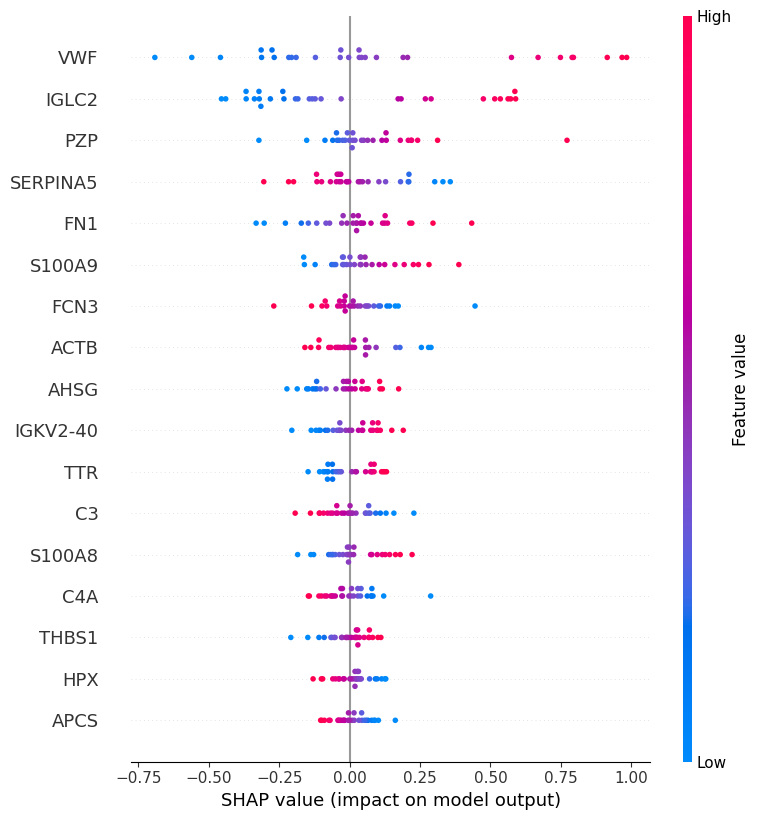

In [ ]:
# shaply feature importance
import shap

X_train_df = pd.DataFrame(X_train, columns = topfeatures_identifiers)
X_test_df = pd.DataFrame(X_val, columns = topfeatures_identifiers)
y_test = y_val.copy()
# Generate the Tree SHAP estimator of Shapley values that corresponds to the LDA we built
explainer = shap.LinearExplainer(optimal_models[5], X_train_df)
# Compute the estimated Shapley values for the test sample's observations
shap_values = explainer.shap_values(X_test_df)

plt.figure(figsize=(6, 6))
shap.summary_plot(shap_values, X_test_df,max_display=17,show=False)

plt.savefig('../output_blood/shap_plot_blood_control.svg', format = 'svg') #.png,.pdf will also support here

plt.show()


In [ ]:
result_SVC = result_df.loc[result_df.model == 'SVC']
# mean
result_mean = pd.DataFrame(result_SVC.groupby('sample').probability.mean())
result_mean.reset_index(inplace = True)

result_SVC = pd.merge(result_mean,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)

result_other = pd.DataFrame(classifier.predict_proba(prepared_data.loc[prepared_data.index.get_level_values('_diagnosis').isin(['LNB','control'])==False][topfeatures_identifiers].values)[:,1], columns = ['probability'])
result_other[['_sample','_study','_diagnosis']]= prepared_data.loc[prepared_data.index.get_level_values('_diagnosis').isin(['LNB','control'])==False].reset_index()[['_sample','_study','_diagnosis']]

result_SVC = pd.concat([result_other[['_sample','_study','_diagnosis','probability']],result_SVC[['_sample','_study','_diagnosis','probability']]])

result_SVC.probability = 100*(1-result_SVC.probability)
result_SVC._diagnosis.value_counts()


_diagnosis
control    67
VM         37
LNB        37
PTLDS      17
EM          9
ACA         6
Name: count, dtype: int64

In [ ]:
result_SVC = result_df.loc[result_df.model == 'SVC']
result_SVC = pd.merge(result_SVC,ml_data.reset_index()[['_sample','_study','_diagnosis']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)
fig = px.box(result_SVC, x = 'probability', y = '_study', color = '_diagnosis', template = 'simple_white', points = 'all', width = 500, height = 500)
      #category_orders={"group": ["MIS-C Acute Stage",'MIS-C During Admission','MIS-C Full Recovery', 'Virus','Bacteria','Sepsis','Kawasaki']}, 
      #color_discrete_sequence=["rgb(57,105,172)", "rgb(47,138,196)","rgb(179,179,179)","rgb(217,175,107)", "rgb(175,100,88)","rgb(204,97,176)","rgb(118,78,159)"])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_control_proba_mean.svg',width = 500, height = 500)
fig.show()

In [508]:
for cohort in ['plasma_development','plasma_validation']:
    print(cohort)
    sub = result_SVC.loc[result_SVC._study == cohort]
    print(matthews_corrcoef(sub.observed, sub.predicted))
    print(confusion_matrix(sub.observed, sub.predicted))

plasma_development
0.8263888888888888
[[24  3]
 [ 3 45]]
plasma_validation
0.41110320839567327
[[10 20]
 [ 2 55]]


In [514]:
print(sub._diagnosis.value_counts())

_diagnosis
control    57
LNB        30
Name: count, dtype: int64


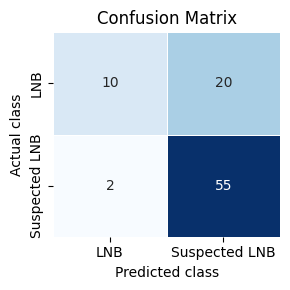

In [517]:
confusion_m = confusion_matrix(sub.observed, sub.predicted)

fig, ax = plt.subplots(figsize=(3,3))
s = sns.heatmap(confusion_m, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues",
           xticklabels=['LNB','Suspected LNB'], yticklabels=['LNB','Suspected LNB'])
s.set(xlabel="Predicted class", ylabel='Actual class')
s.set(title = "Confusion Matrix")
fig.tight_layout()
#fig.savefig('/Users/tzx804/projects/collaborations/nicolai/misc/sepsis/output/test_confusion_pride.pdf')
# 


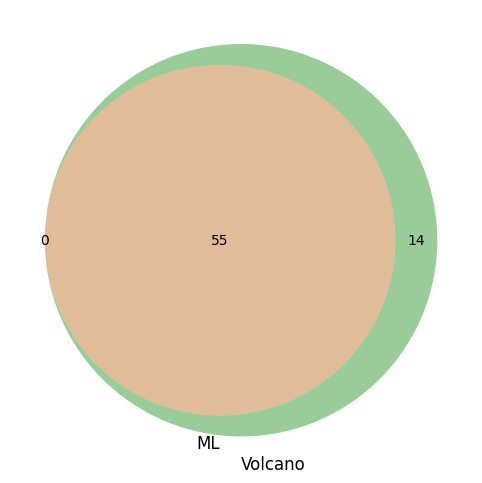

In [509]:
# overlap between significant proteins asd classifier proteins

plt.figure(figsize=(6, 6))

# Make the diagram
venn2([set(gene_mapping_df.loc[gene_mapping_df['Gene Names'].isin(topfeatures_identifiers)].index.tolist()), set(diffs[1])], set_labels=('ML','Volcano'))

plt.savefig("../output_blood/venn_diagram_blood_control_ml_vs_volcano.svg", format="svg")
plt.show()

# combined

In [612]:
ml_data_full = pd.read_csv("../output/aps_data_corrected_plasma_combined.tsv", sep = '\t')
ml_data_full = ml_data_full.set_index(['Protein.Group']).T.reset_index()
ml_data_full.rename(columns={'index':'sample_id'}, inplace=True)

ml_data_full = np.log2(pd.merge(info.drop(['batch','group'], axis =1), ml_data_full, on = 'sample_id')
                       .sort_values(['diagnosis','study_cohort'])
                       .set_index(['sample_id','diagnosis','study_cohort']).astype(float))

# use all proteins as features
combined_lst = list(ml_data_full.columns)
ml_data = ml_data_full[combined_lst]
ml_data.index.set_names(['_sample','_diagnosis','_study'], inplace = True)

# change column names to gene names
gene_mapping_df = uniprot_mapping[uniprot_mapping.Entry.isin(combined_lst)][['Entry','Gene Names']].drop_duplicates()
gene_mapping_df['Gene Names']=gene_mapping_df['Gene Names'].str.split(' ').str[0].str.split(';').str[0]
gene_mapping_df = pd.merge(gene_mapping_df, pd.DataFrame(combined_lst, columns = ['Entry']), on = 'Entry', how = 'outer')
gene_mapping_df.loc[gene_mapping_df['Gene Names'].isnull(),'Gene Names'] = gene_mapping_df.loc[gene_mapping_df['Gene Names'].isnull(),'Entry']
gene_mapping_df.set_index('Entry', inplace = True)

ml_data.columns = gene_mapping_df.loc[combined_lst]['Gene Names'].tolist()
ml_data.to_csv('../output_blood/blood_ml_data_full.tsv', sep = '\t')

In [1402]:
prepared_data = ml_data.copy()
prepared_data=zscore(prepared_data, axis = 1)
prepared_data['group']=prepared_data.index.get_level_values('_diagnosis').copy()
prepared_data.loc[prepared_data['group'].isin(['VM','control']),'group']='nonLNB'
prepared_data.set_index('group', append=True, inplace = True)

train_data = prepared_data.loc[(prepared_data.index.get_level_values('_study')=='plasma_development')&(prepared_data.index.get_level_values('group').isin(['LNB','nonLNB']))]

no_cv = 5
X = train_data.values # all the protein columns
sample_lst = train_data.index.get_level_values('_sample').values
y = pd.Categorical(train_data.index.get_level_values('group')).codes # control is 0, LNB is 1 or LNB 0 and VM 1
#X_train, X_test, y_train, y_test, samples_train, samples_test = train_test_split(X, y, train_data['sample'].tolist(), test_size=0.2, random_state=7, stratify=y)
X_train = X.copy()
y_train = y.copy()
sum(y_train)


67

In [1403]:
prepared_data.reset_index().groupby('_study')['group'].value_counts()

_study              group 
plasma_development  nonLNB    67
                    LNB       27
plasma_validation   nonLNB    37
                    PTLDS     17
                    LNB       10
                    EM         9
                    ACA        6
Name: count, dtype: int64

In [1404]:
val_data = prepared_data.loc[(prepared_data.index.get_level_values('_study')=='plasma_validation')&(prepared_data.index.get_level_values('group').isin(['LNB','nonLNB']))]
X_val = val_data.values
y_val = pd.Categorical(val_data.index.get_level_values('group')).codes
sum(y_val)

37

In [1405]:
no_cv = 3

In [625]:
from sklearn.model_selection import train_test_split, StratifiedKFold#, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
from scipy import interp
import plotly.graph_objects as go
#from yellowbrick.model_selection import RFECV

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV
from scipy.stats import zscore


import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import ensemble
from sklearn.linear_model import Perceptron

from scipy.stats import uniform, truncnorm, randint

import time

n_features = len(combined_lst)
n_samples = int(ml_data.loc[ml_data.index.get_level_values('_study') == 'plasma_development'].shape[0]*0.8)


# hyperparameter grids
lr_grid = {"C": [0.1, 0.5, 1],#np.logspace(0, 4, num=10),
           "penalty": ['l1', 'l2','elasticnet'],
           "solver": ['liblinear', 'saga'],
           "max_iter":[5000]}
lda_grid = {"solver": ['svd', 'lsqr', 'eigen'],
            "shrinkage":[None, 'auto']}
knn_grid = {"n_neighbors": randint(1,11),
            "weights":['uniform','distance'], 
            "algorithm":['auto','ball_tree','kd_tree','brute'], 
            "leaf_size":randint(10,50), 
            "p":[1,2],
            "metric":['euclidean','minkowski','mahalanobis','seuclidean']}
dt_grid = {"criterion": ["gini", "entropy"],
            "splitter": ['best','random'],
            #"max_features": randint(1, n_features),
            "min_samples_leaf": randint(1, 11),
            "class_weight":[None, 'balanced']}
nb_grid = {}
svc_grid = {"kernel": ['linear'], #'poly', 'rbf', 'sigmoid'], #removed because it does not work with importance getter
            "gamma":['scale','auto'],
            "class_weight" : ['balanced',None],
            "probability" : [True]}
rf_grid = {"max_depth": [3, None],
            "min_samples_split": randint(1, 11),
            "min_samples_leaf": randint(1, 11),
            "bootstrap": [True, False],
            "criterion": ["gini", "entropy"],
            "n_estimators": randint(1,200),
            "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1)}
nnet_grid = {"hidden_layer_sizes":randint(1,n_features),
            "activation": ['identity','logistic','tanh','relu'],
            "solver":['lbfgs','sgd','adam'],
            "batch_size":[int(n_samples/10),int(n_samples/5), int(n_samples/2)],
            "learning_rate_init":np.logspace(np.log10(0.00001), np.log10(0.99999), num=10),
            "max_iter":[5000],
            "early_stopping":[True],
            "validation_fraction":[0.25]}
perceptron_grid = {"penalty": ['l1', 'l2','elasticnet'],
                   "max_iter":[5000],
                   "class_weight" : ['balanced',None]}
                   
gp_grid = {}
ab_grid = {}
qda_grid = {}
eet_grid = {}

# models
models = []
models.append(('LR', lr_grid, LogisticRegression(random_state=7)))
models.append(('LDA', lda_grid, LinearDiscriminantAnalysis()))
models.append(('KNN', knn_grid, KNeighborsClassifier()))
models.append(('DT', dt_grid, DecisionTreeClassifier(random_state=7)))
models.append(('Naive Bayes', nb_grid, GaussianNB()))
models.append(('SVC', svc_grid, SVC(random_state=7)))
models.append(('RF', rf_grid, RandomForestClassifier(random_state=7)))
models.append(('NNet', nnet_grid, MLPClassifier(random_state=7)))
#models.append(('Perceptron',perceptron_grid,Perceptron(random_state = 7)))
models.append(('GP', gp_grid, GaussianProcessClassifier(random_state=7)))
models.append(('Adaboost', ab_grid, AdaBoostClassifier(random_state=7)))
models.append(('QDA', qda_grid, QuadraticDiscriminantAnalysis()))
models.append(('ensembleextratree', eet_grid, ensemble.ExtraTreesClassifier(random_state=7)))
#import xgboost as xgb
#models.append(('xgb',xgb_grid,xgb.Data))

In [626]:
from itertools import compress
protein_cols = gene_mapping_df.loc[combined_lst]['Gene Names'].tolist()
# ML alg. selection
optimal_models = []
optimal_no_features = []
optimal_features = []
start_time = time.time()

dfs = []
metrics = []
to_plot = []   
fitted_models = []
    
for name, grid, estimator in models:
    print(name)
    # grid search
    selector = RandomizedSearchCV(estimator=estimator, param_distributions=grid, cv=StratifiedKFold(no_cv), scoring = 'f1_weighted', n_jobs = -1)
    clf = selector.fit(X_train,y_train)
    optimal_model = clf.best_estimator_
    optimal_models.append(optimal_model)
    # feature reduction
    if name in ['Naive Bayes','NNet', 'GP', 'QDA', 'KNN']: # skip rfecv for models not supported by importance
        optimal_no_features.append(len(protein_cols))
        optimal_features.append(protein_cols)
        print('skipping feature importance')
        X_reduced = X_train
        X_val_reduced = X_val
    else:
        selector = RFECV(optimal_model, cv=3, scoring='f1_weighted')
        selector = selector.fit(X_train, y_train)
        optimal_no_features.append(sum(selector.support_))
        optimal_features.append(list(compress(protein_cols, selector.support_)))
        print('optimal no features = {}'.format(sum(selector.support_)))
        X_reduced = X_train[:,selector.support_]
        X_val_reduced = X_val[:, selector.support_]
    
    # compute cv results
    print('computing predictions for: {}'.format(name))
    classifier = optimal_model
    mccs = []
    aucs = []
    fits = []
    mcc_val = []
    auc_val = []
                            
    # calculate performance during training
    cv = StratifiedKFold(n_splits=no_cv)
    for i, (train, test) in enumerate(cv.split(X_reduced, y_train)):
        print('cv: {}'.format(i+1))
        classifier.fit(X_reduced[train], y_train[train])
        
        fits.append(classifier)
        # predict for "test" set
        y_pred = classifier.predict(X_reduced[test])
        y_prob = classifier.predict_proba(X_reduced[test])[:,1]
        result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
        result.columns = ['observed','predicted','probability']
        result['cv']=i+1
        result['model']=name
        result['sample']=sample_lst[test]
        result['run']='test'
        dfs.append(result)
        mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
        aucs.append(round(roc_auc_score(result.observed,result.probability),2))
        # predict for validation sets
        y_pred = classifier.predict(X_val_reduced)
        y_prob = classifier.predict_proba(X_val_reduced)[:,1]
        result = pd.DataFrame([y_val, y_pred, y_prob]).T
        result.columns = ['observed','predicted','probability']
        result['cv']=i+1
        result['model']=name
        result['sample']=val_data.index.get_level_values('_sample').tolist()
        result['run']='val'
        dfs.append(result)  
        mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
        auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
        
    fitted_models.append(fits)
    #test
    metrics_results = pd.DataFrame(mccs)
    metrics_results.columns = ['MCC']
    metrics_results['AUROC']=aucs
    metrics_results['cv']=list(range(1,1+no_cv))
    metrics_results['model']=name
    metrics_results['run']='test'
    metrics.append(metrics_results)

    #val
    metrics_results = pd.DataFrame(mccs)
    metrics_results.columns = ['MCC']
    metrics_results['AUROC']=aucs
    metrics_results['cv']=list(range(1,1+no_cv))
    metrics_results['model']=name
    metrics_results['run']='val'
    metrics.append(metrics_results)
    
    mcc_mean = np.mean(mccs)
    mcc_std = np.std(mccs)
    auroc_mean = np.mean(aucs)
    auroc_std = np.std(aucs)
    to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
    print('MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
    
    print('\n{} model tested --- {} minutes ---\n'.format(name,round(((time.time() - start_time)/60),3)))


result_df = pd.concat(dfs)
metrics_df = pd.concat(metrics)


LR


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/Users/tzx

optimal no features = 117
computing predictions for: LR
cv: 1
cv: 2
cv: 3
MCC: 0.77, AUROC: 0.9766666666666666

LR model tested --- 0.044 minutes ---

LDA


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, *

optimal no features = 103
computing predictions for: LDA
cv: 1
cv: 2
cv: 3
MCC: 0.8733333333333334, AUROC: 0.98

LDA model tested --- 0.314 minutes ---

KNN
skipping feature importance
computing predictions for: KNN
cv: 1
cv: 2
cv: 3
MCC: 0.6633333333333333, AUROC: 0.8833333333333334

KNN model tested --- 0.315 minutes ---

DT


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **

optimal no features = 123
computing predictions for: DT
cv: 1
cv: 2
cv: 3
MCC: 0.44, AUROC: 0.7133333333333334

DT model tested --- 0.354 minutes ---

Naive Bayes
skipping feature importance
computing predictions for: Naive Bayes
cv: 1
cv: 2
cv: 3
MCC: 0.5, AUROC: 0.8033333333333333

Naive Bayes model tested --- 0.355 minutes ---

SVC


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.



optimal no features = 7
computing predictions for: SVC
cv: 1
cv: 2
cv: 3
MCC: 0.7966666666666667, AUROC: 0.9766666666666666

SVC model tested --- 0.399 minutes ---

RF


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-package

optimal no features = 21
computing predictions for: RF
cv: 1
cv: 2
cv: 3
MCC: 0.59, AUROC: 0.9266666666666666

RF model tested --- 2.69 minutes ---

NNet
skipping feature importance
computing predictions for: NNet
cv: 1
cv: 2
cv: 3
MCC: 0.7200000000000001, AUROC: 0.9166666666666666

NNet model tested --- 2.713 minutes ---

GP
skipping feature importance
computing predictions for: GP
cv: 1
cv: 2
cv: 3
MCC: 0.32666666666666666, AUROC: 0.7966666666666667

GP model tested --- 2.714 minutes ---

Adaboost


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.



optimal no features = 6
computing predictions for: Adaboost
cv: 1
cv: 2
cv: 3
MCC: 0.8733333333333334, AUROC: 0.9766666666666666

Adaboost model tested --- 3.9 minutes ---

QDA
skipping feature importance
computing predictions for: QDA
cv: 1
cv: 2
cv: 3
MCC: -0.06333333333333334, AUROC: 0.47000000000000003

QDA model tested --- 3.901 minutes ---

ensembleextratree


/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tzx804/opt/miniconda3/envs/alphastats_dev/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear

/User

optimal no features = 32
computing predictions for: ensembleextratree
cv: 1
cv: 2
cv: 3
MCC: 0.7366666666666667, AUROC: 0.9666666666666667

ensembleextratree model tested --- 5.024 minutes ---



In [627]:
for model in result_df.model.unique():
    result = result_df[(result_df.model == model)&(result_df.run == 'val')]
    print(model)
    print(round(matthews_corrcoef(result.observed, result.predicted),2))
    #print(round(roc_auc_score(result.observed,result.probability),2))

LR
0.03
LDA
0.33
KNN
-0.01
DT
0.07
Naive Bayes
0.27
SVC
0.04
RF
-0.07
NNet
0.23
GP
-0.04
Adaboost
0.05
QDA
-0.05
ensembleextratree
-0.05


In [620]:
plot_df = pd.DataFrame(to_plot)
plot_df.columns=['model','mcc_mean','mcc_std','auroc_mean','auroc_std']
plot_df = round(plot_df,2)
plot_df['no_features']=[len(x) for x in optimal_features]
plot_df['features']=optimal_features
plot_df = plot_df.sort_values('mcc_mean').reset_index(drop = True)
plot_df['model_n_features']= ['{} (no. proteins = {})'.format(plot_df.loc[i,'model'],plot_df.loc[i,'no_features']) for i in plot_df.index.tolist()]



In [611]:
from plotly.subplots import make_subplots
butterfly_plot(plot_df, var1 = 'mcc_mean', var2 = 'auroc_mean', var3 = 'no_features', error1 = 'mcc_std', error2 = 'auroc_std', name = 'blood_29_10_24_nonLNB', savepdf=False, group = 'model_n_features')


KeyError: 'model_n_features'

In [1406]:
optimal_models[1]

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [602]:
selector = RFECV(optimal_models[1], cv=3, scoring='f1_weighted')
selector = selector.fit(X_train, y_train)

print(f"Optimal number of features: {selector.n_features_}")


Optimal number of features: 42


In [376]:
error_max = selector.cv_results_['mean_test_score']+selector.cv_results_['std_test_score']
error_min = selector.cv_results_['mean_test_score']-selector.cv_results_['std_test_score']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.concatenate([list(range(1,len(protein_cols)+1)),list(range(1,len(protein_cols)+1))[::-1]]),
    y=np.concatenate([error_max, error_min[::-1]]),
    fill='toself', opacity=0.5, name = '1 std.'))
fig.add_trace(go.Scatter(x=list(range(1,len(protein_cols)+1)), y = selector.cv_results_['mean_test_score'],
                         name='Mean test score',line = dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x = [selector.n_features_,selector.n_features_], name = 'Optimal number of features: {}'.format(selector.n_features_), 
                         y=[0,1], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash')))

fig.update_layout(template='simple_white',
    autosize=False,
    width=800,
    height=500,
    title="RFECV for SVC classifier",
    xaxis_title="Number of features selected",
    yaxis_title="F1-weighted",
    legend_title="",
    #legend=dict(y=1.1, orientation='h'),
    legend_traceorder="reversed",
    xaxis_range=[0,prepared_data.shape[1]],
    yaxis_range = [0,max(error_max)])

#fig.write_image('/Users/tzx804/projects/collaborations/nicolai/misc/sepsis/output/RFECV_SVC.pdf')
fig.show()

In [377]:
topfeatures_identifiers = list(compress(protein_cols, selector.support_))
print(topfeatures_identifiers)

['IGKV3-7', 'IGLV8-61', 'IGLV3-16', 'IGKV1D-8', 'IGHV3-49', 'IGKJ5', 'IGHV6-1', 'IGHV3-15', 'IGHV3-74', 'IGKV3D-20', 'IGHV3-64D', 'QSOX1', 'FCN3', 'ATRN', 'APOM', 'CP', 'F13A1', 'F2', 'HPR', 'F9', 'F10', 'PLG', 'SERPINA1', 'AGT', 'C3', 'C5', 'KNG1', 'JCHAIN', 'IGKV3-20', 'IGHV1-46', 'IGHV3-7', 'IGHV4-59', 'IGKC', 'IGHG1', 'APOE', 'APOC1', 'FGA', 'C1QB', 'C1QC', 'FN1', 'ORM1', 'AHSG', 'TTR', 'GC', 'HPX', 'F11', 'KLKB1', 'C4BPA', 'PROC', 'LCAT', 'HRG', 'A1BG', 'VWF', 'APOD', 'S100A8', 'SERPINA5', 'F13B', 'CLEC3B', 'SERPINA7', 'SERPIND1', 'BCHE', 'GSN', 'C2', 'S100A9', 'APOA4', 'LDHB', 'PROS1', 'GP1BA', 'SERPINA6', 'CD14', 'CFH', 'FCGR3A', 'C1S', 'IGLC2', 'HSPA8', 'F5', 'LAMP2', 'C6', 'CPN1', 'ORM2', 'CPN2', 'IGFBP6', 'MSN', 'PON1', 'PRDX6', 'P35527', 'IGFALS', 'SELENOP', 'LUM', 'B2M', 'TUBA4A', 'GPLD1', 'IGLV3-21', 'ITIH4', 'TGFBI', 'ECM1', 'PLXDC2', 'PI16', 'CPB2', 'CNDP1', 'IL1RAP', 'C1RL', 'FCGBP']


In [378]:
len(topfeatures_identifiers)

103

In [379]:
X_train = X_train[:, selector.support_]
X_val = X_val[:, selector.support_]


In [380]:
from sklearn.calibration import CalibratedClassifierCV

# compute cv results
print('computing predictions for: {}'.format(optimal_models[1]))
classifier = optimal_models[1]
name = 'LDA'
mccs = []
aucs = []
fits = []
mcc_val = []
auc_val = []
dfs = []
                        
# calculate performance during training 
cv = StratifiedKFold(n_splits=no_cv)
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    print('cv: {}'.format(i+1))
    classifier.fit(X_train[train], y_train[train])
    calibrated = CalibratedClassifierCV(classifier, method='sigmoid', cv=3)
    calibrated.fit(X_train[train], y_train[train])
    classifier = calibrated
    fits.append(classifier)
    # predict for "test" set
    y_pred = classifier.predict(X_train[test])
    y_prob = classifier.predict_proba(X_train[test])[:,1]
    result = pd.DataFrame([y_train[test], y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=sample_lst[test]
    result['run']='test'
    dfs.append(result)
    mccs.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    aucs.append(round(roc_auc_score(result.observed,result.probability),2))
    # predict for validation sets
    y_pred = classifier.predict(X_val)
    y_prob = classifier.predict_proba(X_val)[:,1]
    result = pd.DataFrame([y_val, y_pred, y_prob]).T
    result.columns = ['observed','predicted','probability']
    result['cv']=i+1
    result['model']=name
    result['sample']=val_data.index.get_level_values('_sample').tolist()
    result['run']='val'
    dfs.append(result)  
    mcc_val.append(round(matthews_corrcoef(result.observed, result.predicted),2))
    auc_val.append(round(roc_auc_score(result.observed,result.probability),2))      
    
mcc_mean = np.mean(mccs)
mcc_std = np.std(mccs)
auroc_mean = np.mean(aucs)
auroc_std = np.std(aucs)
to_plot.append([name, mcc_mean, mcc_std, auroc_mean, auroc_std])
print('Test: MCC: {}, AUROC: {}'.format(mcc_mean, auroc_mean))
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))

result = pd.concat(dfs)


computing predictions for: LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
cv: 1
cv: 2
cv: 3
Test: MCC: 0.8433333333333333, AUROC: 0.9733333333333333
Validation: MCC: 0.20666666666666667, AUROC: 0.7633333333333333


In [381]:
print('Validation: MCC: {}, AUROC: {}'.format(np.mean(mcc_val), np.mean(auc_val)))


Validation: MCC: 0.20666666666666667, AUROC: 0.7633333333333333


In [382]:
import scipy.stats as st

def roc_data(df, model, run):
    svc_test = df.loc[(df.model == model)&(df.run == run)]
    fpr_mean = np.linspace(0, 1, 100)
    interp_tprs = []
    aucs = []
    mccs = []
    for cv in list(range(1,3+1)):
        svc_sub = svc_test.loc[svc_test.cv == cv]
        fpr, tpr, thresholds = roc_curve(svc_sub.observed, svc_sub.probability, drop_intermediate=False)
        interp_tpr = np.interp(fpr_mean, fpr, tpr)
        interp_tpr[0] = 0.0
        interp_tprs.append(interp_tpr)
        aucs.append(roc_auc_score(svc_sub.observed, svc_sub.probability))
        mccs.append(matthews_corrcoef(svc_sub.observed, svc_sub.predicted))
        #print(roc_auc_score(svc_sub.observed, svc_sub.probability))
    tpr_mean     = np.mean(interp_tprs, axis=0)
    tpr_mean[-1] = 1.0
    tpr_std      = np.round(np.std(interp_tprs, axis=0),4)
    tpr_upper    = tpr_mean+tpr_std
    tpr_lower    = tpr_mean-tpr_std
    auc_mean = np.round(np.mean(aucs)*100,2)
    auc_sd = np.round(np.std(aucs)*100,2)
    ci_lower, ci_upper = np.round([100*x for x in st.t.interval(alpha=0.95, df=len(aucs)-1,loc=np.mean(aucs),scale=st.sem(aucs))],2)
    
    mcc_mean = np.round(np.mean(mccs),4)
    mcc_sd = np.round(np.std(mccs),4)
    
    return(fpr_mean, tpr_mean, tpr_upper, tpr_lower, auc_mean, auc_sd, ci_upper, ci_lower, mcc_mean, mcc_sd)

In [383]:
result_df = result.copy()

fig = go.Figure()
# ROC for TEST
test_data = roc_data(result_df, model = "LDA", run = "test")
# output_order = test_data[0], test_data[1], test_data[2], test_data[3], test_data[4], auc_sd, ci_upper, ci_lower, mcc_mean, mcc_std
fig.add_trace(go.Scatter(
    x=np.concatenate([test_data[0],test_data[0][::-1]]),
    y=np.concatenate([test_data[2], test_data[3][::-1]]),
    fill='toself', opacity=0.5, name = 'std.'))
print('TEST auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]))
fig.add_trace(go.Scatter(x = test_data[0], name = 'TEST auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]), 
                         y=test_data[1], 
                         mode='lines', 
                         line=dict(color='grey', width=2, dash='dash')))
test_data = roc_data(result_df, model = "LDA", run = "val")
print('VAL auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]))
fig.add_trace(go.Scatter(x = test_data[0], name = 'VAL auc = {} (std. = {}, ci = {}-{}), mcc = {} (std. = {}))'.format(test_data[4], test_data[5], test_data[6], test_data[7], test_data[8], test_data[9]), 
                         y=test_data[1], 
                         mode='lines', 
                         line=dict(color='green', width=2)))

fig.update_layout(template='simple_white',
    autosize=False,
    width=1000,
    height=500,
    title="AUROC for LDA classifier",
    xaxis_title="TPR",
    yaxis_title="FPR",
    legend_title="",
    legend_traceorder="reversed",
    xaxis_range=[0,1],
    yaxis_range = [0,1])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_nonLNB_AUC.pdf', width = 850)

fig.show()

TEST auc = 97.56 (std. = 2.45, ci = 105.03-90.09), mcc = 0.8446 (std. = 0.0671))
VAL auc = 76.31 (std. = 2.61, ci = 84.26-68.35), mcc = 0.2063 (std. = 0.0445))


/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_39641/4286984676.py:25: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

/var/folders/q6/v0nt5gkn3tj1vf4bwhn7s3840000gn/T/ipykernel_39641/4286984676.py:25: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.



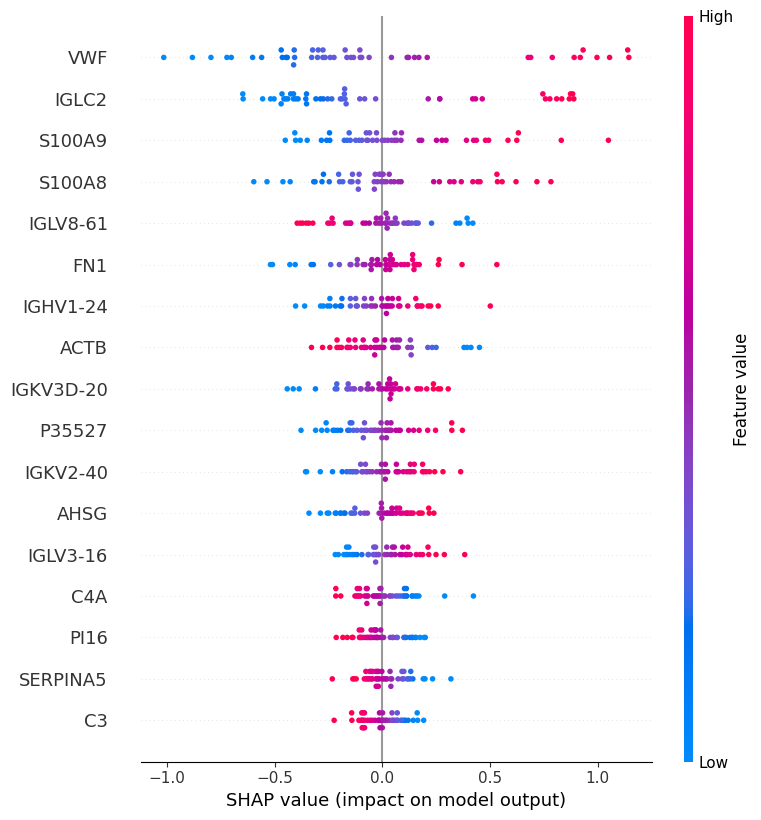

In [296]:
# shaply feature importance
import shap

X_train_df = pd.DataFrame(X_train, columns = topfeatures_identifiers)
X_test_df = pd.DataFrame(X_val, columns = topfeatures_identifiers)
y_test = y_val.copy()
# Generate the Tree SHAP estimator of Shapley values that corresponds to the LDA we built
explainer = shap.LinearExplainer(optimal_models[5], X_train_df)
# Compute the estimated Shapley values for the test sample's observations
shap_values = explainer.shap_values(X_test_df)

plt.figure(figsize=(6, 6))
shap.summary_plot(shap_values, X_test_df,max_display=17,show=False)

plt.savefig('../output_blood/shap_plot_blood_non_LNB.svg', format = 'svg') #.png,.pdf will also support here

plt.show()


In [297]:
result_svc = result_df.loc[result_df.model == 'SVC']
# mean
result_mean = pd.DataFrame(result_svc.groupby('sample').probability.mean())
result_mean.reset_index(inplace = True)

result_svc = pd.merge(result_mean,prepared_data.reset_index()[['_sample','_study','group']], left_on = 'sample', right_on = '_sample').drop('sample', axis = 1)

result_other = pd.DataFrame(classifier.predict_proba(prepared_data.loc[prepared_data.index.get_level_values('group').isin(['LNB','nonLNB'])==False][topfeatures_identifiers].values)[:,1], columns = ['probability'])
result_other[['_sample','_study','group']]= prepared_data.loc[prepared_data.index.get_level_values('group').isin(['LNB','nonLNB'])==False].reset_index()[['_sample','_study','group']]

result_svc = pd.concat([result_other[['_sample','_study','group','probability']],result_svc[['_sample','_study','group','probability']]])

result_svc.probability = 100*(1-result_svc.probability)
result_svc.group.value_counts()


group
nonLNB    104
LNB        37
PTLDS      17
EM          9
ACA         6
Name: count, dtype: int64

In [298]:
fig = px.box(result_svc, x = 'probability', y = '_study', color = 'group', template = 'simple_white', points = 'all', width = 500, height = 500)
      #category_orders={"group": ["MIS-C Acute Stage",'MIS-C During Admission','MIS-C Full Recovery', 'Virus','Bacteria','Sepsis','Kawasaki']}, 
      #color_discrete_sequence=["rgb(57,105,172)", "rgb(47,138,196)","rgb(179,179,179)","rgb(217,175,107)", "rgb(175,100,88)","rgb(204,97,176)","rgb(118,78,159)"])
fig.write_image('/Users/tzx804/projects/collaborations/nicolai/LNB/version3/output_blood/SVC_blood_nonLNB_proba_mean.svg',width = 500, height = 500)
fig.show()